## Here 100 uL of AuSS + 20uL AuNR both with DNA2 were taken in a microcuvette having 100uL H2O + 25uL of 2M NaCl. The laser power was 2.5A.

For kinetics, each spectrum was taken in 2 second intervals. 

In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta
from natsort import natsorted

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2024-04-12-100ns-20nr-blablabla_2-5a-notempcont-redip-kinet', '')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')

DATA_UV_DIR_PATH

'E:\\1_projects\\01-cfm-13-01-2023\\Pr003_self_oscillations\\data\\UV-Vis-NIR\\2024-04-12-100ns-20nr-blablabla_2-5a-notempcont-redip-kinet\\'

In [5]:
new_df_cool.iloc[668]

0    685.269
1      0.570
Name: 1068, dtype: float64

43


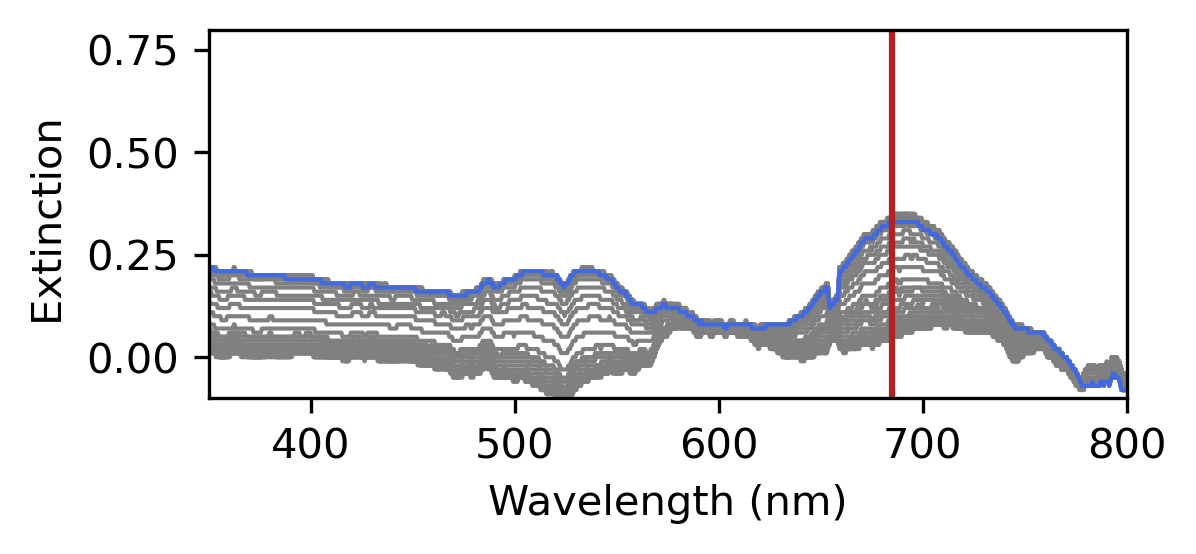

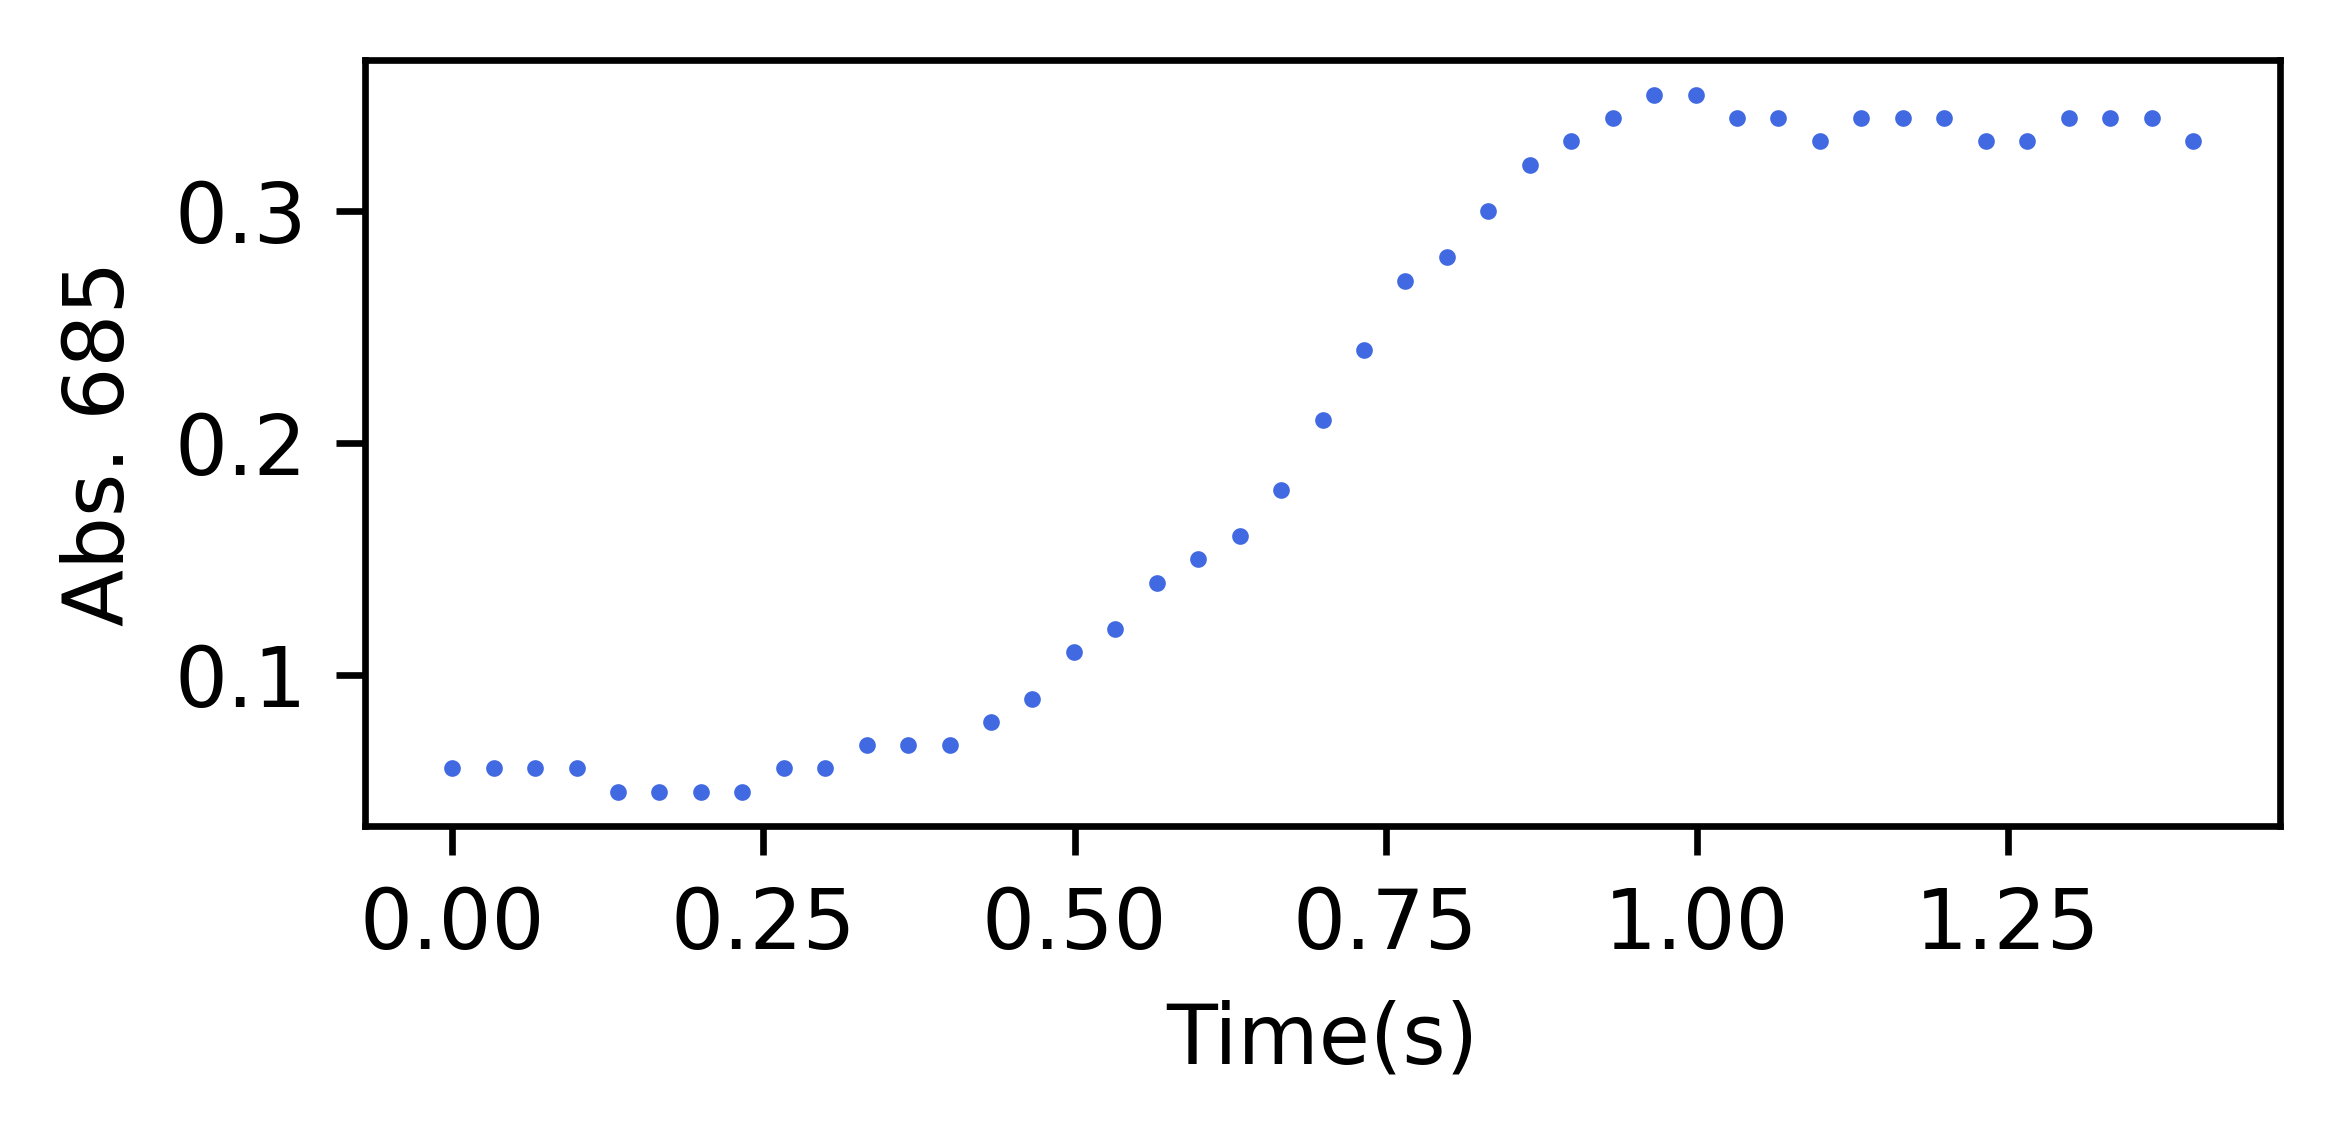

In [27]:
'''
Import cooling data from UV-Vis-NIR folder
'''

#================ import data =========================#

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH

# Get a list of all CSV files in the folder
txt_files = glob.glob(os.path.join(folder_path, '*.txt'))

print(len(txt_files))

#================ plot data heating cycle ===========================#

fig = plt.figure(figsize=(4,2), dpi=300) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Initialize the maximum value and its corresponding index
max_values_cool = []
max_indexes_cool = []
wv_abs_cool = []
times_cool = []

time_cool = 0

for i, txt_file in enumerate(natsorted(txt_files)):
    # Read the CSV file into a Pandas DataFrame
    df_cool = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool = df_cool.iloc[400:1200, ] #385 to 743 nm
    
    # Find the maximum value and its corresponding index
    max_value_cool = new_df_cool.iloc[668,1] # 685 nm
    max_values_cool.append(max_value_cool)
    
    times_cool.append(time_cool)
    time_cool = time_cool + 0.0333 # 2 seconds in minutes
    
    # set the color

    if i == 0:
        color = 'firebrick'
    elif i == len(txt_files)-1:
        color = 'royalblue'
    else:
        color = 'grey'
    
    # Plot the data
    ax.plot(df_cool[0],df_cool[1], color = color, linewidth = 1)                           # plot data

ax.set_xlim([350,800])                    # set wavelength limit
ax.set_ylim([-0.1,0.8])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.axvline(685, color='firebrick')

plt.tight_layout()  


# Plot of max. wavelength with time

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax.scatter(times_cool, max_values_cool, s = 1, color = 'royalblue')                           # plot data
#ax.set_title('17$^{o}$C-3.3A-35mins-Wavelength')

#ax.set_xlim([3300,4000])                   
#ax.set_ylim([0.3,0.51])                       
ax.set_xlabel(r'Time(s)')          # set axis label
ax.set_ylabel(r'Abs. 685')              # set axis label

plt.tight_layout()  


a = 0.28562510018705717
b = 0.0569795986129288
c = 10.679005177623704
d = 0.6714162220453175


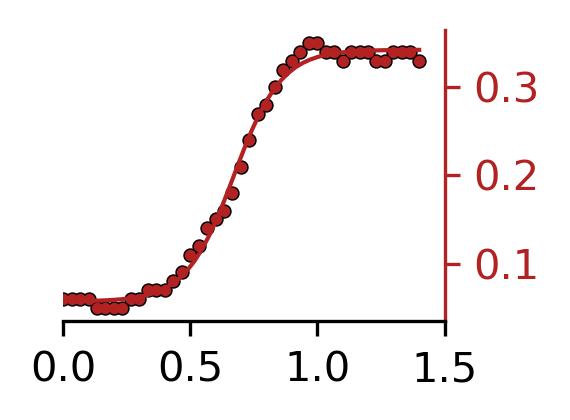

In [45]:
#========logiscic_growth===============#

# Define the logiscic_growth function
def logiscic_growth(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

# Fit the data to the exponential decay function
popt, pcov = curve_fit(logiscic_growth, times_cool, max_values_cool)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])
x_data = np.linspace(0,1.4)

fig_kin = plt.figure(figsize=(2,1.5), dpi=300) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.plot(x_data, logiscic_growth(x_data, popt[0], popt[1], popt[2], popt[3]), color='firebrick', linewidth = 1)
ax_kin.scatter(times_cool, max_values_cool, color='black', s=6)                           # plot data
ax_kin.scatter(times_cool, max_values_cool, color='firebrick', s=3)                           # plot data

#ax_kin.set_xlim([0,30])                    # set wavelength limit

ax_kin.set_xlim([0,1.5])                       # set absorbance limit
#ax_kin.set_xlabel(r'Time (min)')          # set axis label
#ax_kin.set_ylabel(r'Ext. at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['left'].set_visible(False)
ax_kin.spines['right'].set_color('firebrick')
ax_kin.tick_params(axis='y', colors='firebrick')
ax_kin.yaxis.set_label_position("right")
ax_kin.yaxis.tick_right()

#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))
plt.tight_layout()

plt.savefig(RESULT_DIR_PATH + 'disassembly_kinetics.png', transparent = True)

[2.13, 2.11, 2.1, 2.07, 2.04, 1.99, 1.96, 1.95, 1.94, 1.94, 1.94, 1.95, 1.94, 1.93, 1.92, 1.91, 1.9, 1.88, 1.87, 1.85, 1.84, 1.83, 1.82, 1.81, 1.8, 1.79, 1.78, 1.77, 1.76, 1.75, 1.74, 1.74, 1.73, 1.72, 1.72, 1.71, 1.7, 1.7, 1.69, 1.69, 1.68, 1.68, 1.67, 1.67, 1.66, 1.66, 1.65, 1.65, 1.64, 1.64, 1.64, 1.63, 1.63, 1.63, 1.62, 1.62, 1.62, 1.61, 1.61, 1.61, 1.6, 1.6, 1.6, 1.59, 1.59, 1.58, 1.58, 1.58, 1.57, 1.57, 1.57, 1.57, 1.56, 1.56, 1.56, 1.55, 1.55, 1.55, 1.54, 1.54, 1.54, 1.53, 1.53, 1.52, 1.52, 1.51, 1.5, 1.5, 1.49, 1.48, 1.48, 1.47, 1.46, 1.45, 1.45, 1.44, 1.43, 1.42, 1.41, 1.4, 1.39, 1.37, 1.36, 1.35, 1.34, 1.33, 1.31, 1.3, 1.29, 1.28, 1.27, 1.25, 1.24, 1.23, 1.22, 1.21, 1.2, 1.19, 1.18, 1.17, 1.16]
a = 3.730276101460173
b = 0.0037834738306693374
c = -1.7272931718075546


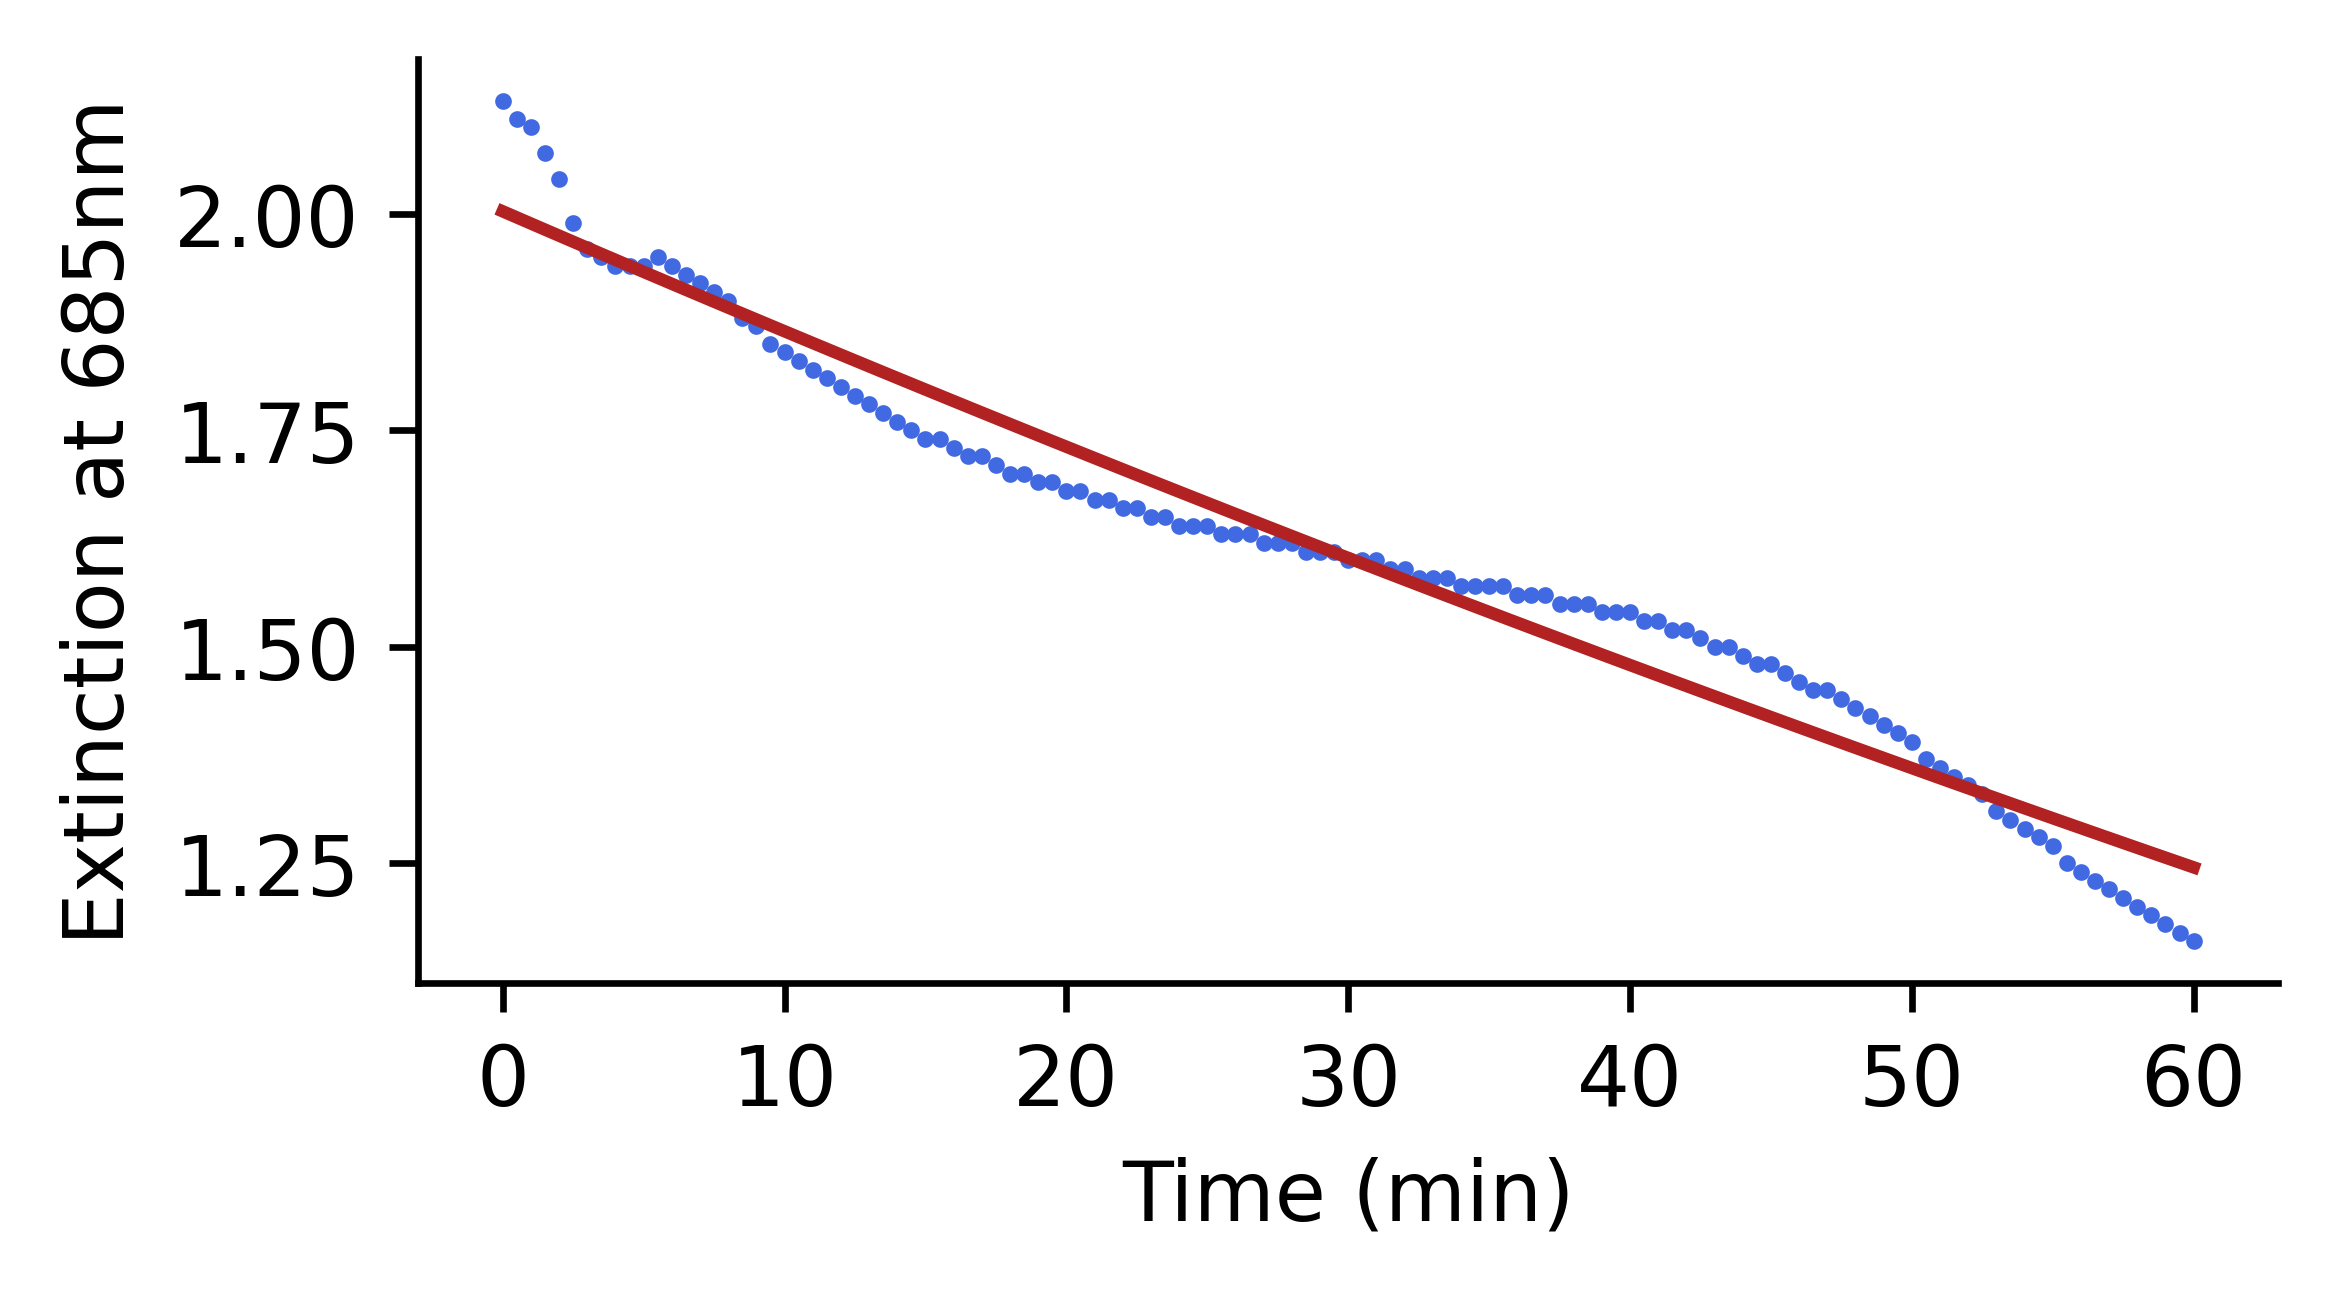

In [11]:
# Obtian the abs. max and the corresponding wavelength

abs_685 = []
times = []

for col in odd_cols:
    absorbance = round(lspr_abs[col].max(),2)
    abs_685.append(absorbance)
    
print(abs_685)

for time in (range(121)):
    times.append(time/2)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.scatter(times, abs_685, color='royalblue', s= 1)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Extinction at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times, abs_685)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,60)

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


In [12]:
odd_cols_tspr

Abs     Abs.1     Abs.2     Abs.3     Abs.4     Abs.5     Abs.6  \
0    0.024392  0.028327  0.025752  0.025853  0.025738  0.026336  0.032495   
1    0.025511  0.025175  0.025123  0.021736  0.024790  0.022616  0.025991   
2    0.026196  0.027711  0.023385  0.024065  0.025226  0.025070  0.026254   
3    0.022814  0.022973  0.023870  0.024759  0.020508  0.019464  0.024667   
4    0.024709  0.019556  0.027182  0.023236  0.023513  0.024137  0.025407   
..        ...       ...       ...       ...       ...       ...       ...   
796  1.873635  1.874831  1.874252  1.874626  1.875098  1.871078  1.857225   
797  1.885658  1.887051  1.886866  1.888263  1.887713  1.884294  1.869527   
798  1.898224  1.898810  1.898732  1.899001  1.898479  1.894922  1.880286   
799  1.910507  1.911667  1.911638  1.911959  1.911650  1.907626  1.892504   
800  1.925368  1.926095  1.925970  1.926333  1.925711  1.921322  1.905680   

        Abs.7     Abs.8     Abs.9  ...    Abs.30    Abs.31    Abs.32  \
0    0.034034  0.046836  0.062844  ...  0.238443  0.241455  0.236162   
1    0.032575  0.041705  0.056194  ...  0.229079  0.235694  0.234998   
2    0.033461  0.040412  0.059877  ...  0.234552  0.235369  0.238609   
3    0.031373  0.044274  0.054431  ...  0.229981  0.238508  0.239640   
4    0.031298  0.041105  0.058269  ...  0.242685  0.230470  0.236178   
..        ...       ...       ...  ...       ...       ...       ...   
796  1.822449  1.767694  1.699485  ...  1.112916  1.104964  1.097331   
797  1.833701  1.777472  1.708160  ...  1.116382  1.108299  1.100522   
798  1.843017  1.786429  1.716292  ...  1.119240  1.111219  1.103348   
799  1.855416  1.796570  1.725241  ...  1.122737  1.114328  1.106809   
800  1.867986  1.807797  1.735103  ...  1.127018  1.118331  1.111153   

       Abs.33    Abs.34    Abs.35    Abs.36    Abs.37    Abs.38    Abs.39  
0    0.239004  0.241812  0.243405  0.249125  0.245026  0.244486  0.248152  
1    0.242353  0.237011  0.241976  0.237071  0.246611  0.244255  0.251440  
2    0.239351  0.242040  0.239159  0.244541  0.243149  0.245455  0.246802  
3    0.233775  0.241242  0.241246  0.242616  0.249856  0.248764  0.249611  
4    0.237758  0.241301  0.245565  0.246104  0.244110  0.247420  0.251573  
..        ...       ...       ...       ...       ...       ...       ...  
796  1.090637  1.083597  1.077320  1.071314  1.065933  1.060072  1.054568  
797  1.093175  1.086513  1.080565  1.074622  1.068286  1.063171  1.057855  
798  1.096564  1.089827  1.083380  1.077487  1.070939  1.065739  1.060596  
799  1.099600  1.092945  1.086921  1.080501  1.074477  1.069524  1.064387  
800  1.103477  1.097037  1.090499  1.084546  1.078659  1.073098  1.068327  

[801 rows x 40 columns]

In [13]:
len(times)

40

[2.13, 2.11, 2.1, 2.07, 2.04, 1.99, 1.96, 1.95, 1.94, 1.94, 1.94, 1.95, 1.94, 1.93, 1.92, 1.91, 1.9, 1.88, 1.87, 1.85, 1.84, 1.83, 1.82, 1.81, 1.8, 1.79, 1.78, 1.77, 1.76, 1.75, 1.74, 1.74, 1.73, 1.72, 1.72, 1.71, 1.7, 1.7, 1.69, 1.69]
a = 0.6286020558648104
b = 0.028181073952539198
c = 1.4779025931186032


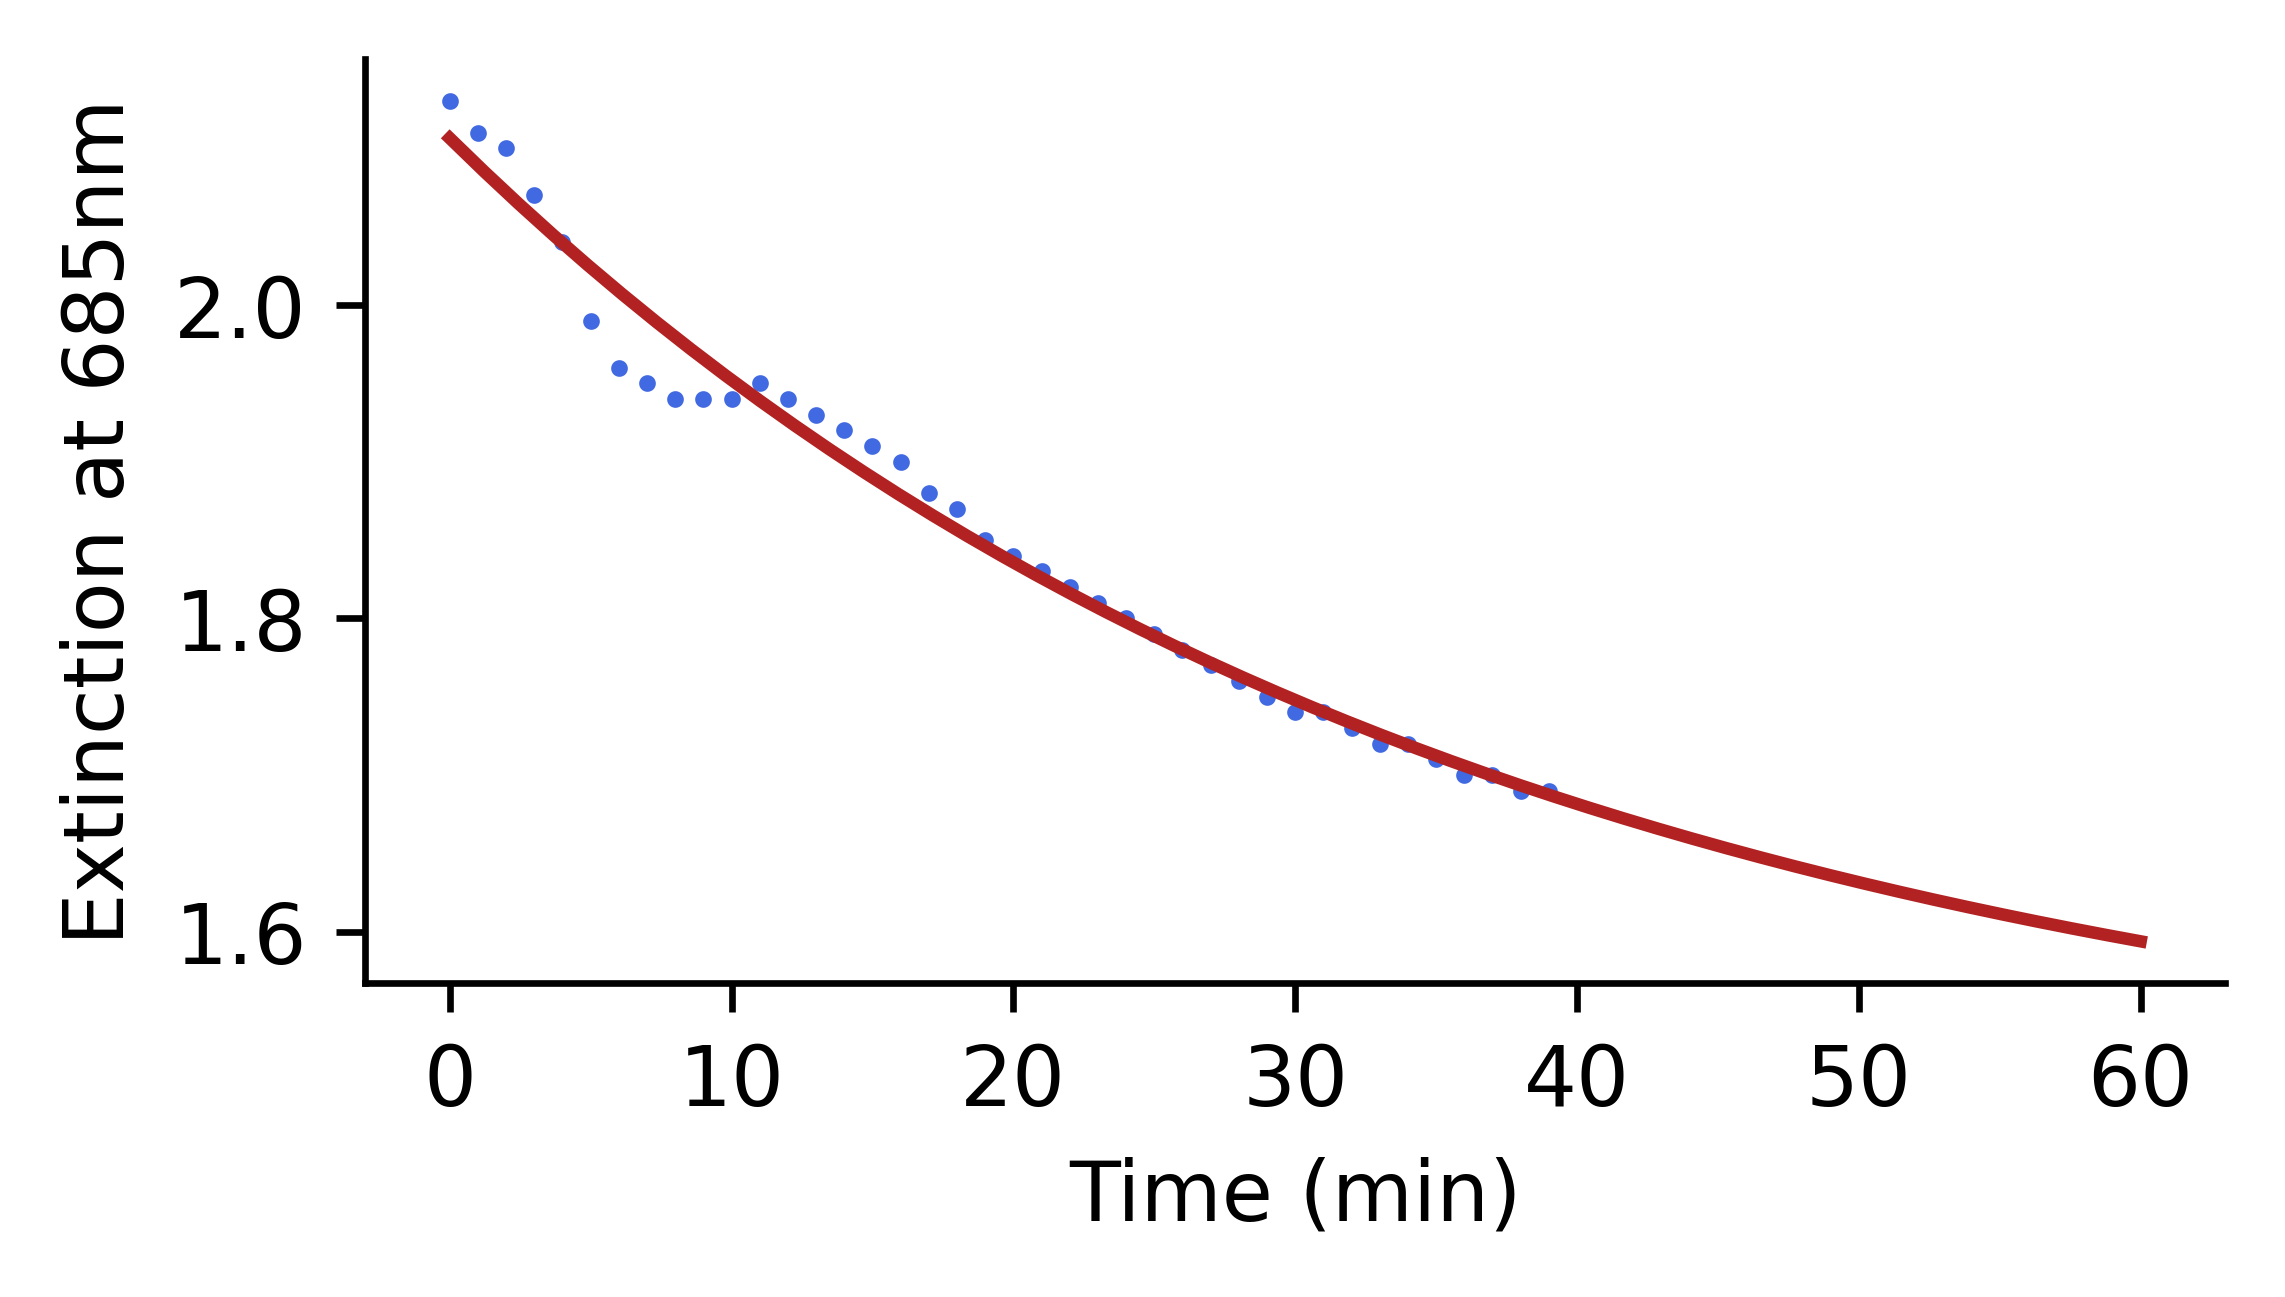

In [11]:
df_tspr = df.iloc[:,:80]

# Get the odd columns and even columns
odd_cols_tspr = df_tspr.iloc[:, 1::2]  # start from index 1 and select every other column

# Get number of columns
num_cols_tspr = len(odd_cols_tspr.columns)

# Create color list
colors = ['red'] + ['grey']*(num_cols_tspr-3) + ['blue']

# odd_cols.to_csv(RESULT_DIR_PATH_CSV + 'odd_cols.csv')
#df.loc[430] # For abs at 670 nm

#df.loc[430]/(1.456E-4) # For ext. cross section at 670 nm

#df.loc[700] # For abs at 400 nm
odd_cols_tspr

lspr_abs_tspr = odd_cols_tspr[:451]
tspr_abs_tspr = odd_cols_tspr[451:]

# Obtian the abs. max and the corresponding wavelength

abs_685 = []
times = []

for col in odd_cols_tspr:
    absorbance = round(lspr_abs_tspr[col].max(),2)
    abs_685.append(absorbance)
    
print(abs_685)

for time in (range(40)):
    times.append(time)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.scatter(times, abs_685, color='royalblue', s= 1)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Extinction at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times, abs_685)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,60)

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


# Plotting the kinetics for 30 mins only

In [14]:
df_30min = df.iloc[:,14:80]

# Get the odd columns and even columns
odd_cols_30 = df_30min.iloc[:, 1::2]  # start from index 1 and select every other column

# Get number of columns
num_cols_30 = len(odd_cols_30.columns)

# Create color list
colors = ['red'] + ['grey']*(num_cols_30-3) + ['blue']

# odd_cols.to_csv(RESULT_DIR_PATH_CSV + 'odd_cols.csv')
#df.loc[430] # For abs at 670 nm

#df.loc[430]/(1.456E-4) # For ext. cross section at 670 nm

#df.loc[700] # For abs at 400 nm
odd_cols_30

lspr_abs_30 = odd_cols_30[:451]
tspr_abs_30 = odd_cols_30[451:]

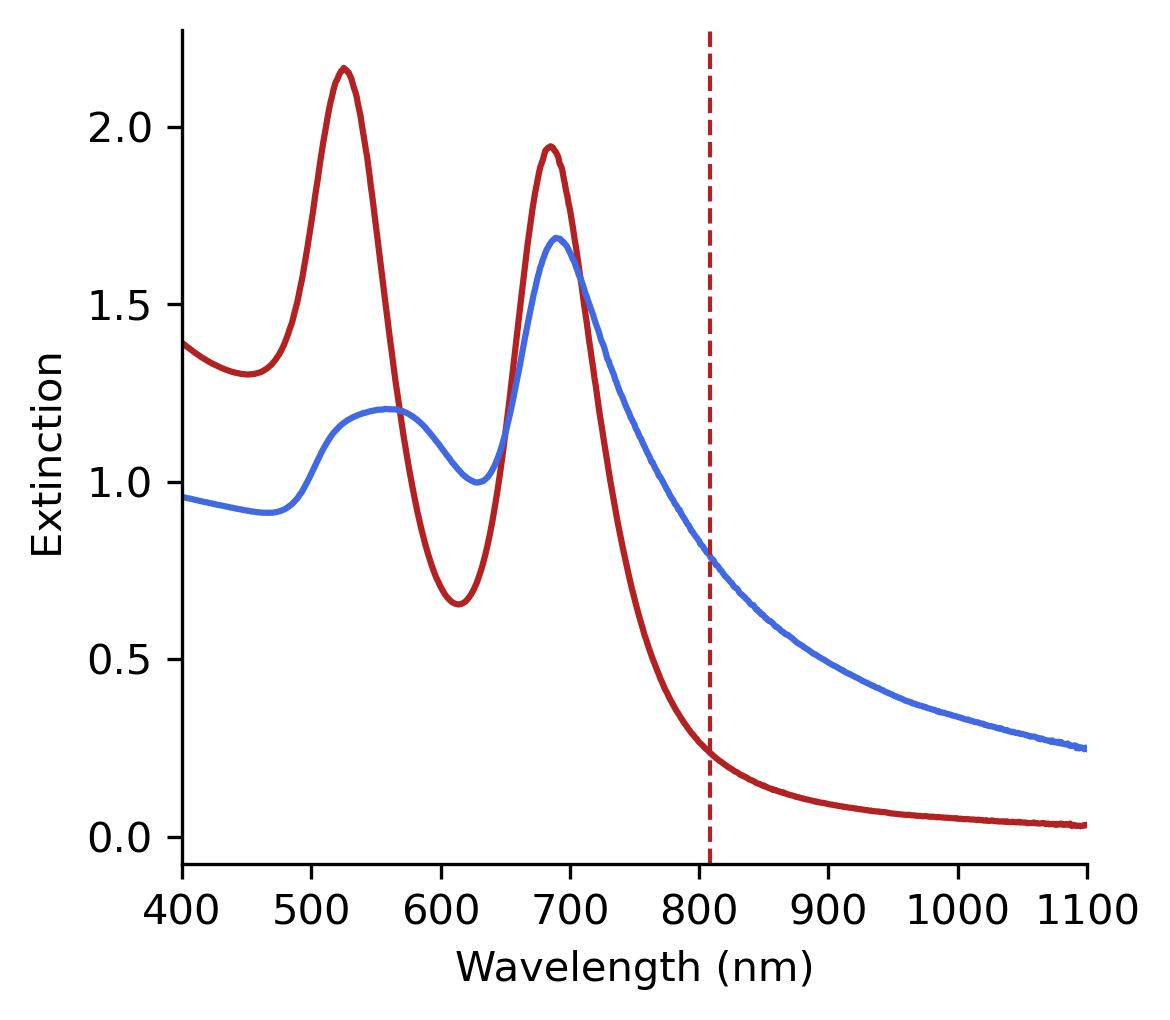

In [15]:
#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(4,3.5), dpi=300) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for col in odd_cols_30:
    if col == 'Abs.7':
        color = 'firebrick'
        linewidth = 1.5
    elif col == 'Abs.39':
        color = 'royalblue'
        linewidth = 1.5
    else:
        color = 'lightgrey'
        linewidth = 0
    
    ax.plot(df_30min.iloc[:, 0], odd_cols_30[col], color = color, linewidth = linewidth)                           # plot data    
    
ax.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
#ax.axvline(685, color = 'royalblue', linewidth = 1, linestyle = '--')
ax.axvline(808, color = 'firebrick', linewidth = 1, linestyle = '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
#fig.savefig(RESULT_DIR_PATH+'auss-10ulbp-500mmnacl.pdf')

[2.17, 2.1, 2.01, 1.92, 1.84, 1.76, 1.7, 1.64, 1.59, 1.55, 1.52, 1.48, 1.46, 1.43, 1.41, 1.39, 1.37, 1.36, 1.34, 1.33, 1.31, 1.3, 1.29, 1.28, 1.27, 1.26, 1.25, 1.24, 1.23, 1.23, 1.22, 1.21, 1.21]
a = 0.9960679785287097
b = 0.10970848089814256
c = 1.1921299214605505


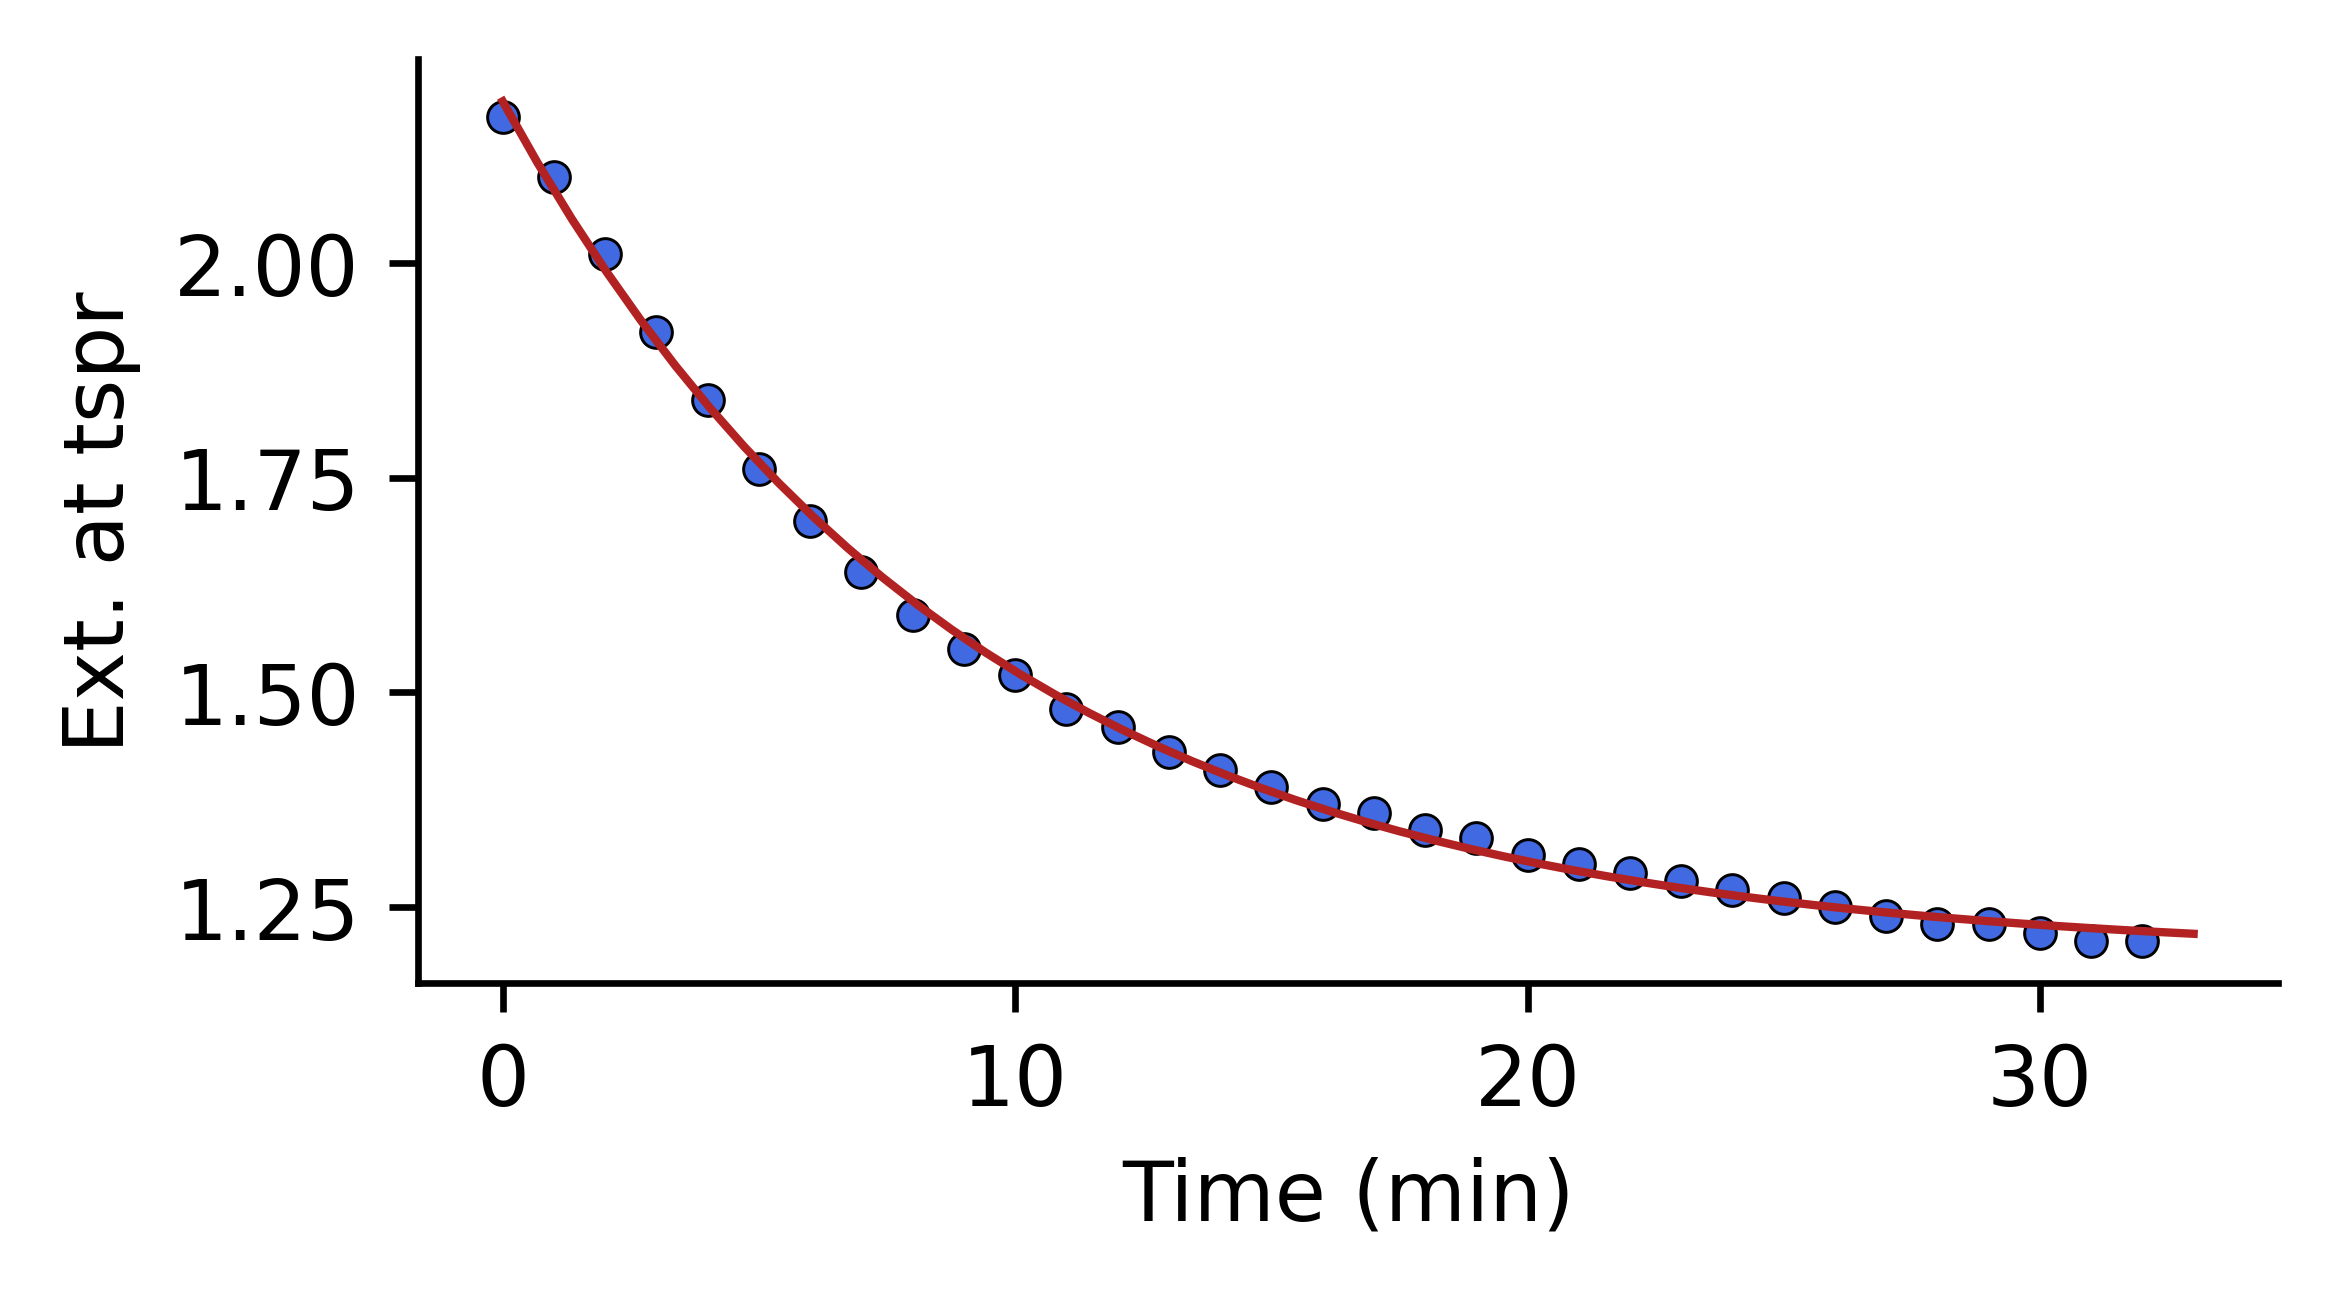

In [16]:
# Obtian the abs. max and the corresponding wavelength

abs_520_30 = []
times_30 = []

for col in odd_cols_30:
    absorbance = round(tspr_abs_30[col].max(),2)
    abs_520_30.append(absorbance)
    
print(abs_520_30)

for time in (range(33)):
    times_30.append(time)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, abs_520_30)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick', linewidth = 1)
ax_kin.scatter(times_30, abs_520_30, color='black', s=10)                           # plot data
ax_kin.scatter(times_30, abs_520_30, color='royalblue', s=6)                           # plot data

#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Ext. at tspr')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


[1.95, 1.94, 1.94, 1.94, 1.95, 1.94, 1.93, 1.92, 1.91, 1.9, 1.88, 1.87, 1.85, 1.84, 1.83, 1.82, 1.81, 1.8, 1.79, 1.78, 1.77, 1.76, 1.75, 1.74, 1.74, 1.73, 1.72, 1.72, 1.71, 1.7, 1.7, 1.69, 1.69]
a = 1.372841444856967
b = 0.00767035423325915
c = 0.6009566900319341


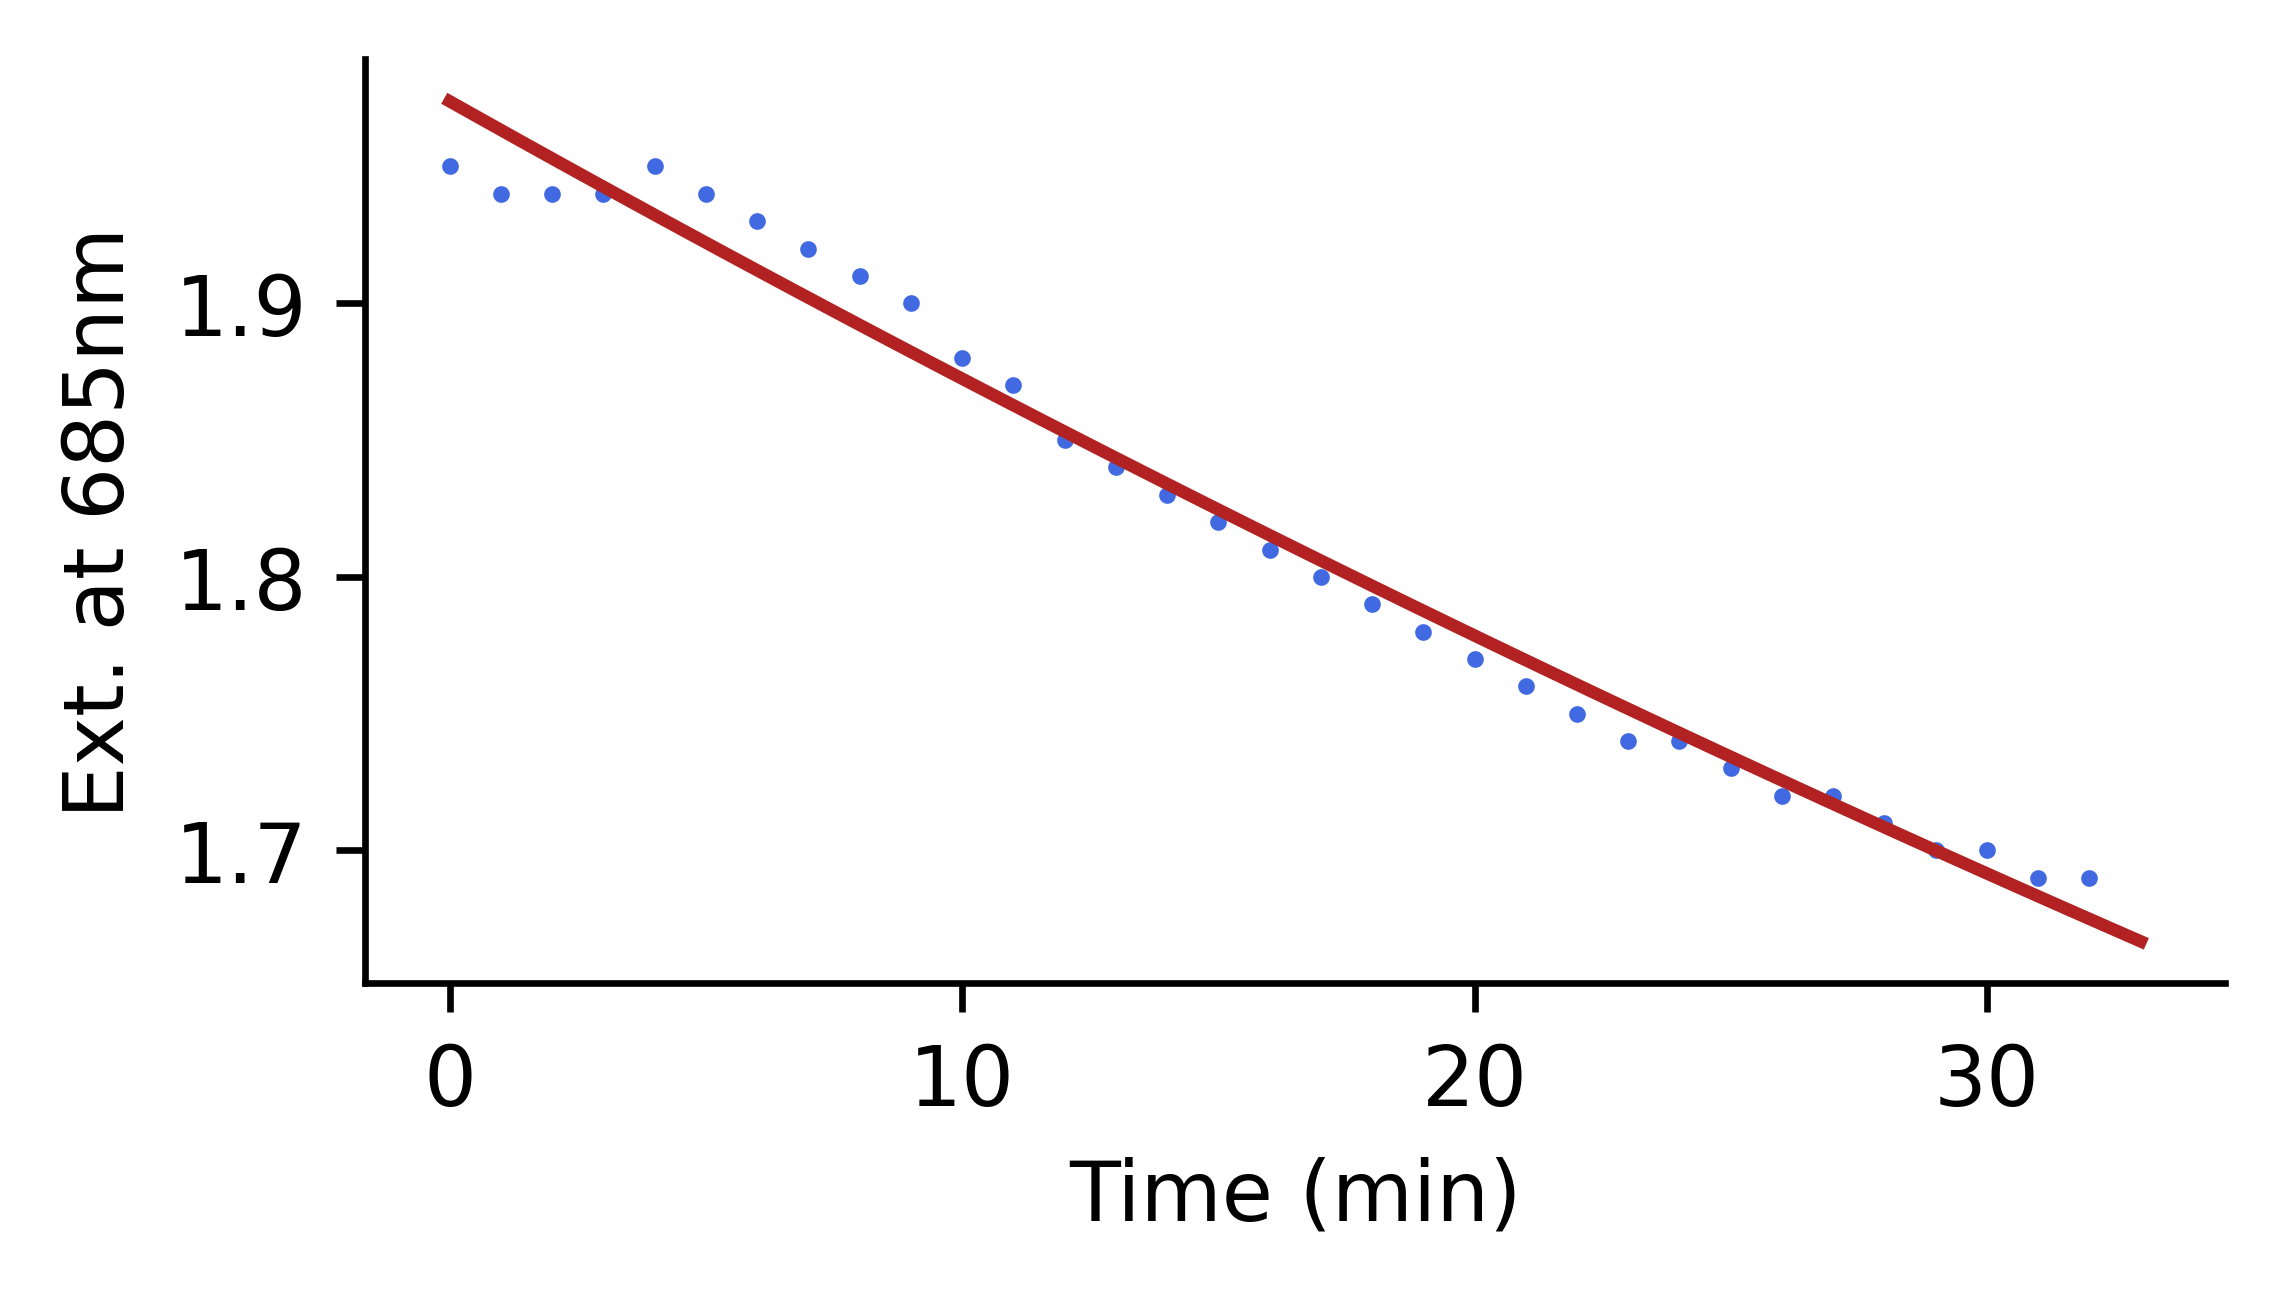

In [17]:
# Obtian the abs. max and the corresponding wavelength

abs_685_30 = []
times_30 = []

for col in odd_cols_30:
    absorbance = round(lspr_abs_30[col].max(),2)
    abs_685_30.append(absorbance)
    
print(abs_685_30)

for time in (range(33)):
    times_30.append(time)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.scatter(times_30, abs_685_30, color='royalblue', s=1)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Ext. at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, abs_685_30)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


In [18]:
df_30min.iloc[292]

Wavelength (nm).7     808.000000
Abs.7                   0.238410
Wavelength (nm).8     808.000000
Abs.8                   0.293969
Wavelength (nm).9     808.000000
                         ...    
Abs.37                  0.792466
Wavelength (nm).38    808.000000
Abs.38                  0.791195
Wavelength (nm).39    808.000000
Abs.39                  0.793836
Name: 292, Length: 66, dtype: float64

In [19]:
odd_cols_808nm = df_30min.iloc[292, 1::2]  # start from index 1 and select every other column
odd_cols_808nm

Abs.7     0.238410
Abs.8     0.293969
Abs.9     0.359930
Abs.10    0.425554
Abs.11    0.488732
Abs.12    0.541054
Abs.13    0.584631
Abs.14    0.620706
Abs.15    0.652111
Abs.16    0.674149
Abs.17    0.697288
Abs.18    0.713000
Abs.19    0.729852
Abs.20    0.738316
Abs.21    0.746623
Abs.22    0.754692
Abs.23    0.764788
Abs.24    0.768985
Abs.25    0.775245
Abs.26    0.777496
Abs.27    0.779442
Abs.28    0.782255
Abs.29    0.785605
Abs.30    0.784810
Abs.31    0.788696
Abs.32    0.788762
Abs.33    0.791506
Abs.34    0.790230
Abs.35    0.793715
Abs.36    0.789726
Abs.37    0.792466
Abs.38    0.791195
Abs.39    0.793836
Name: 292, dtype: float64

In [20]:
len(odd_cols_808nm)

33

In [21]:
len(times_30)

33

a = -0.5894997215370702
b = 0.16693709464244158
c = 0.8004988411119623


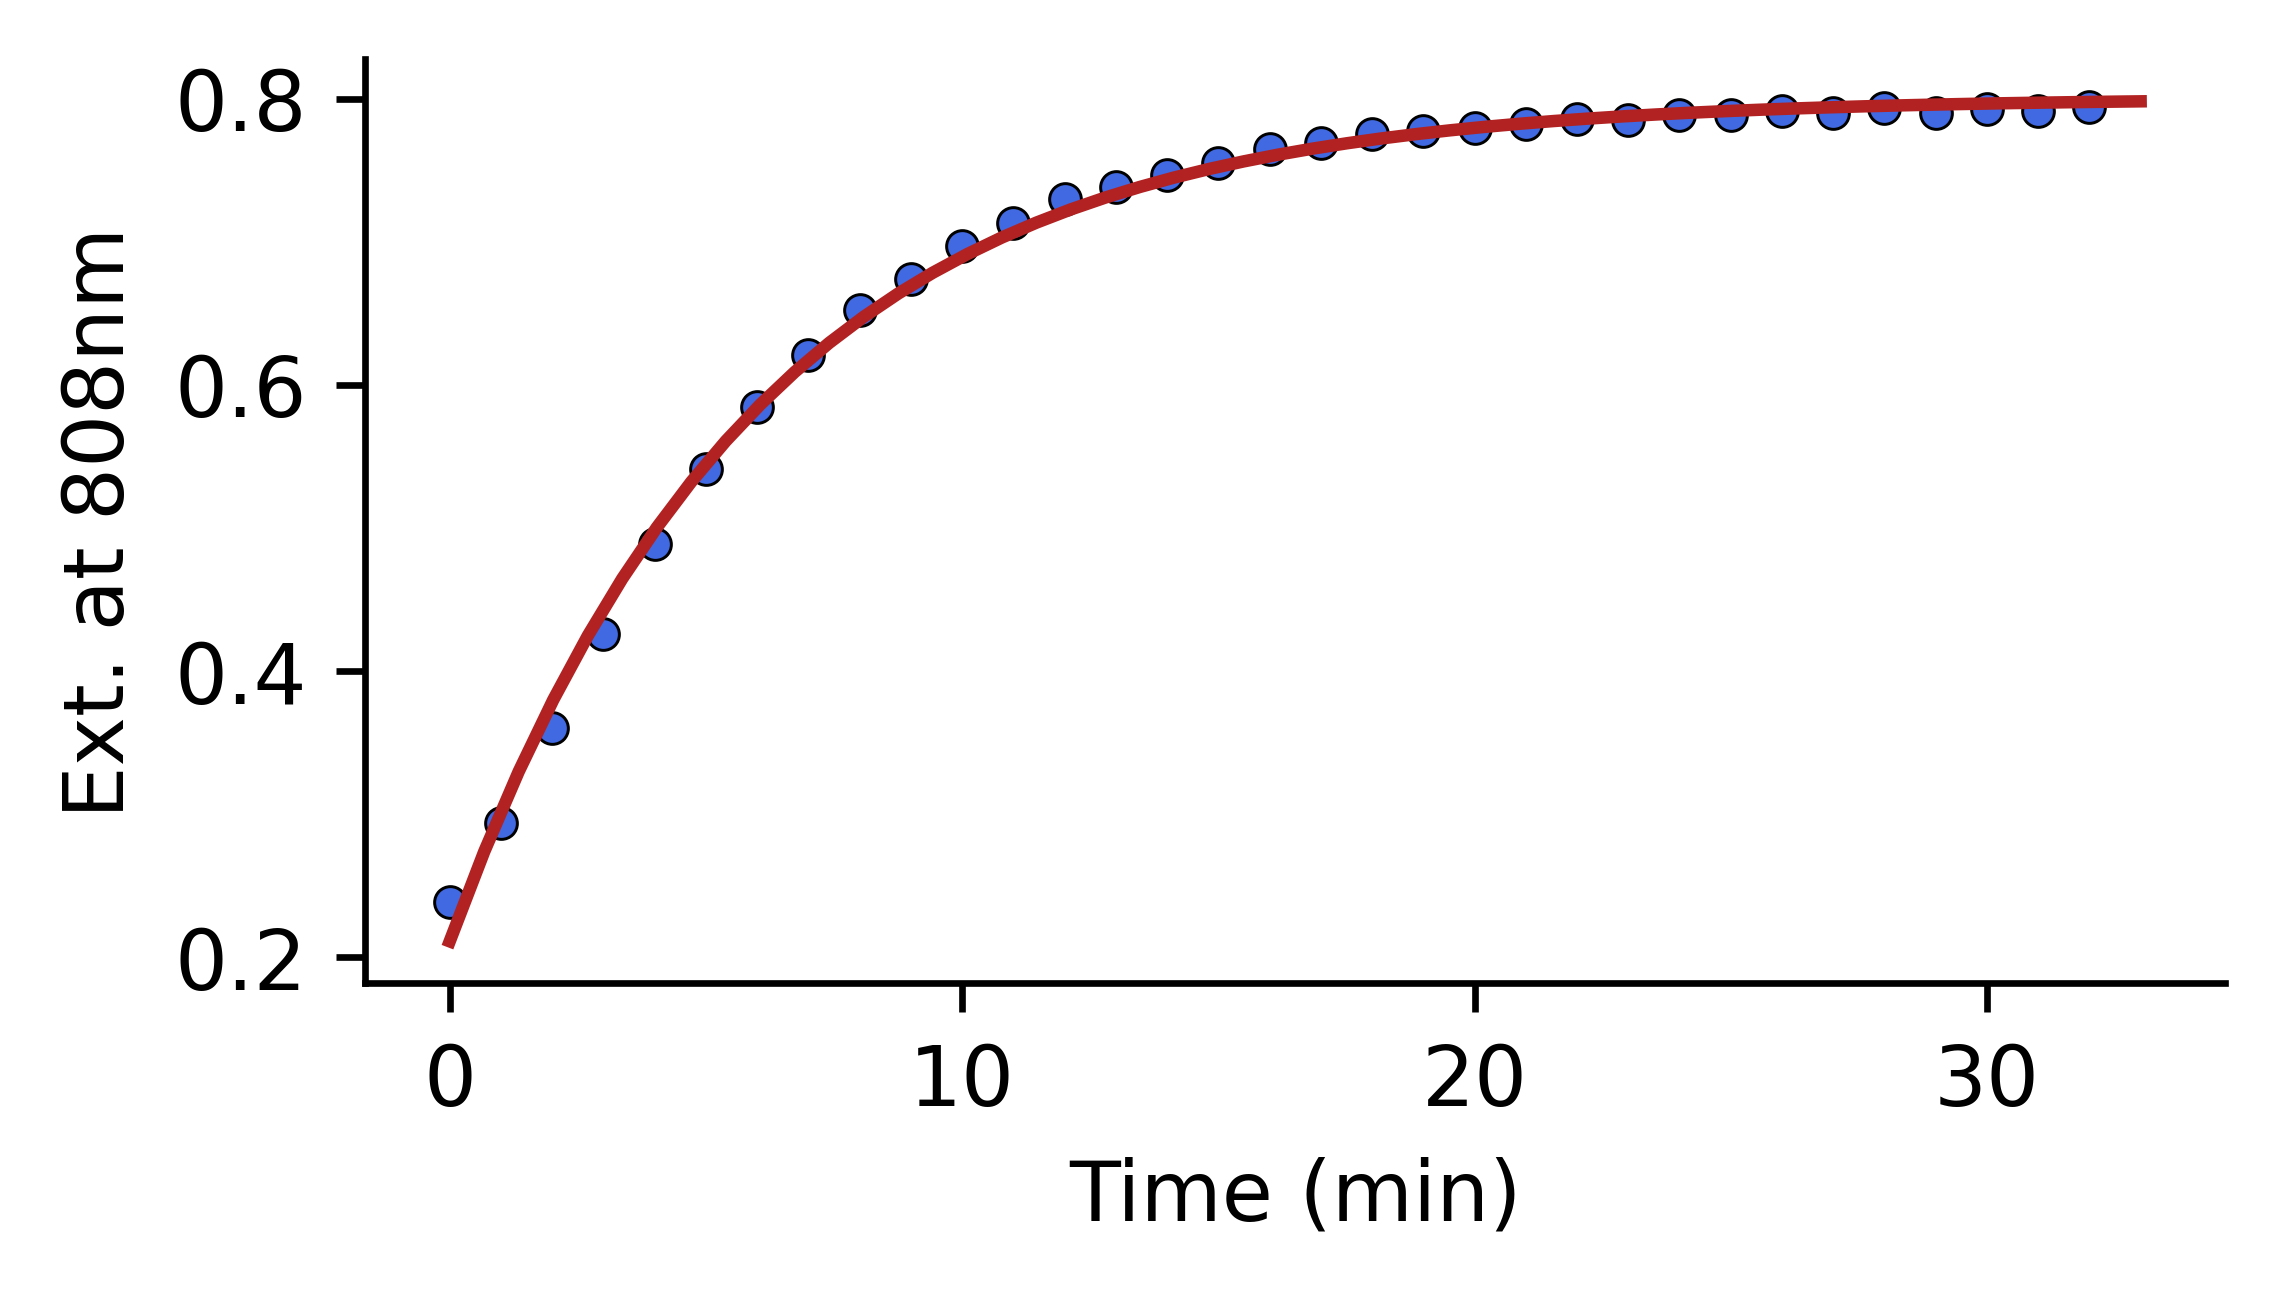

In [22]:
times_30 = []
for time in (range(33)):
    times_30.append(time)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.scatter(times_30, odd_cols_808nm, color='black', s=10)                           # plot data
ax_kin.scatter(times_30, odd_cols_808nm, color='royalblue', s=6)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Ext. at 808nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, odd_cols_808nm)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


a = -0.5894997215370702
b = 0.16693709464244158
c = 0.8004988411119623


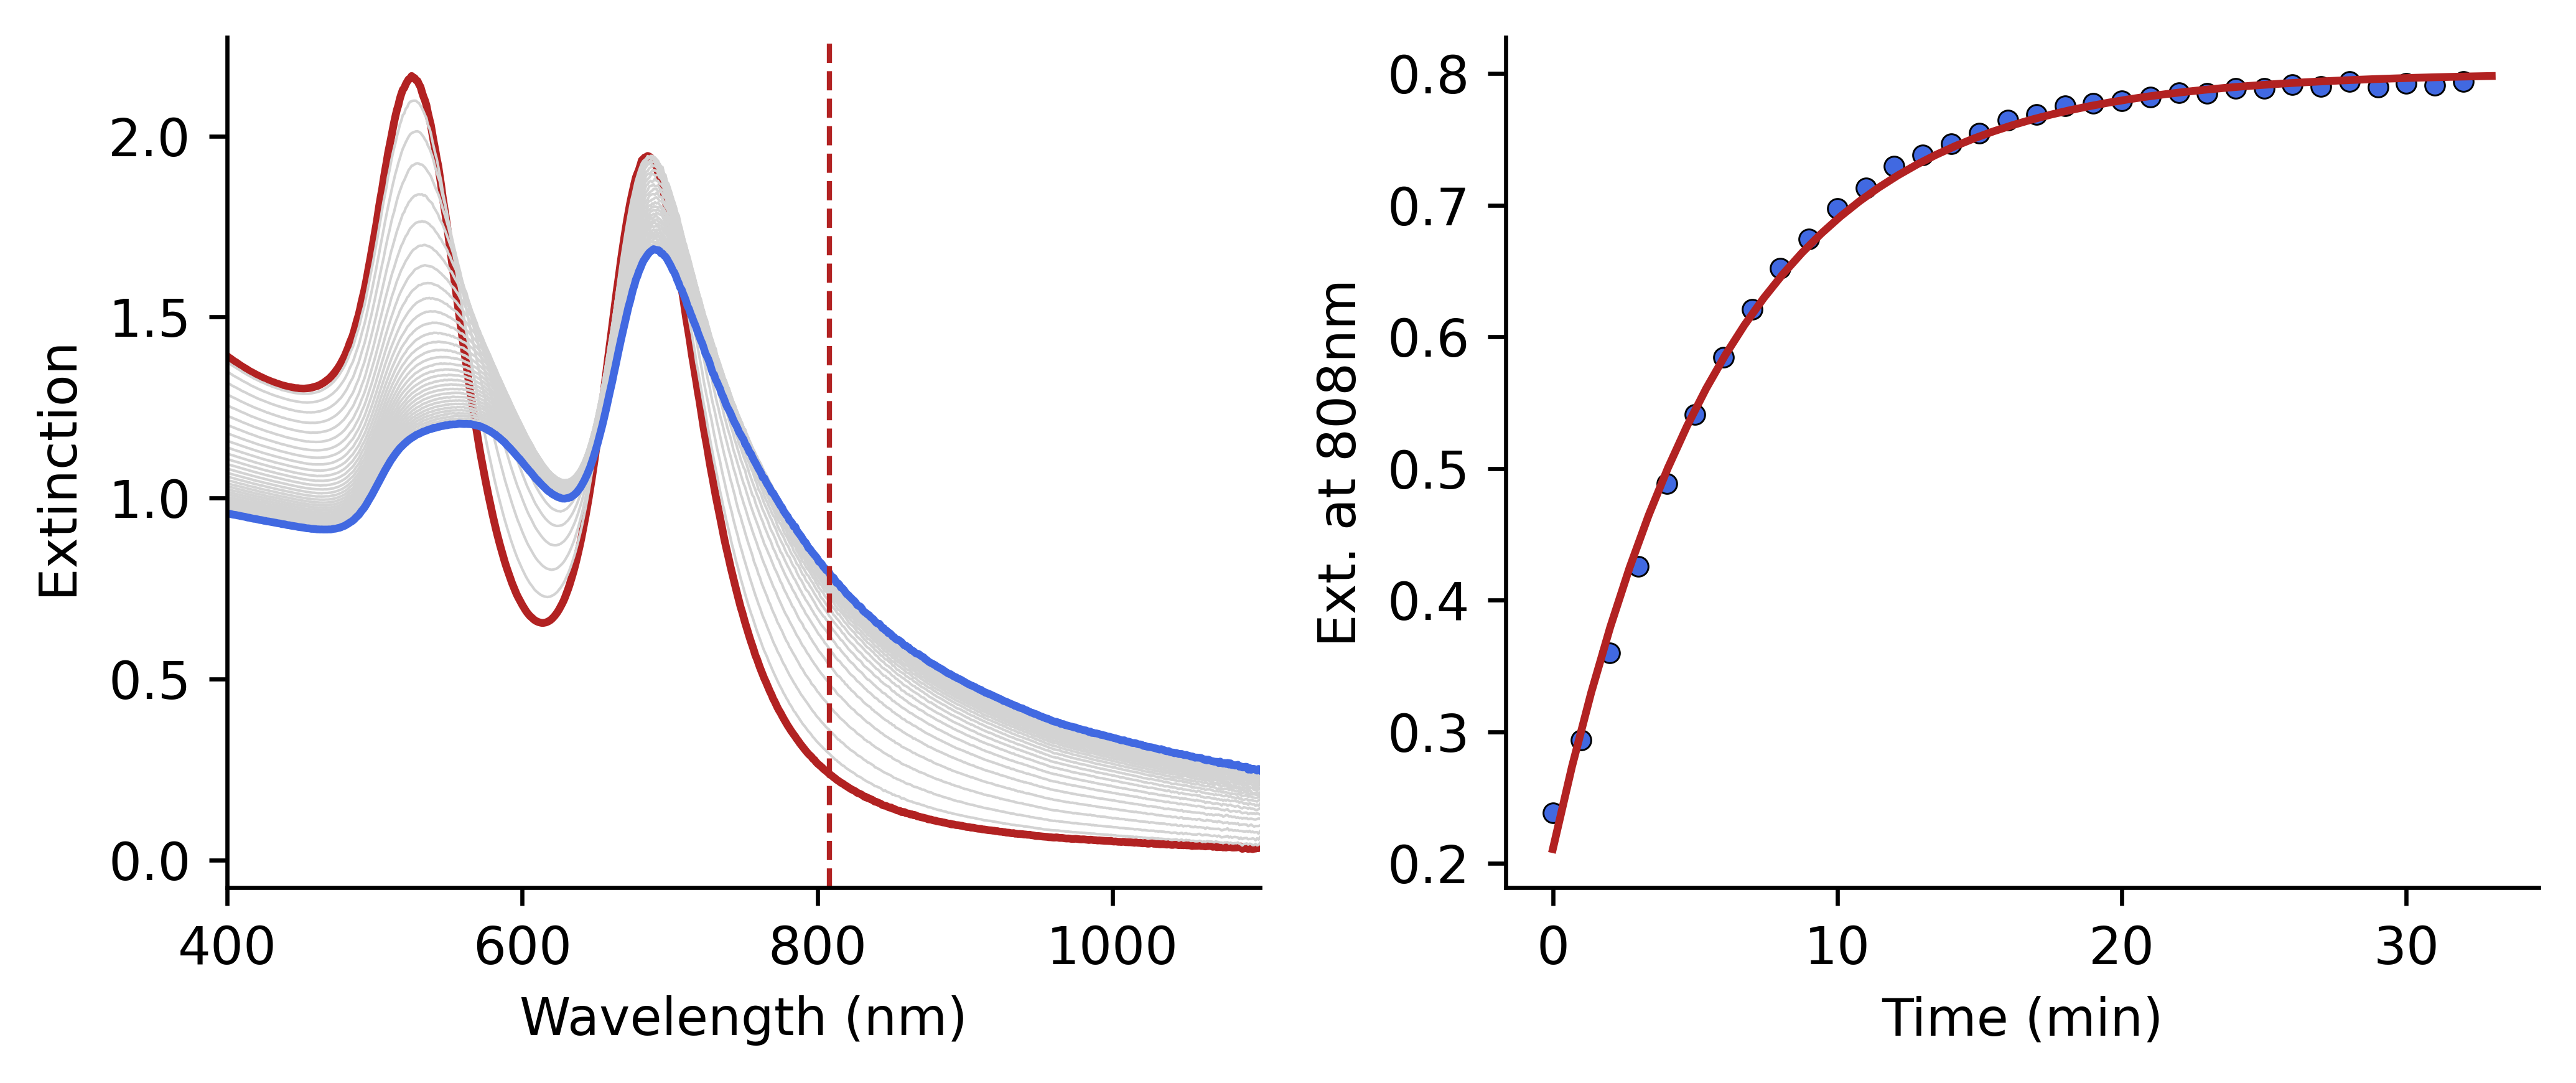

In [23]:
#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(7,3), dpi=600)
gs = fig.add_gridspec(1, 2) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[0, 1]) # upper rigth subplot


for col in odd_cols_30:
    if col == 'Abs.7':
        color = 'firebrick'
        linewidth = 1.5
    elif col == 'Abs.39':
        color = 'royalblue'
        linewidth = 1.5
    else:
        color = 'lightgrey'
        linewidth = 0.5
    
    ax1.plot(df_30min.iloc[:, 0], odd_cols_30[col], color = color, linewidth = linewidth)                            
    
ax1.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,0.7])                       # set absorbance limit
ax1.set_xlabel(r'Wavelength (nm)')          # set axis label
ax1.set_ylabel(r'Extinction ')              # set axis label
#ax.axvline(685, color = 'royalblue', linewidth = 1, linestyle = '--')
ax1.axvline(808, color = 'firebrick', linewidth = 1, linestyle = '--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

############################################################################################################################################

times_30 = []
for time in (range(33)):
    times_30.append(time)

ax2.scatter(times_30, odd_cols_808nm, color='black', s=10)                           # plot data
ax2.scatter(times_30, odd_cols_808nm, color='royalblue', s=6)                           # plot data
#ax_kin.set_xlim([0,30])                    # set wavelength limit

#ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax2.set_xlabel(r'Time (min)')          # set axis label
ax2.set_ylabel(r'Ext. at 808nm')              # set axis label
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times_30, odd_cols_808nm)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,33)

ax2.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


plt.tight_layout()  

#fig.savefig(RESULT_DIR_PATH + '2024-02-01-100ns-20nr-25nacl-100h2o-7bp2-15c-assembly-kinetics.png', transparent=True)

# old data

In [36]:
'''
Import data from the folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
txt_file_agg = natsorted(glob.glob(os.path.join(DATA_UV_DIR_PATH_REVERSIBILITY, 'agg', '', '*.txt')))
txt_file_disp = natsorted(glob.glob(os.path.join(DATA_UV_DIR_PATH_REVERSIBILITY, 'disp', '',  '*.txt')))

# Get the odd columns and even columns
#odd_cool = df_cool.iloc[:, 1::2]  # start from index 1 and select every other column
#odd_heat = df_heat.iloc[:, 1::2]  # start from index 1 and select every other column

#txt_file_agg

# For 15 cycles

abs. at lambda_max. [0.3, 0.32, 0.31, 0.29, 0.3, 0.3, 0.31, 0.3, 0.31, 0.3, 0.31, 0.3, 0.3, 0.29]


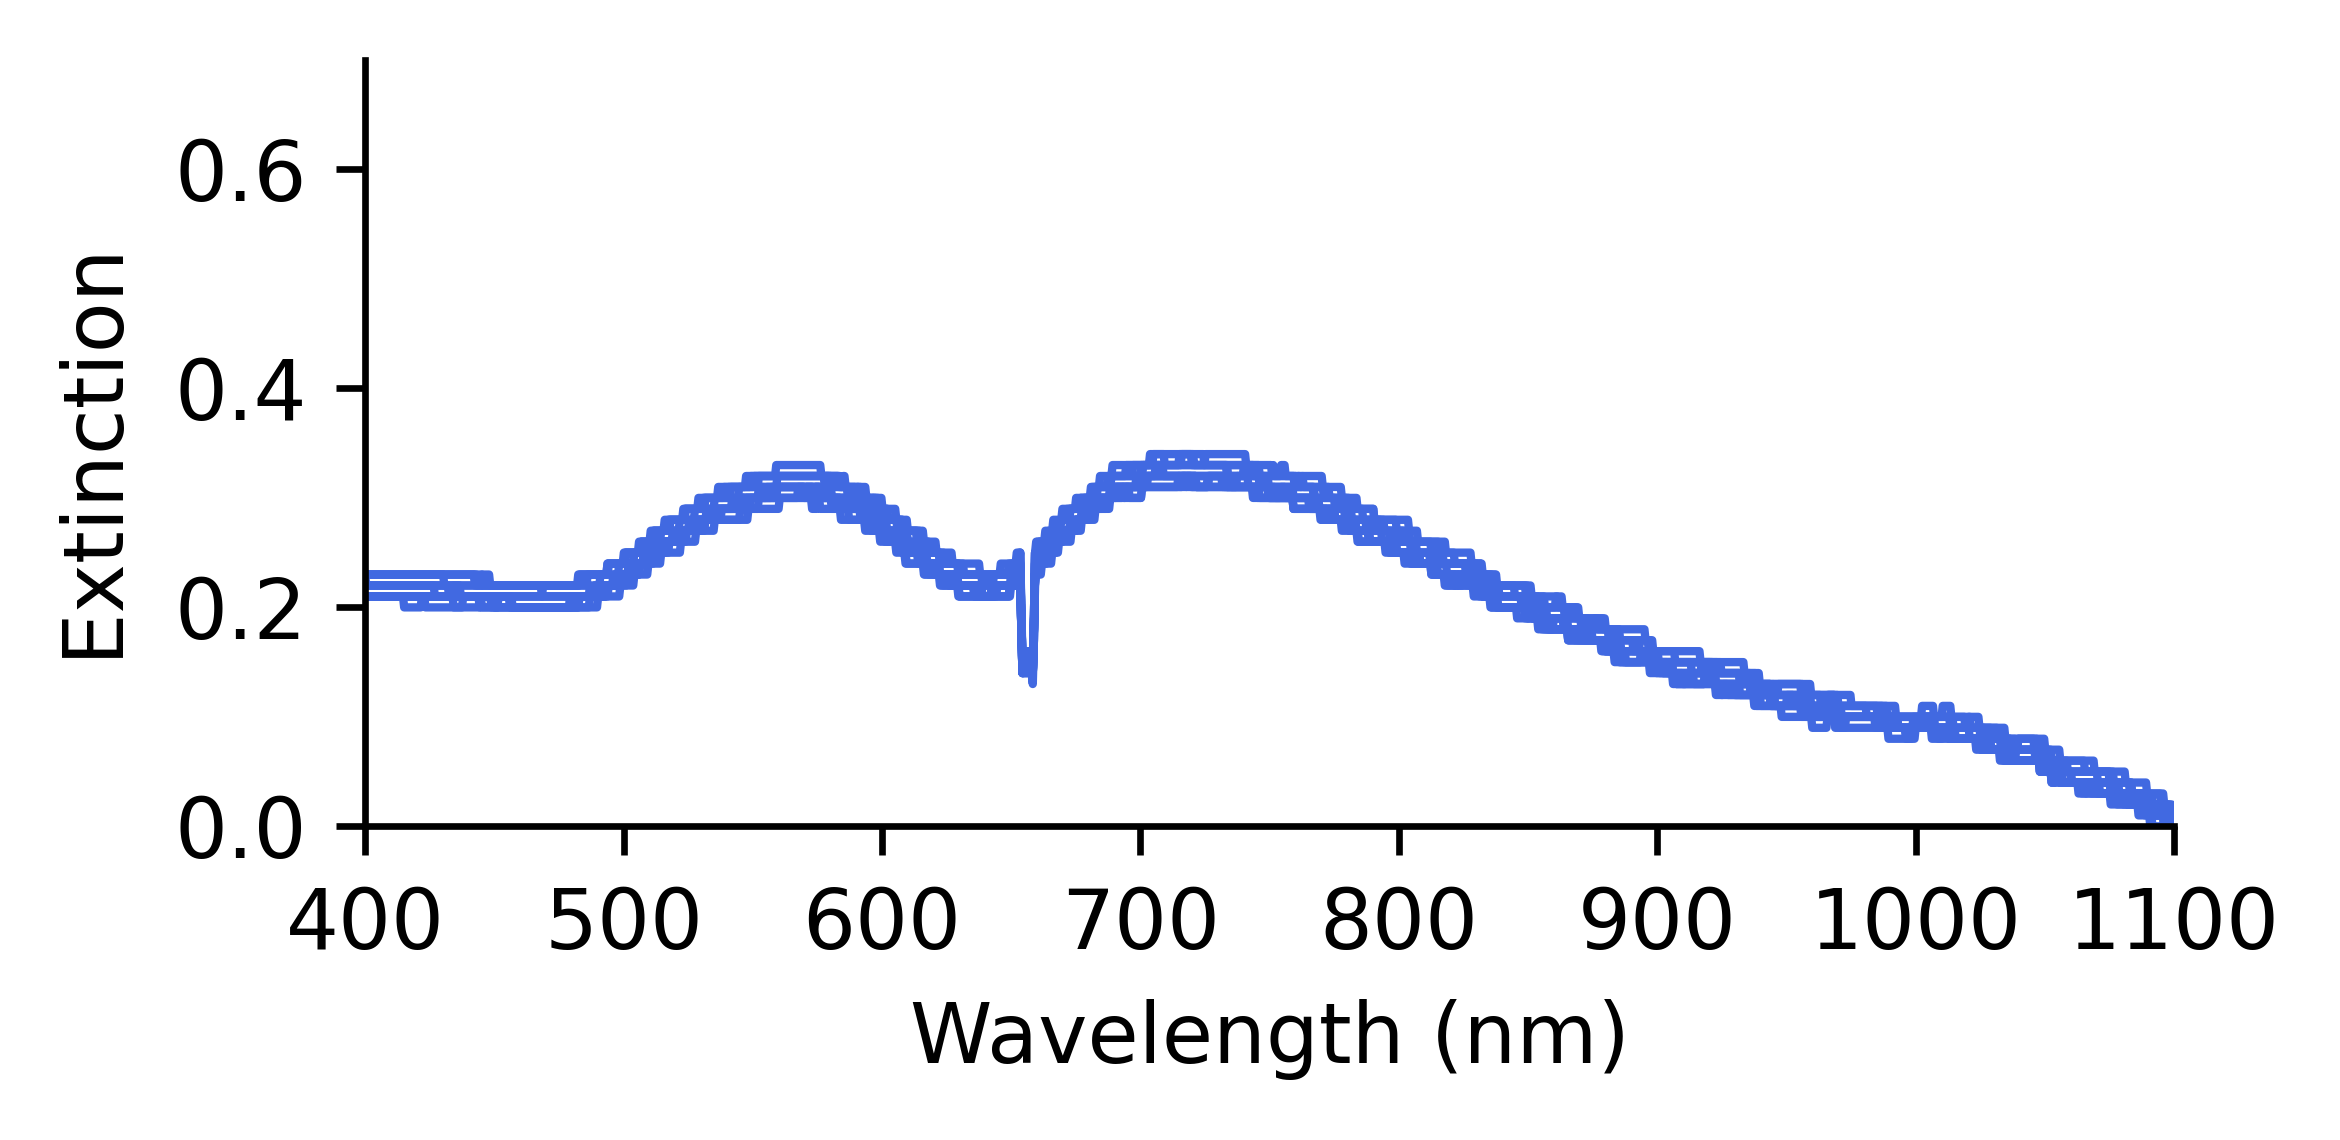

In [41]:
max_abs_agg = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1069, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
print('abs. at lambda_max.', max_abs_agg)

abs. at lambda_max. [0.49, 0.51, 0.5, 0.48, 0.49, 0.49, 0.5, 0.5, 0.5, 0.49, 0.5, 0.49, 0.5, 0.5, 0.5]


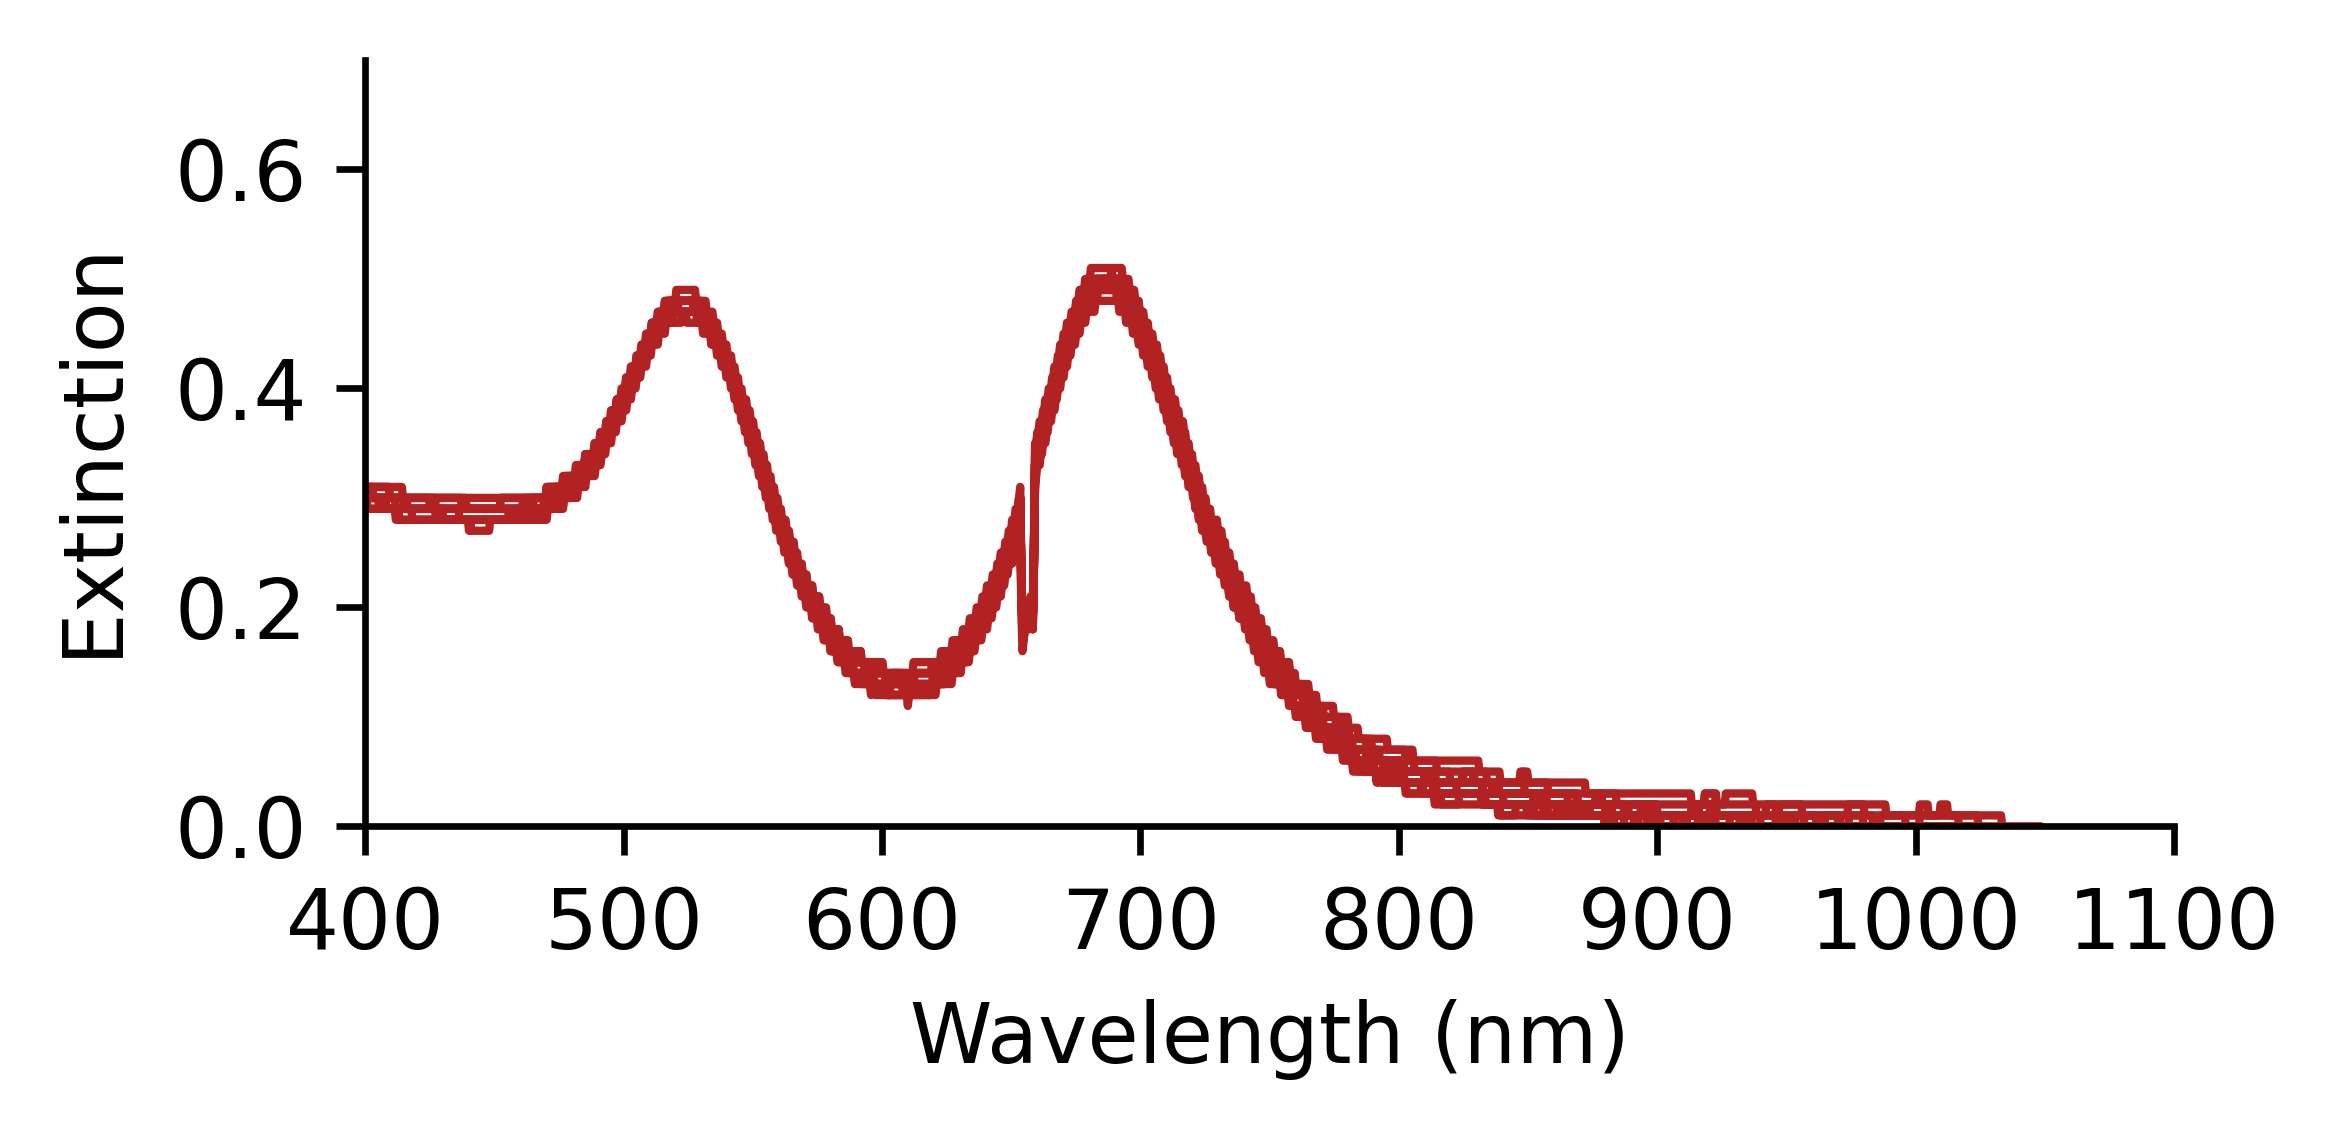

In [42]:
max_abs_disp = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1069, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  


times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print('abs. at lambda_max.', max_abs_disp)

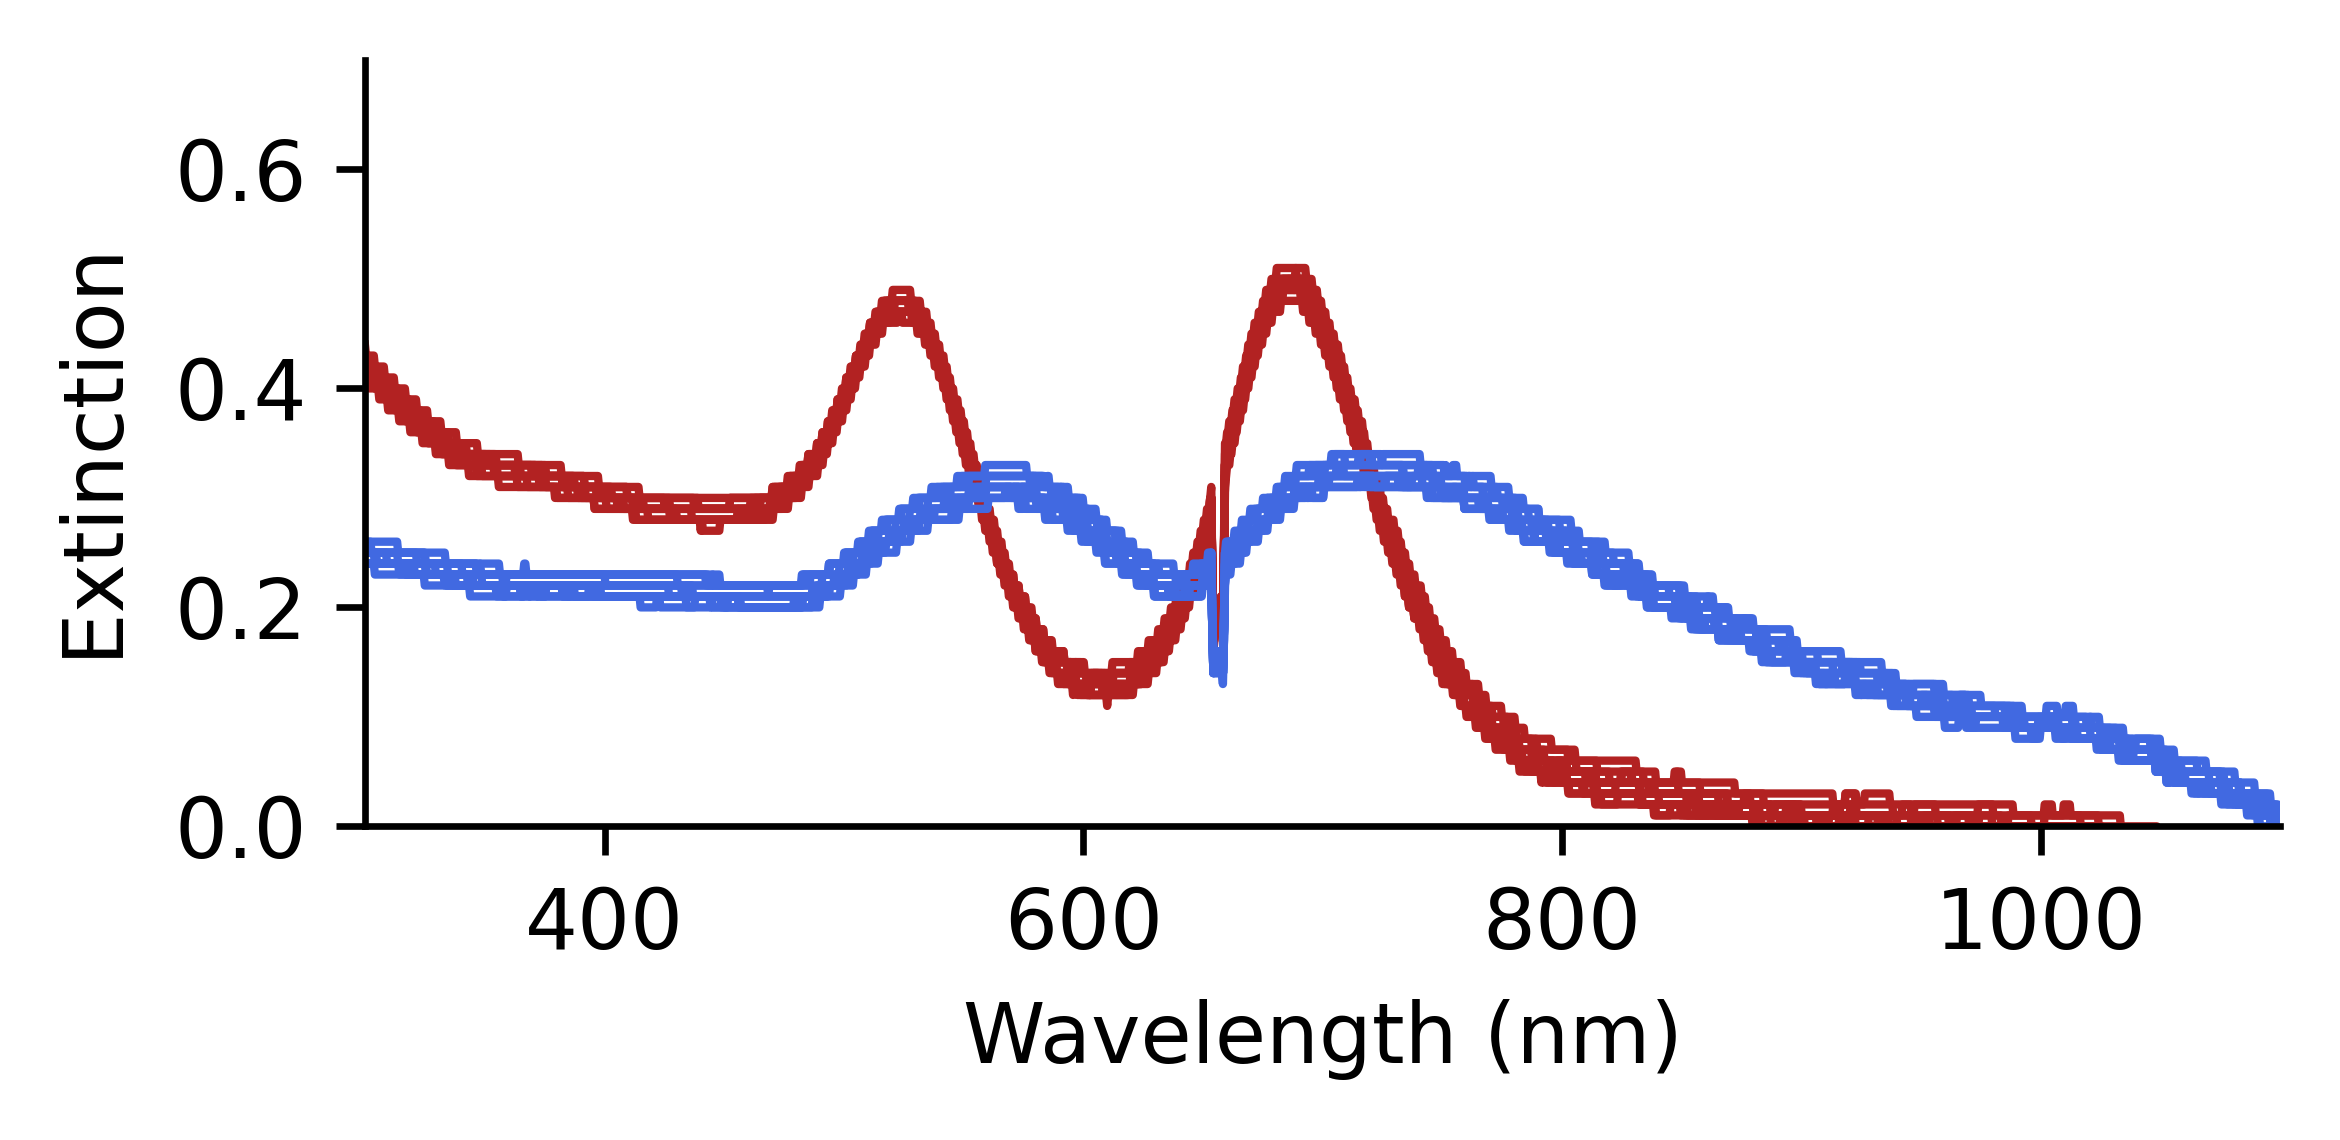

In [43]:
fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
        # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    
    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data
    
for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([300,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

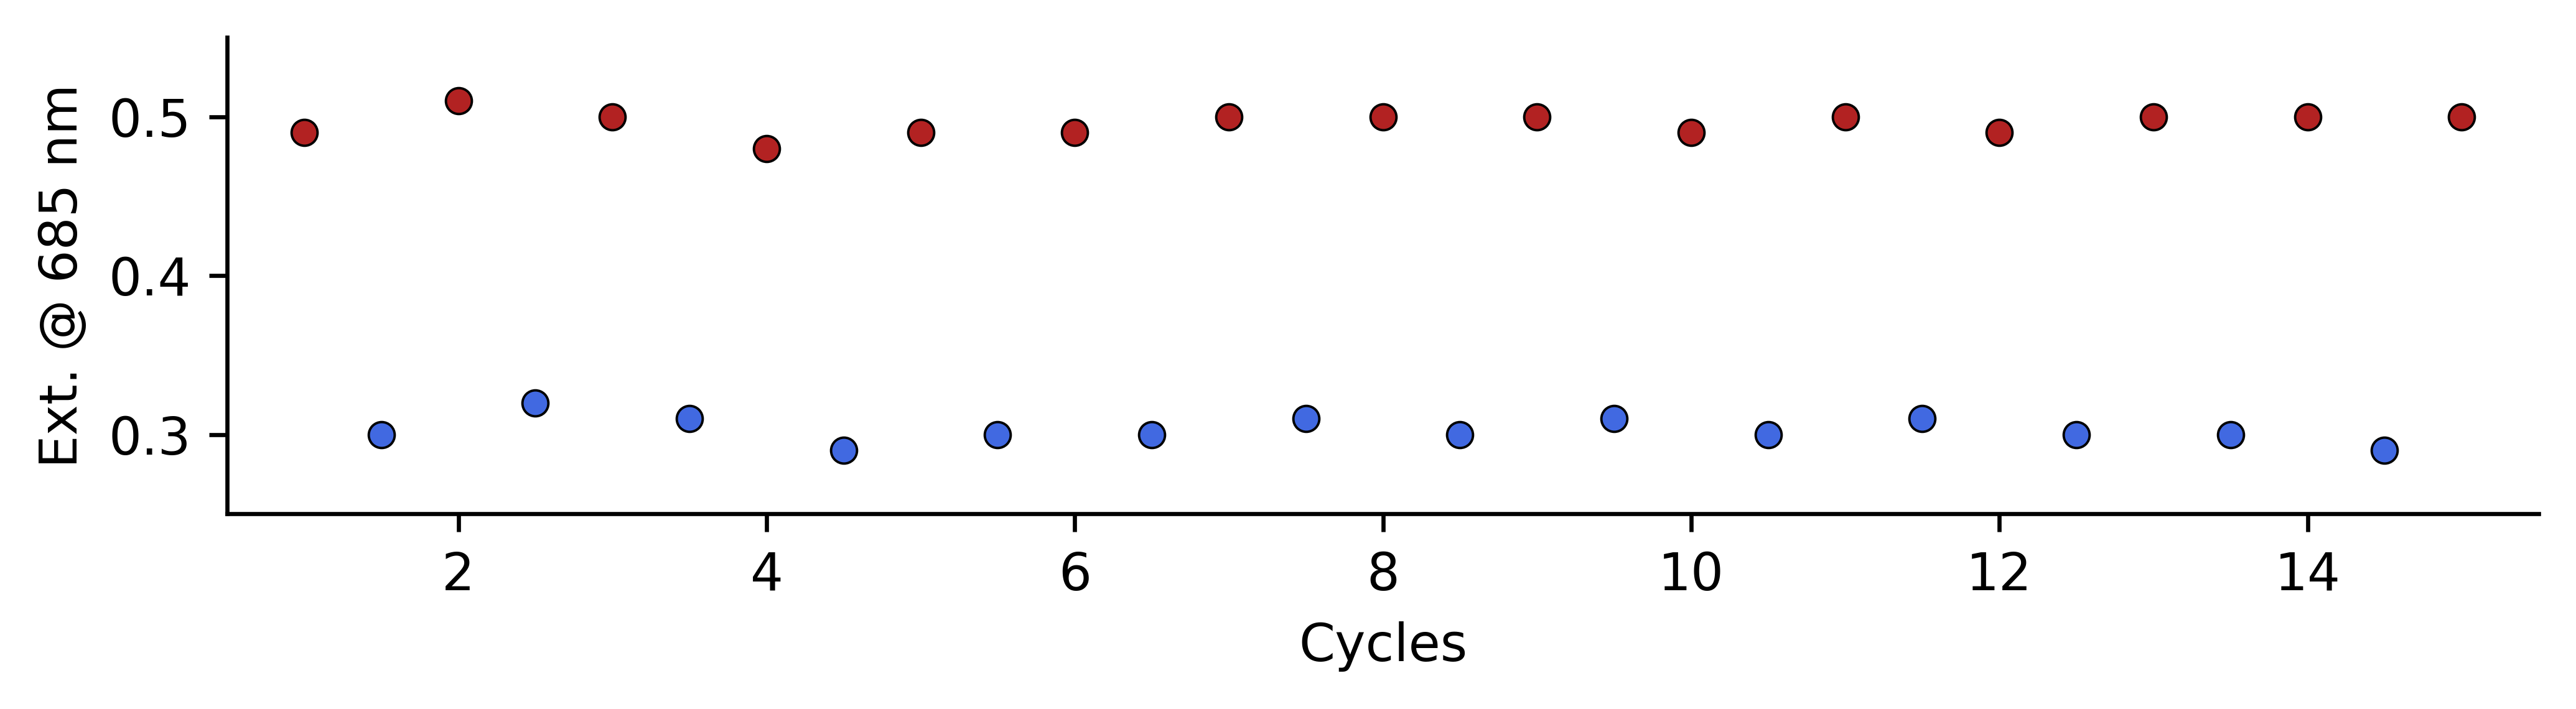

In [44]:
fig = plt.figure(figsize=(7,2), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(times_cool_agg, max_abs_agg, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_agg, max_abs_agg, color='royalblue', marker='.', s=50) 

ax_reversible.scatter(times_cool_disp, max_abs_disp, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_disp, max_abs_disp, color='firebrick', marker='.', s=50)                           

ax_reversible.set_xlim([0.5,15.5])                    # set wavelength limit
ax_reversible.set_ylim([0.25,0.55])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 685 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)
plt.tight_layout()  

#fig.savefig(RESULT_DIR_PATH+'2024-02-22-100n-20nr-25nacl-100h2o-7bp2-reveribility.png', transparent=True)

# The extinction at 808nm

abs. at lambda_max. [0.25, 0.26, 0.26, 0.24, 0.24, 0.24, 0.26, 0.25, 0.25, 0.24, 0.25, 0.24, 0.24, 0.24]
abs. at lambda_max. [0.04, 0.06, 0.05, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.04, 0.06, 0.04, 0.05, 0.03, 0.05]


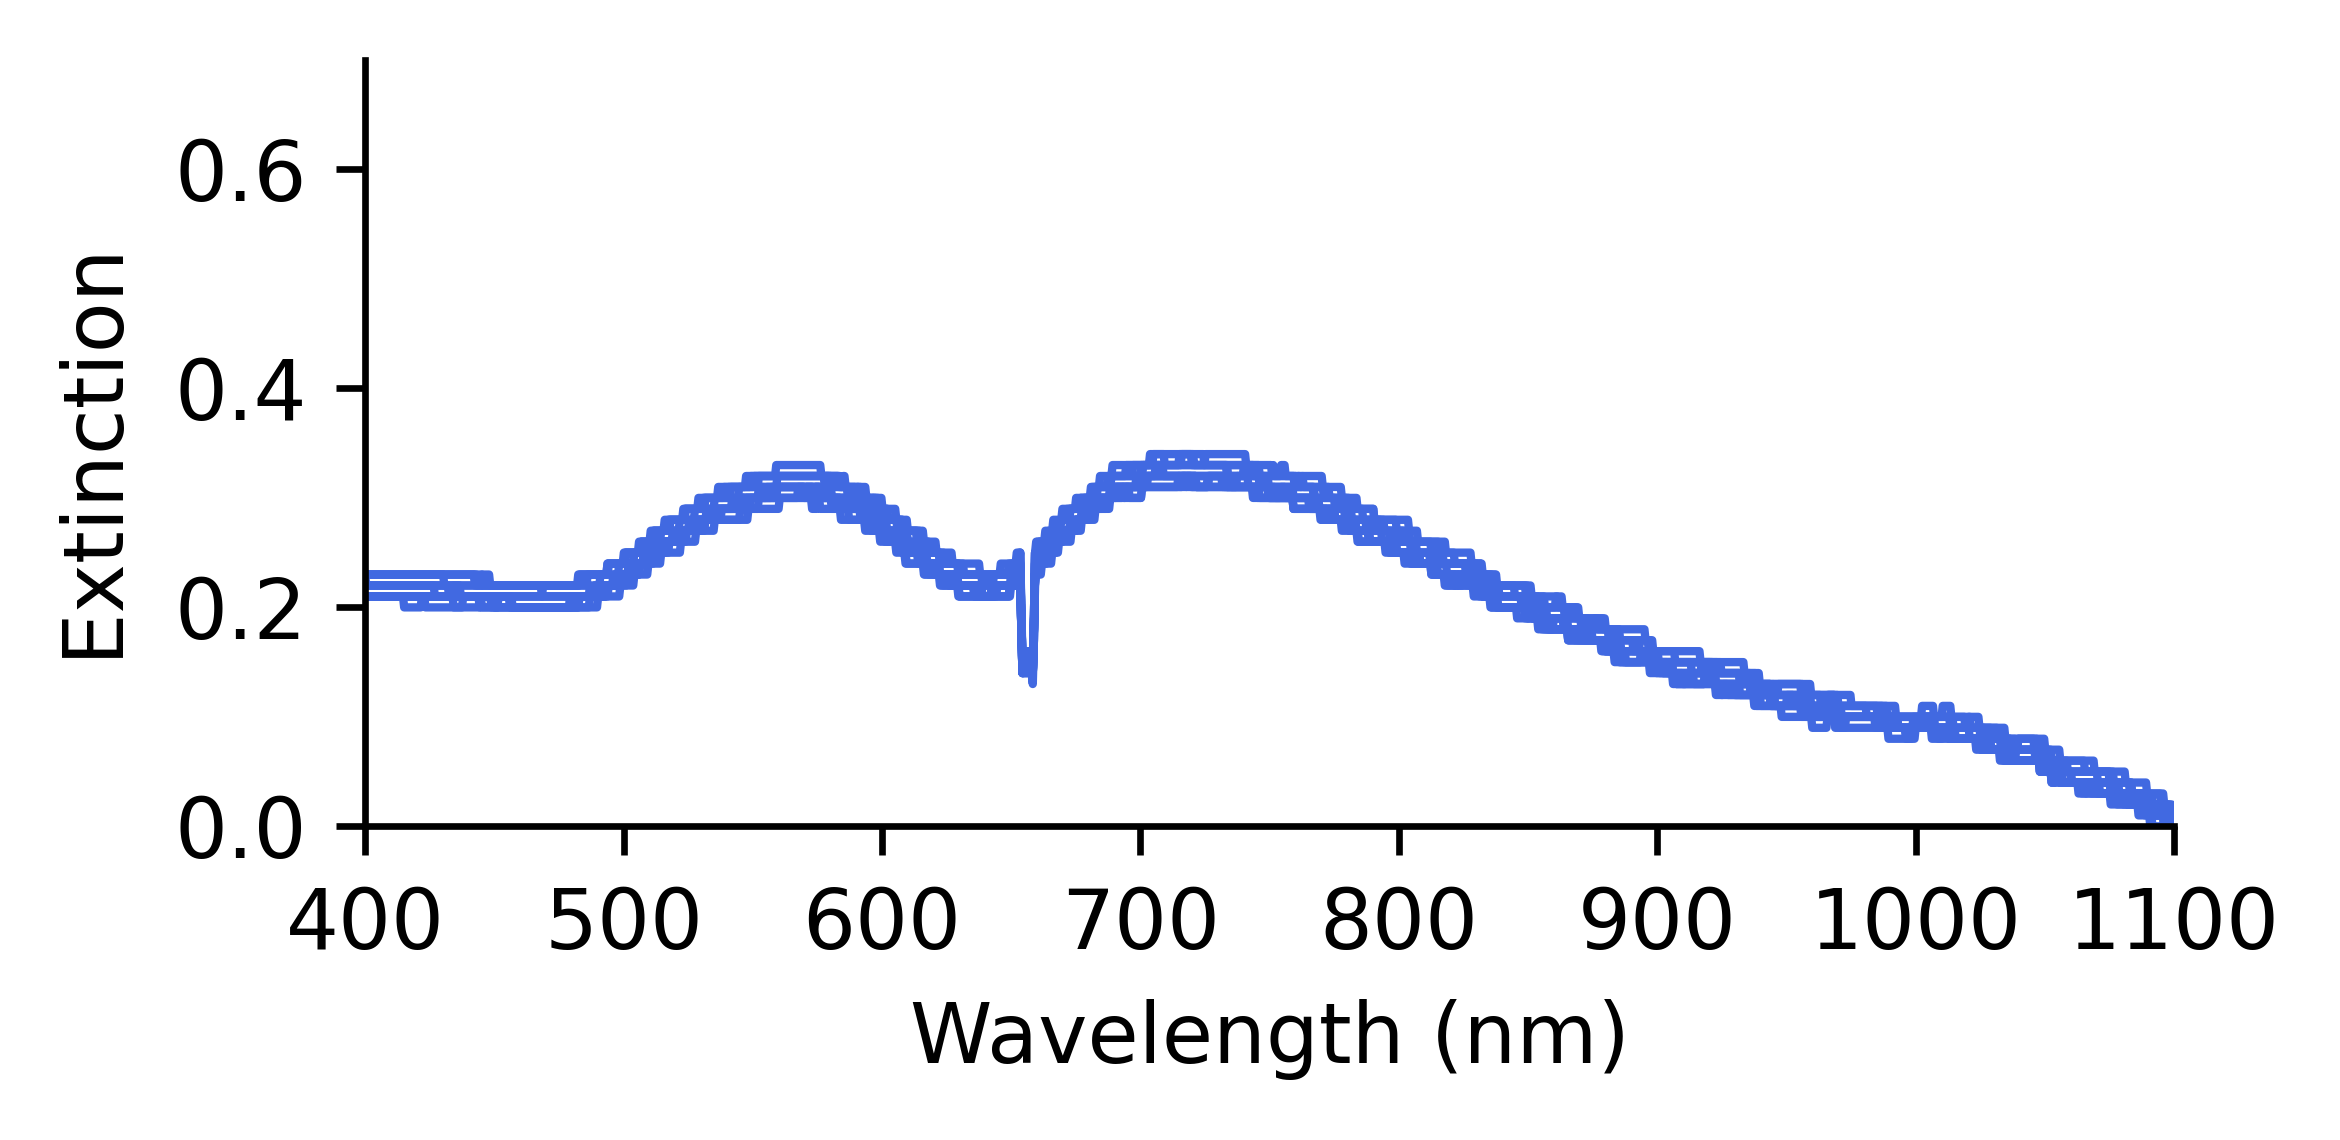

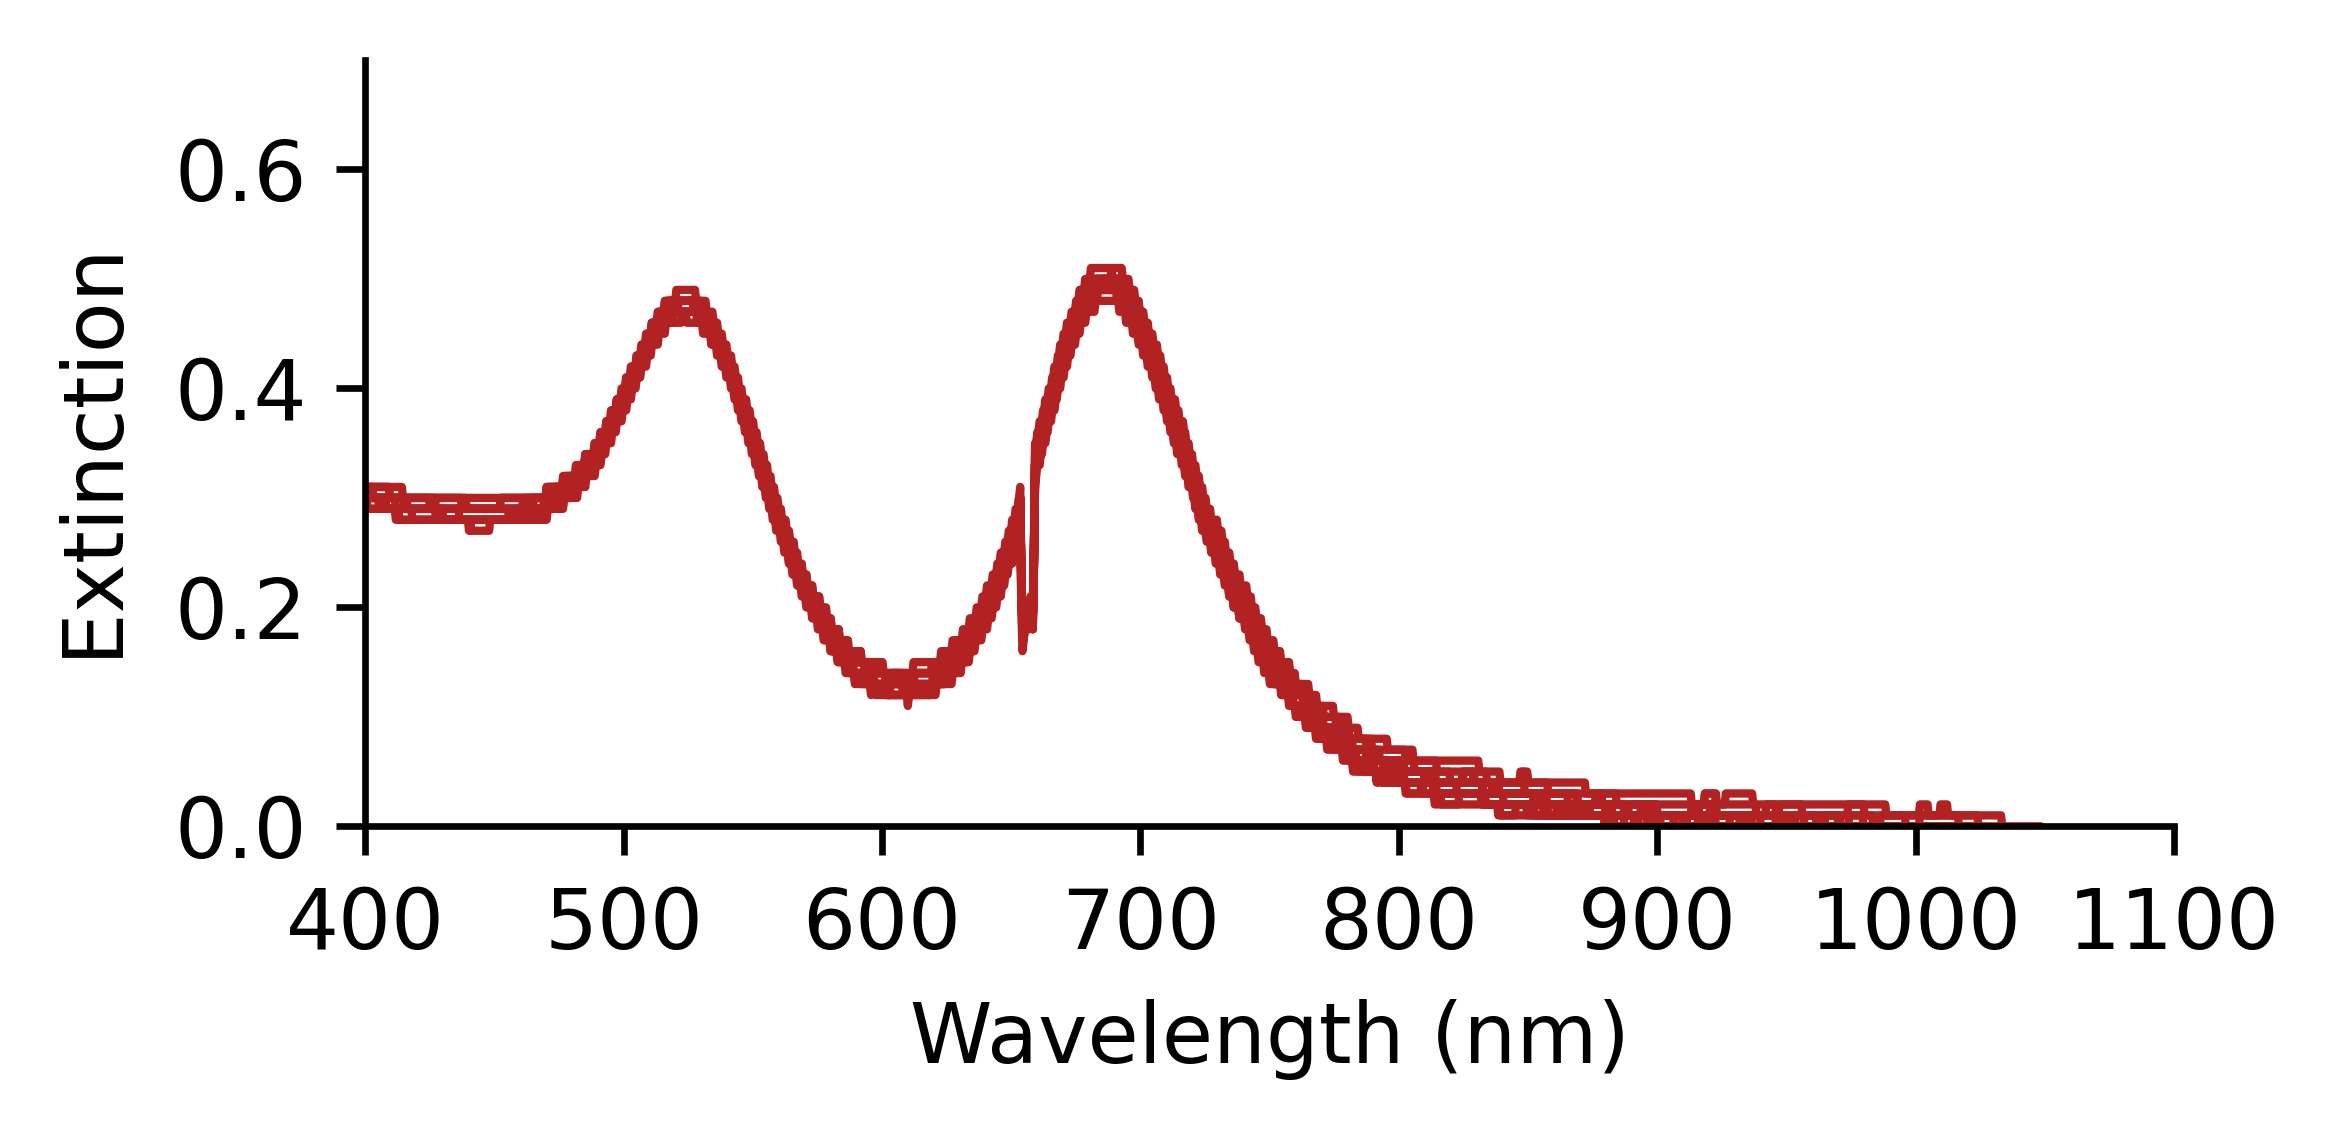

In [45]:
max_abs_agg = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1350, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
print('abs. at lambda_max.', max_abs_agg)

max_abs_disp = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1350, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  


times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print('abs. at lambda_max.', max_abs_disp)

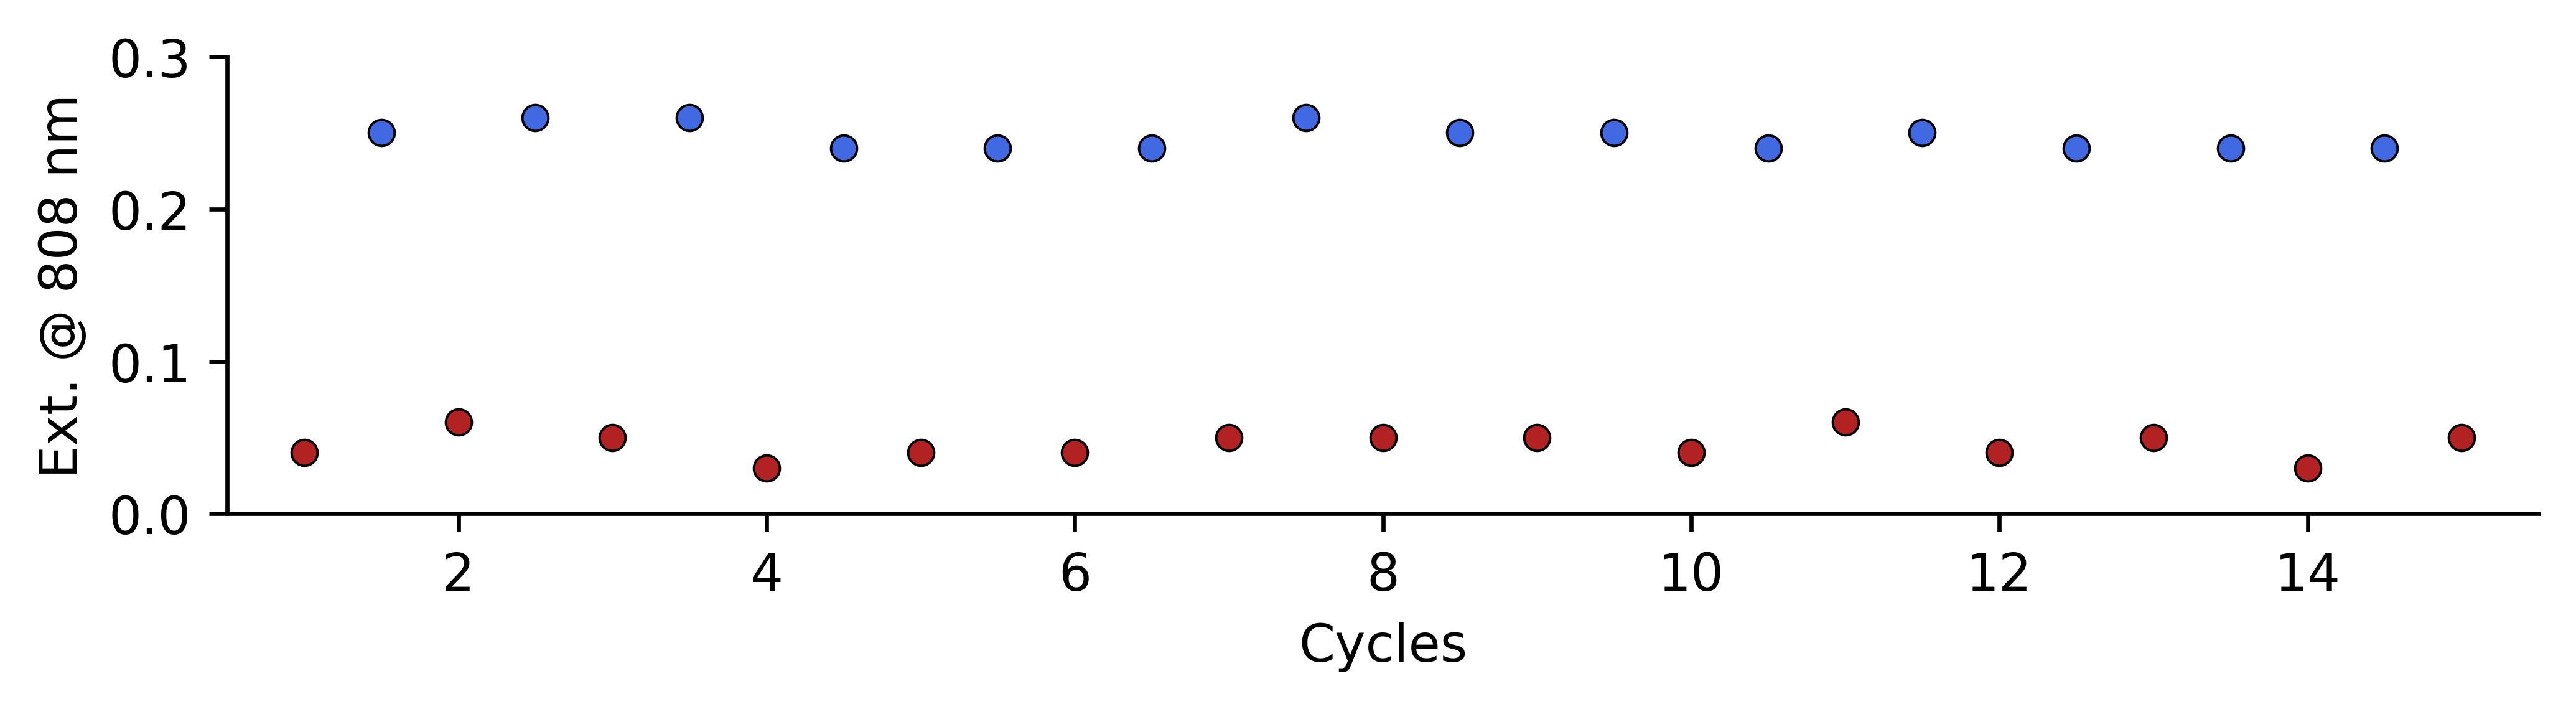

In [47]:
fig = plt.figure(figsize=(7,2), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(times_cool_agg, max_abs_agg, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_agg, max_abs_agg, color='royalblue', marker='.', s=50) 

ax_reversible.scatter(times_cool_disp, max_abs_disp, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_disp, max_abs_disp, color='firebrick', marker='.', s=50)                           

ax_reversible.set_xlim([0.5,15.5])                    # set wavelength limit
ax_reversible.set_ylim([0,0.3])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 808 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)
plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'2024-02-22-100n-20nr-25nacl-100h2o-7bp2-reveribility_808nm_15cycles.png', transparent=True)

abs. at lambda_max. [0.3, 0.32, 0.31, 0.29, 0.3, 0.3, 0.31, 0.3, 0.31, 0.3]


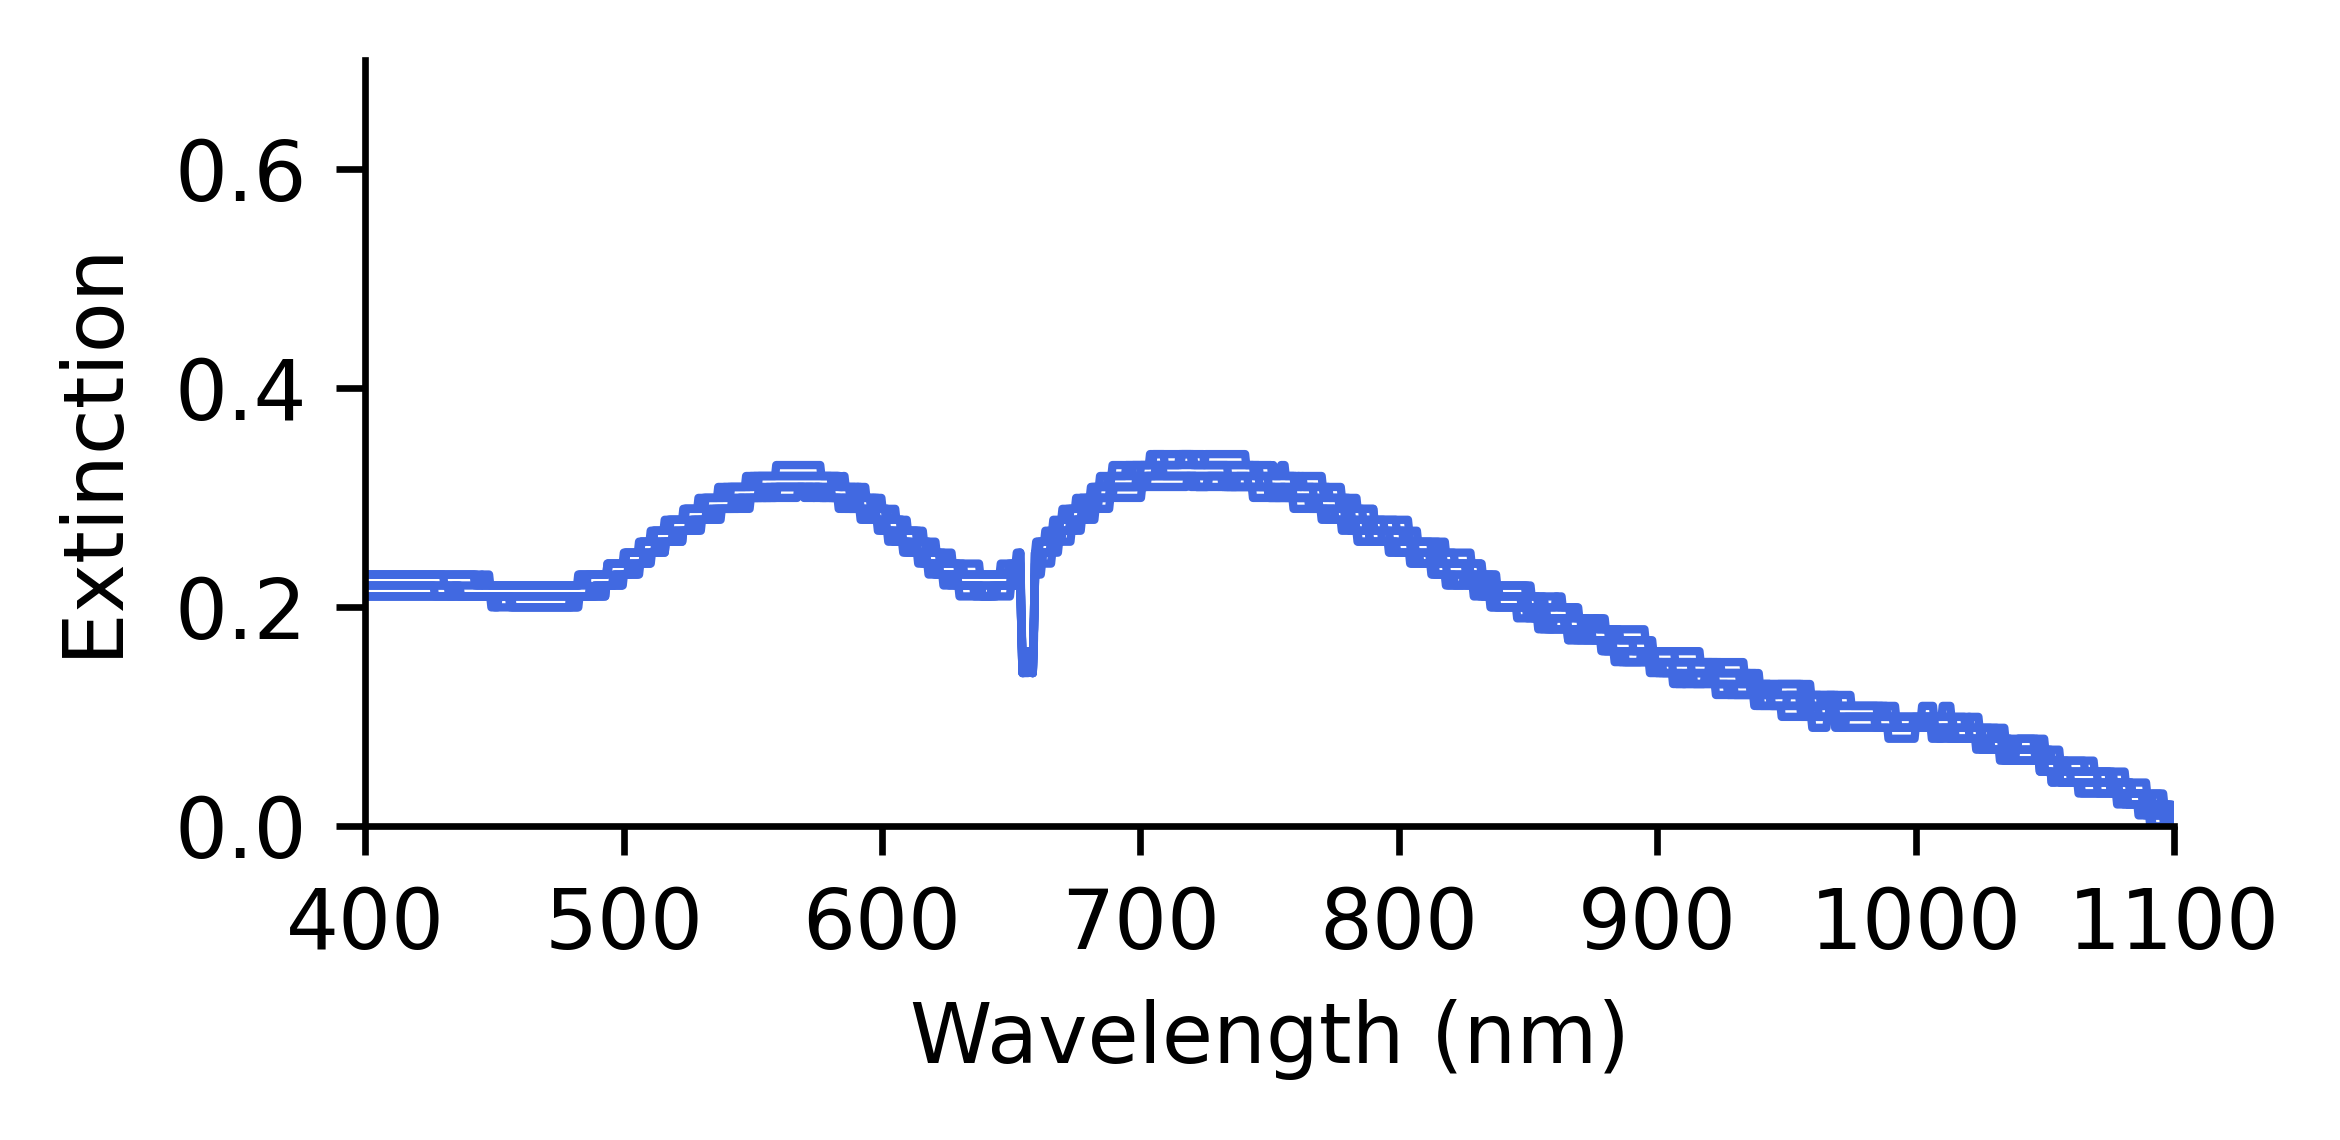

In [27]:
max_abs_agg = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1069, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
print('abs. at lambda_max.', max_abs_agg)

In [30]:
df_disp.iloc[1069,:] # 685.709 wavelength

0    685.709
1      0.500
Name: 1069, dtype: float64

abs. at lambda_max. [0.49, 0.51, 0.5, 0.48, 0.49, 0.49, 0.5, 0.5, 0.5, 0.49, 0.5]


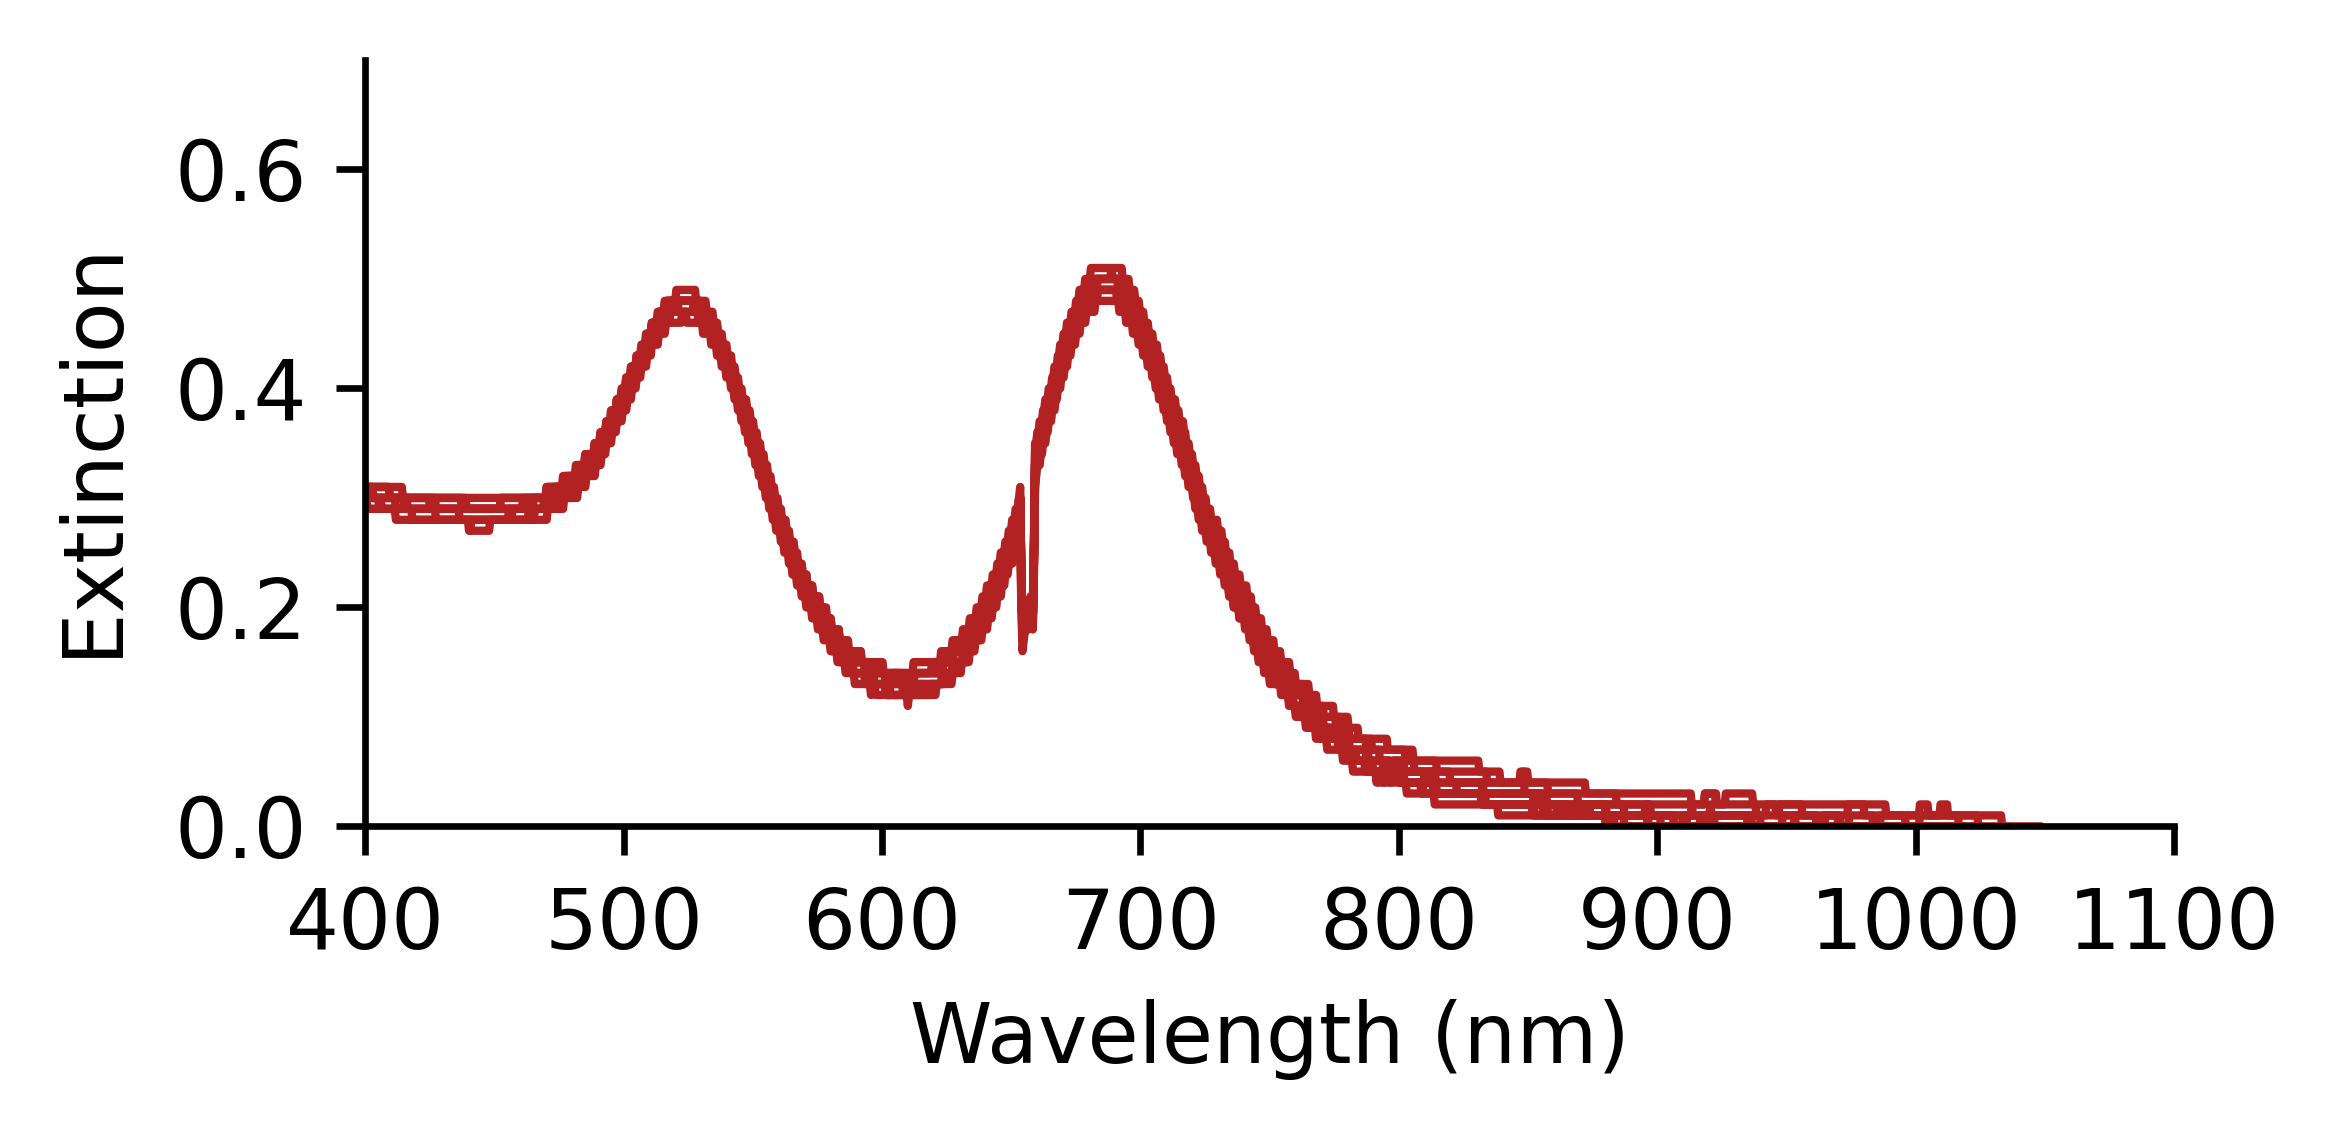

In [29]:
max_abs_disp = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1069, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  


times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11]
print('abs. at lambda_max.', max_abs_disp)

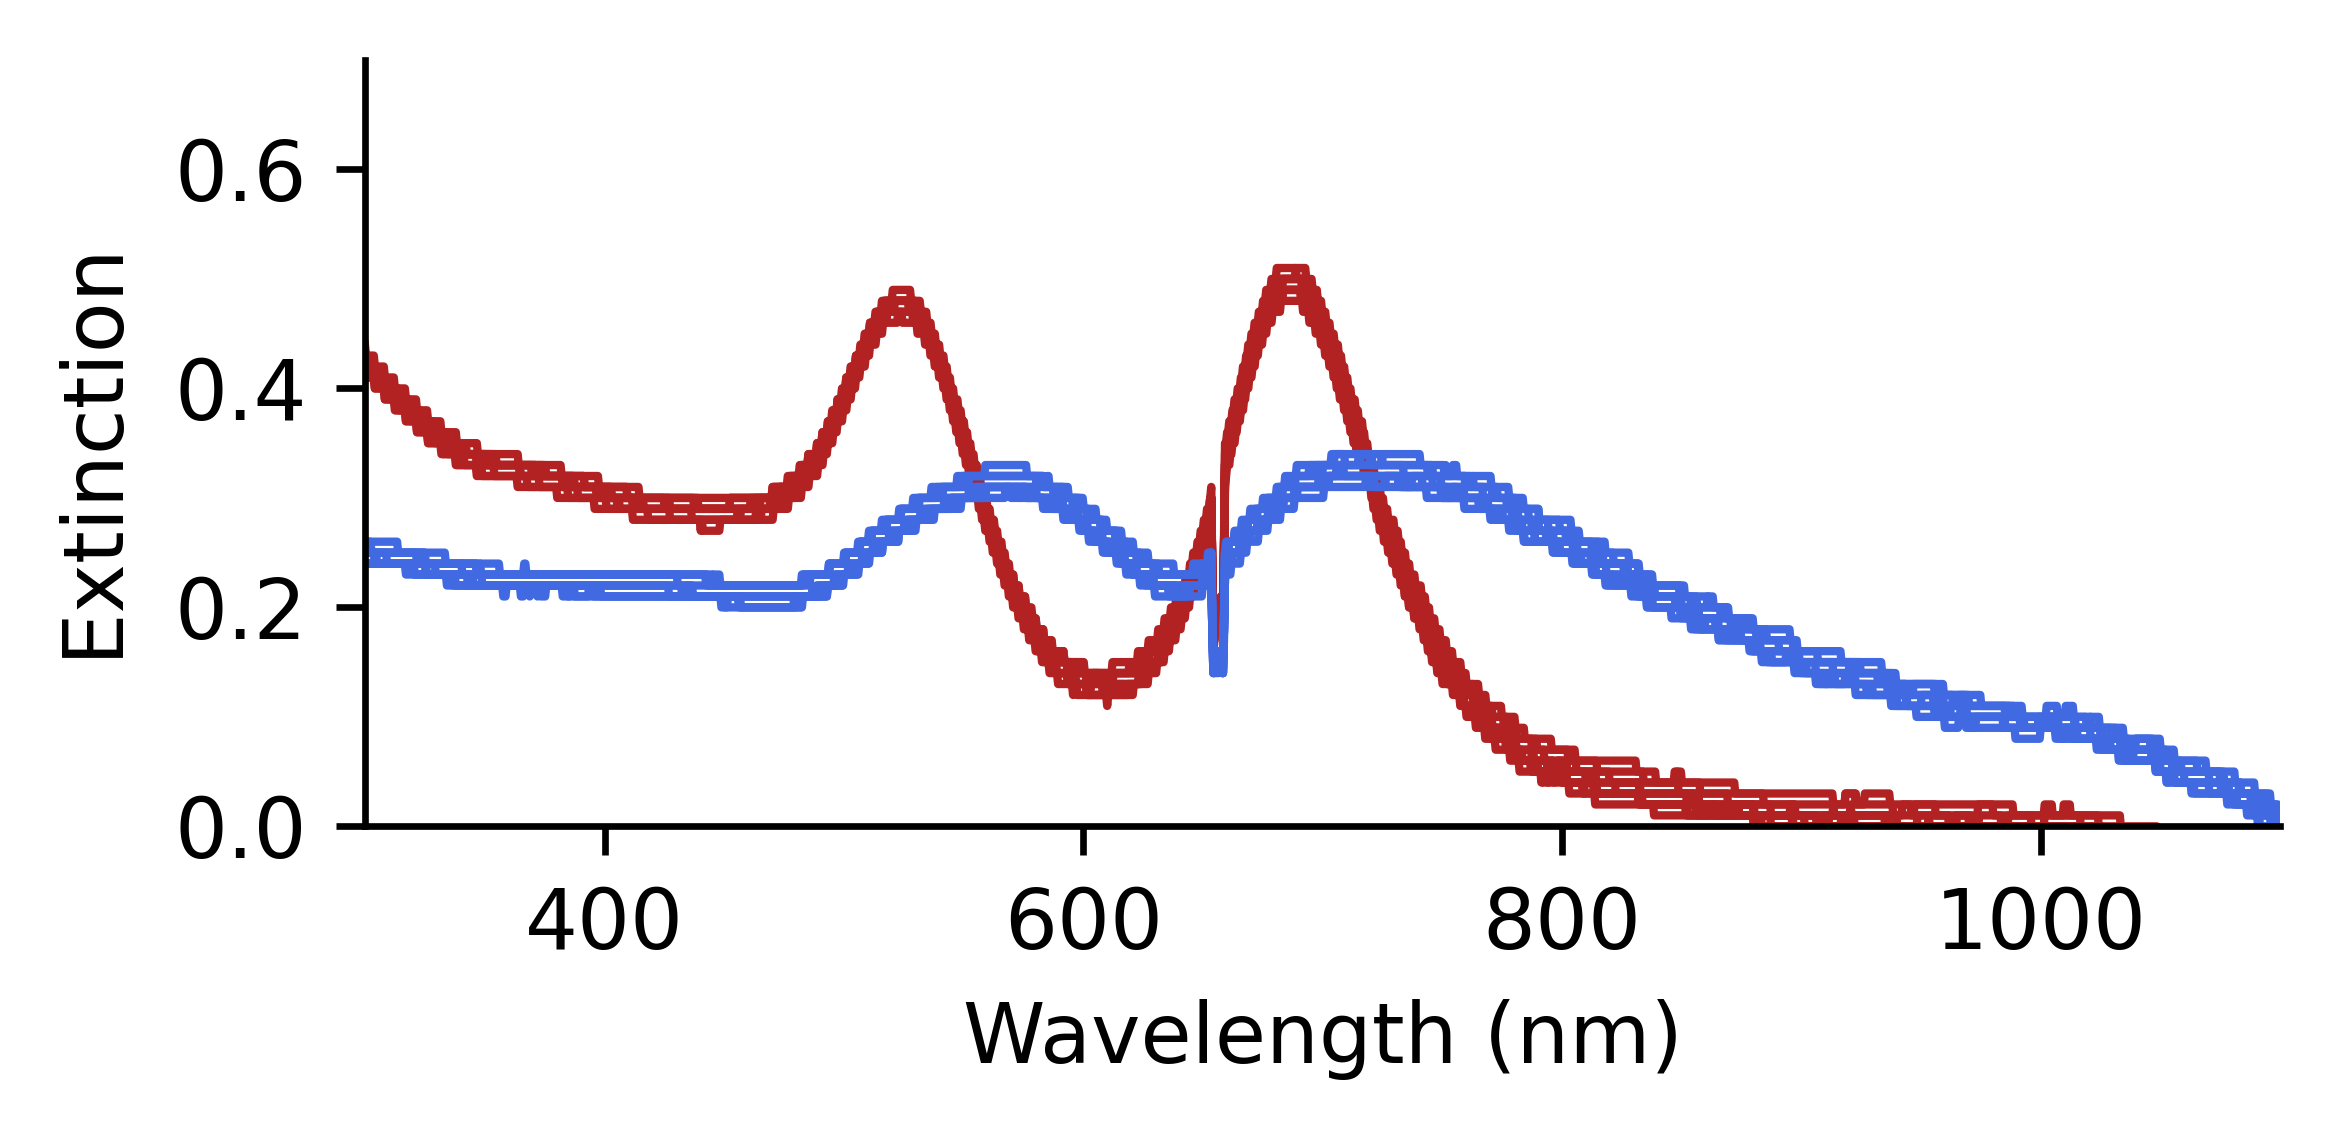

In [31]:
fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
        # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    
    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data
    
for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([300,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

In [32]:
rev_time = times_cool_agg + times_cool_disp
rev_abs = max_abs_agg + max_abs_disp

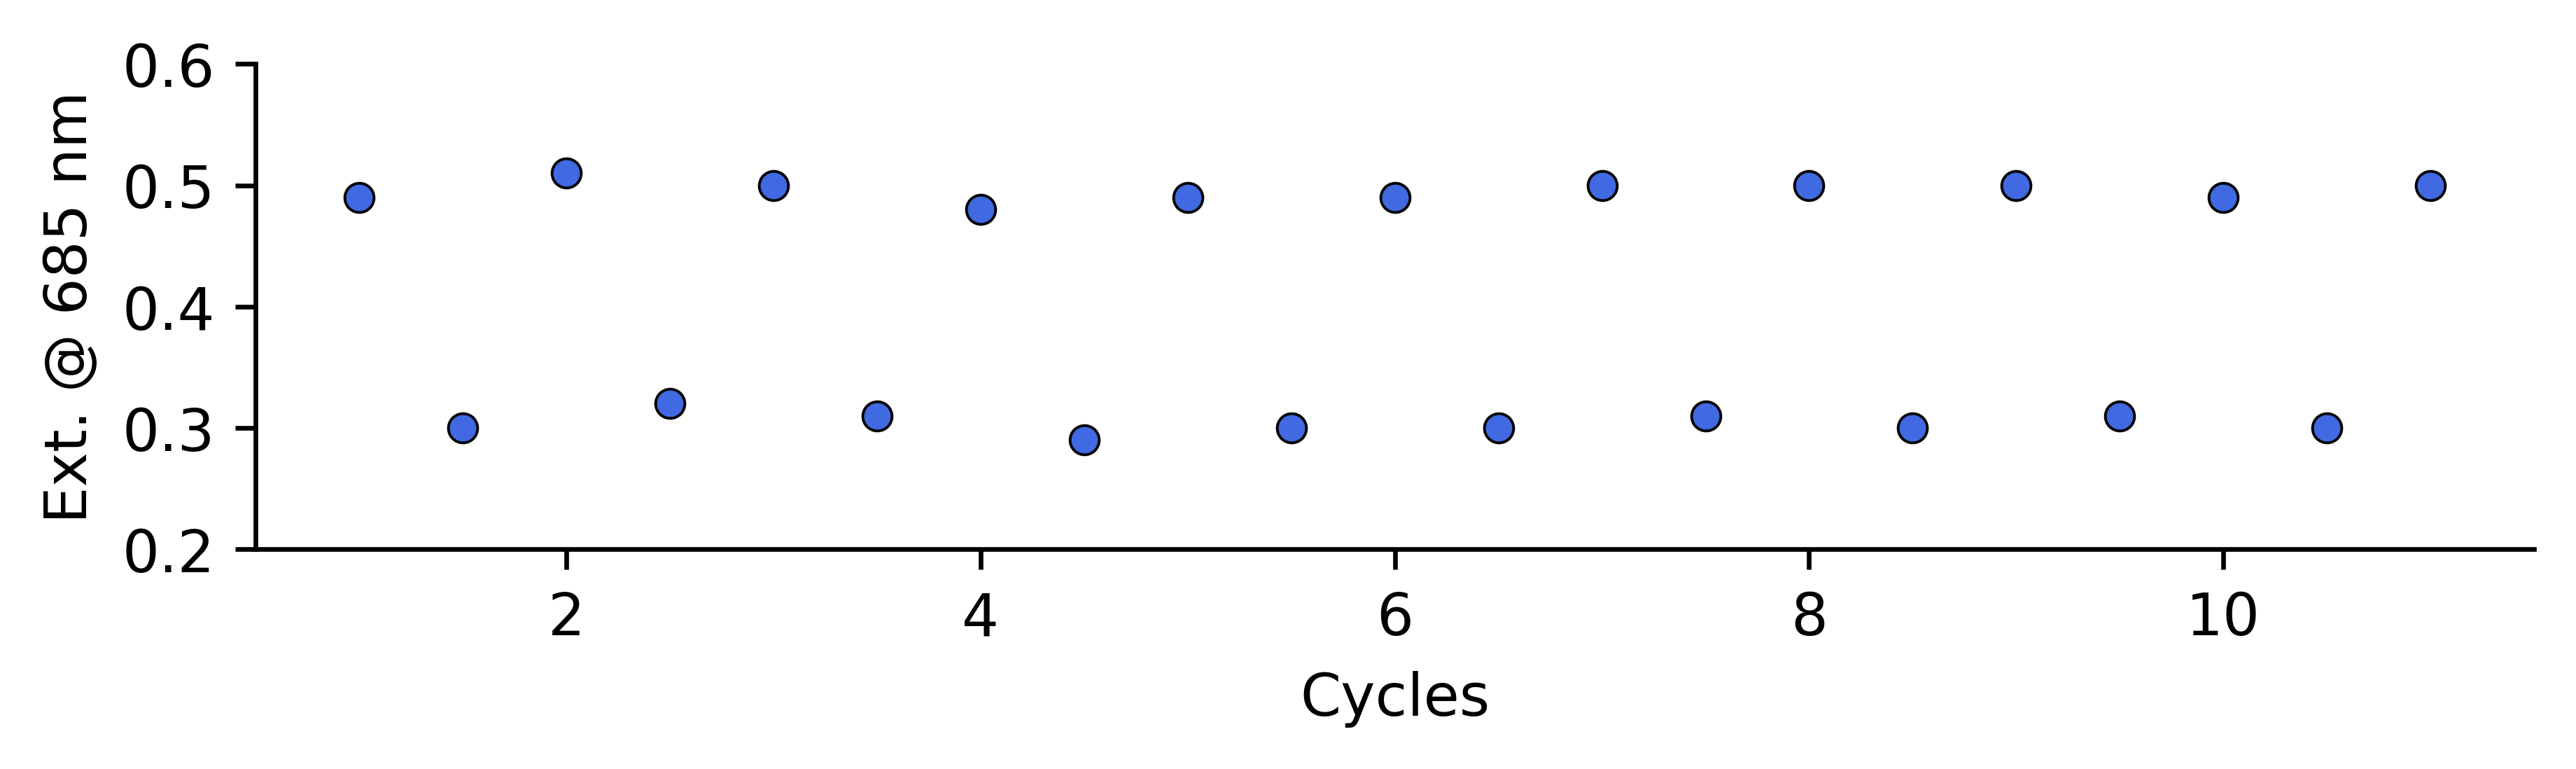

In [33]:
fig = plt.figure(figsize=(7,1.5), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(rev_time, rev_abs, color='black', marker='.', s=80)  
ax_reversible.scatter(rev_time, rev_abs, color='royalblue', marker='.', s=50)                         

ax_reversible.set_xlim([0.5,11.5])                    # set wavelength limit
ax_reversible.set_ylim([0.2,0.6])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 685 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)


#fig.savefig(RESULT_DIR_PATH+'23-03-2023-reversibility.jpeg', transparent=True)

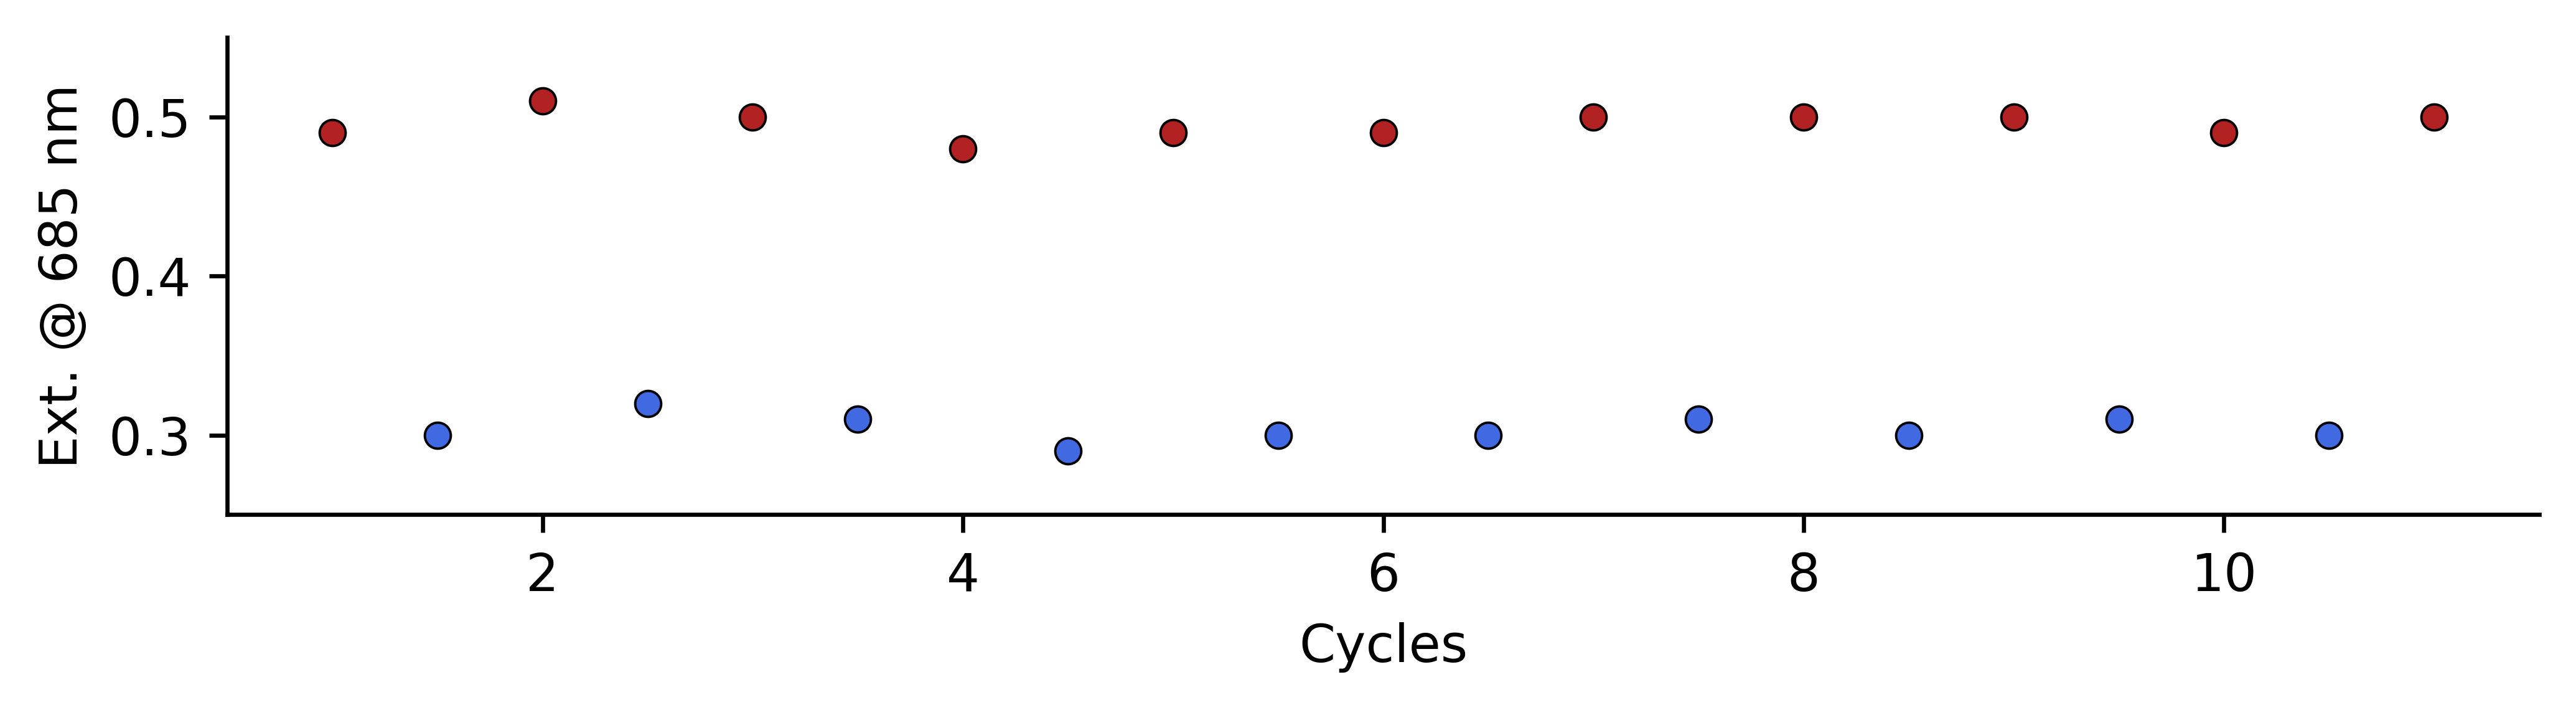

In [34]:
fig = plt.figure(figsize=(7,2), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(times_cool_agg, max_abs_agg, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_agg, max_abs_agg, color='royalblue', marker='.', s=50) 

ax_reversible.scatter(times_cool_disp, max_abs_disp, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_disp, max_abs_disp, color='firebrick', marker='.', s=50)                           

ax_reversible.set_xlim([0.5,11.5])                    # set wavelength limit
ax_reversible.set_ylim([0.25,0.55])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 685 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)
plt.tight_layout()  

#fig.savefig(RESULT_DIR_PATH+'2024-02-22-100n-20nr-25nacl-100h2o-7bp2-reveribility.png', transparent=True)

# Reversibility at 808 nm

In [40]:
df_disp.iloc[1350,:] # 808.308 wavelength

0    808.308
1      0.060
Name: 1350, dtype: float64

abs. at lambda_max. [0.25, 0.26, 0.26, 0.24, 0.24, 0.24, 0.26, 0.25, 0.25, 0.24]


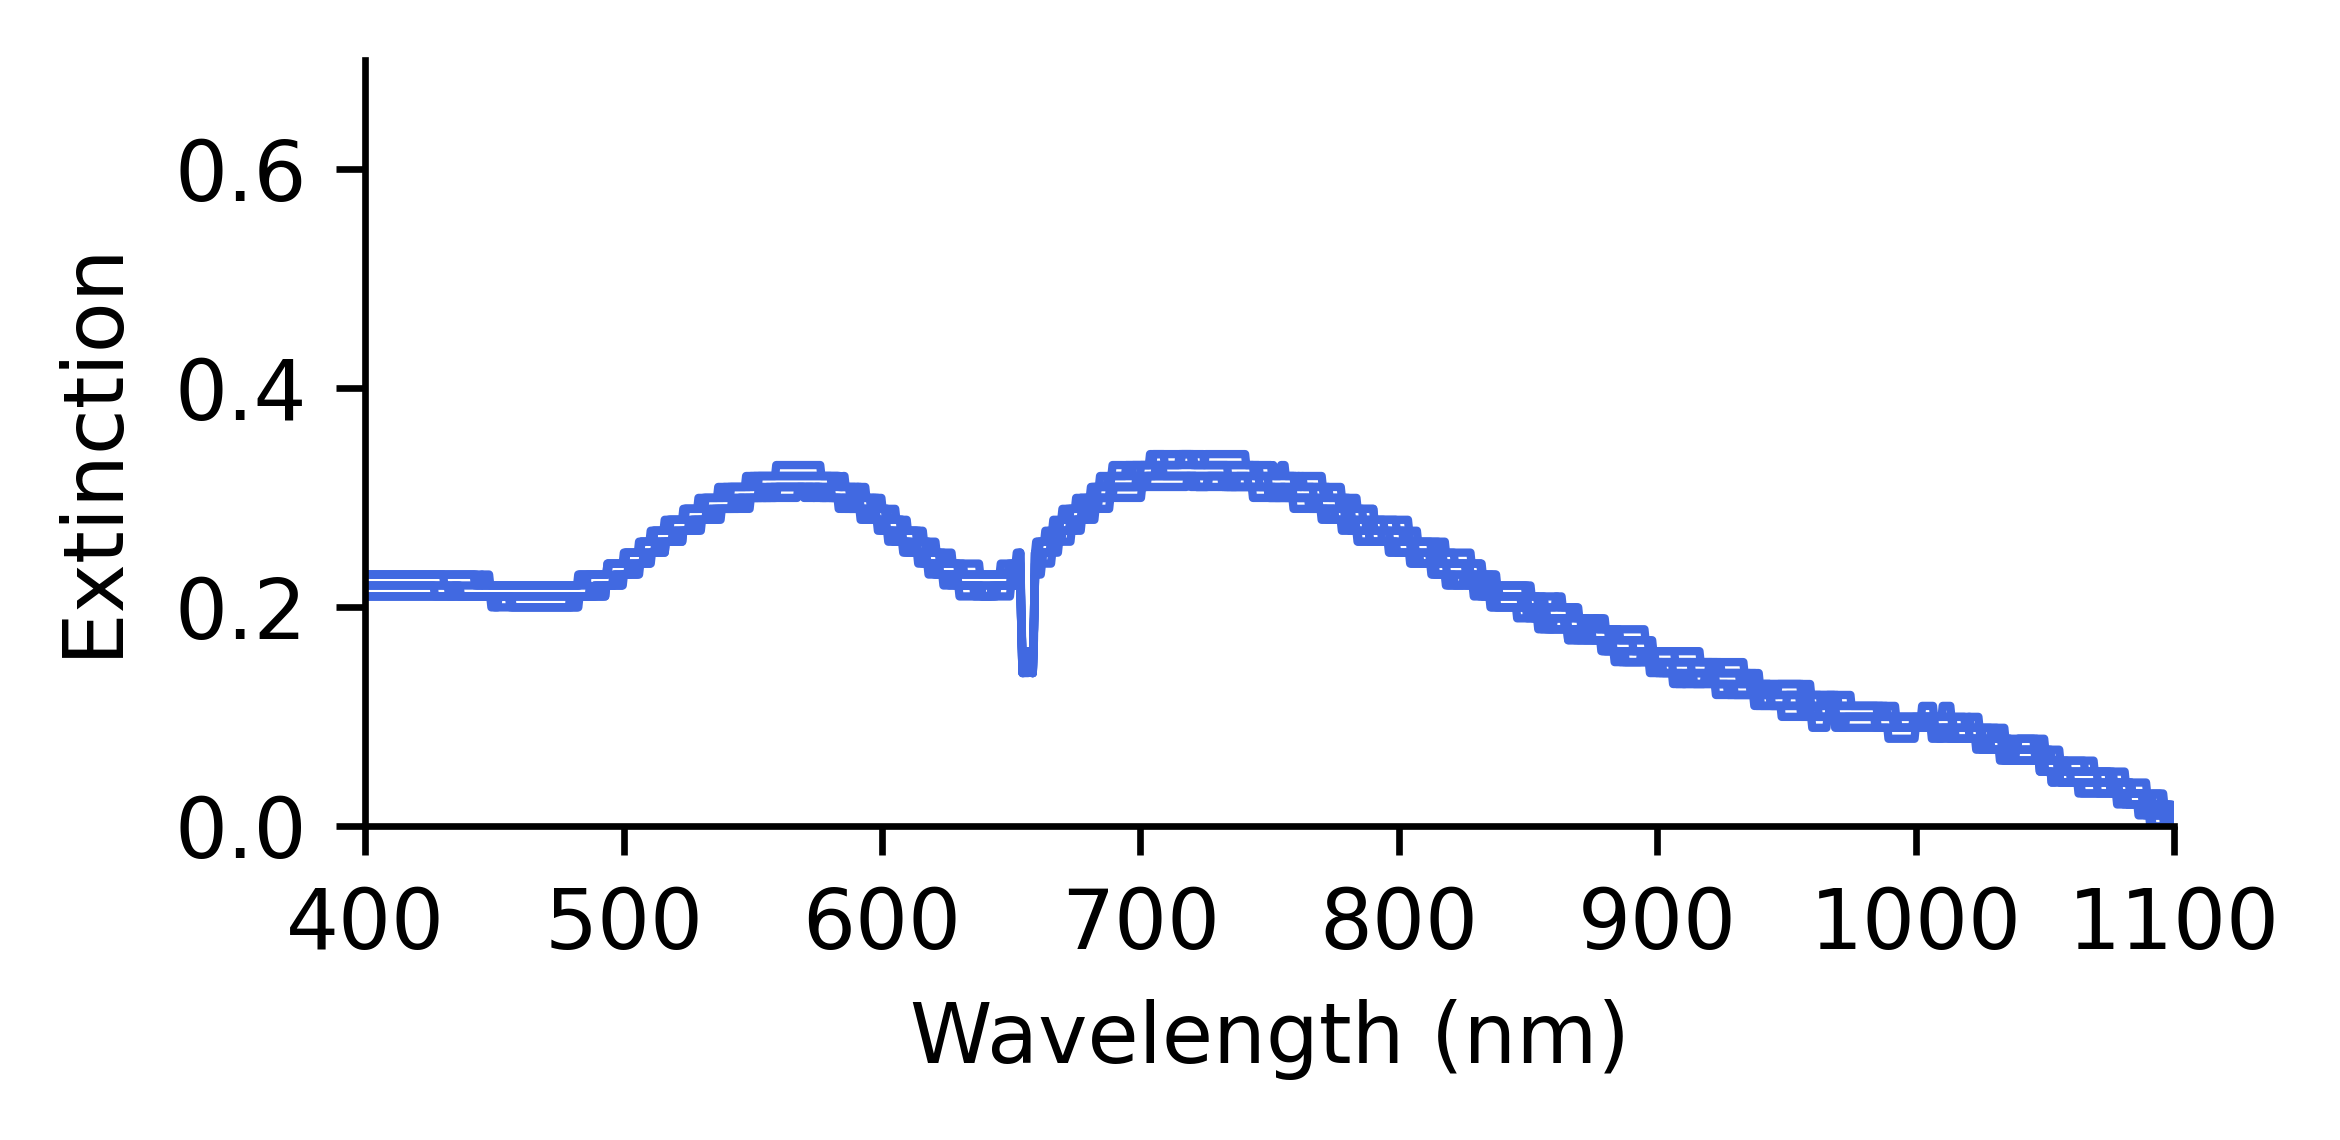

In [41]:
max_abs_agg = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_agg:
    # Read the CSV file into a Pandas DataFrame
    df_agg = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_agg.iloc[1350, 1].max(),2)
    max_abs_agg.append(absorbance_cool)

    # Plot the data
    ax.plot(df_agg[0],df_agg[1], color = 'royalblue', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

times_cool_agg = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
print('abs. at lambda_max.', max_abs_agg)

abs. at lambda_max. [0.04, 0.06, 0.05, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.04, 0.06]


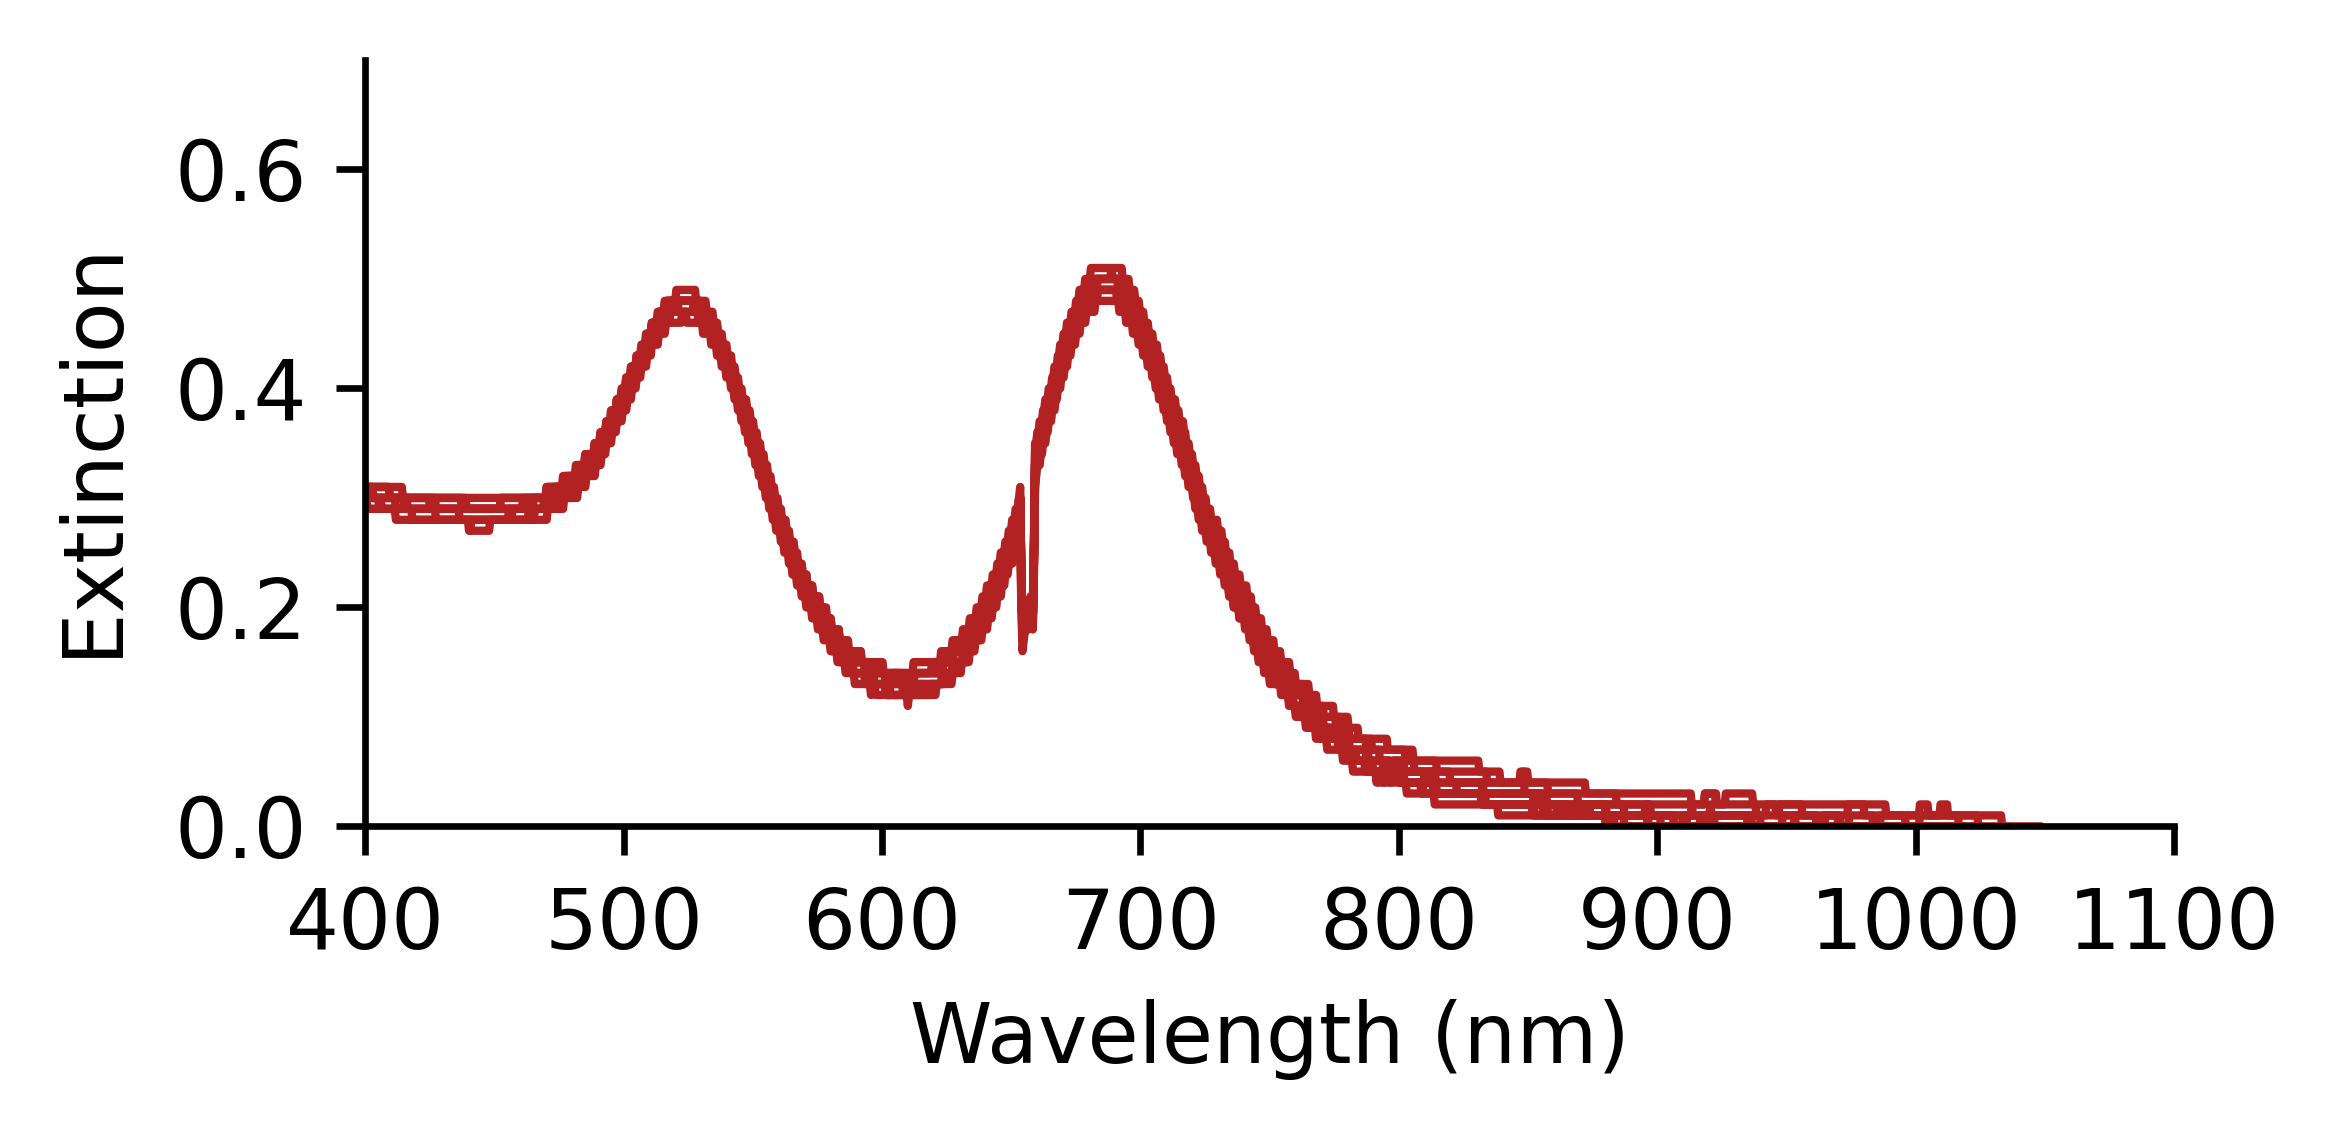

In [42]:
max_abs_disp = []

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for txt_file in txt_file_disp:
    # Read the CSV file into a Pandas DataFrame
    df_disp = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    absorbance_cool = round(df_disp.iloc[1350, 1].max(),2)
    max_abs_disp.append(absorbance_cool)

    # Plot the data
    ax.plot(df_disp[0],df_disp[1], color = 'firebrick', linewidth = 1)                           # plot data

ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  


times_cool_disp = [1,2,3,4,5,6,7,8,9,10,11]
print('abs. at lambda_max.', max_abs_disp)

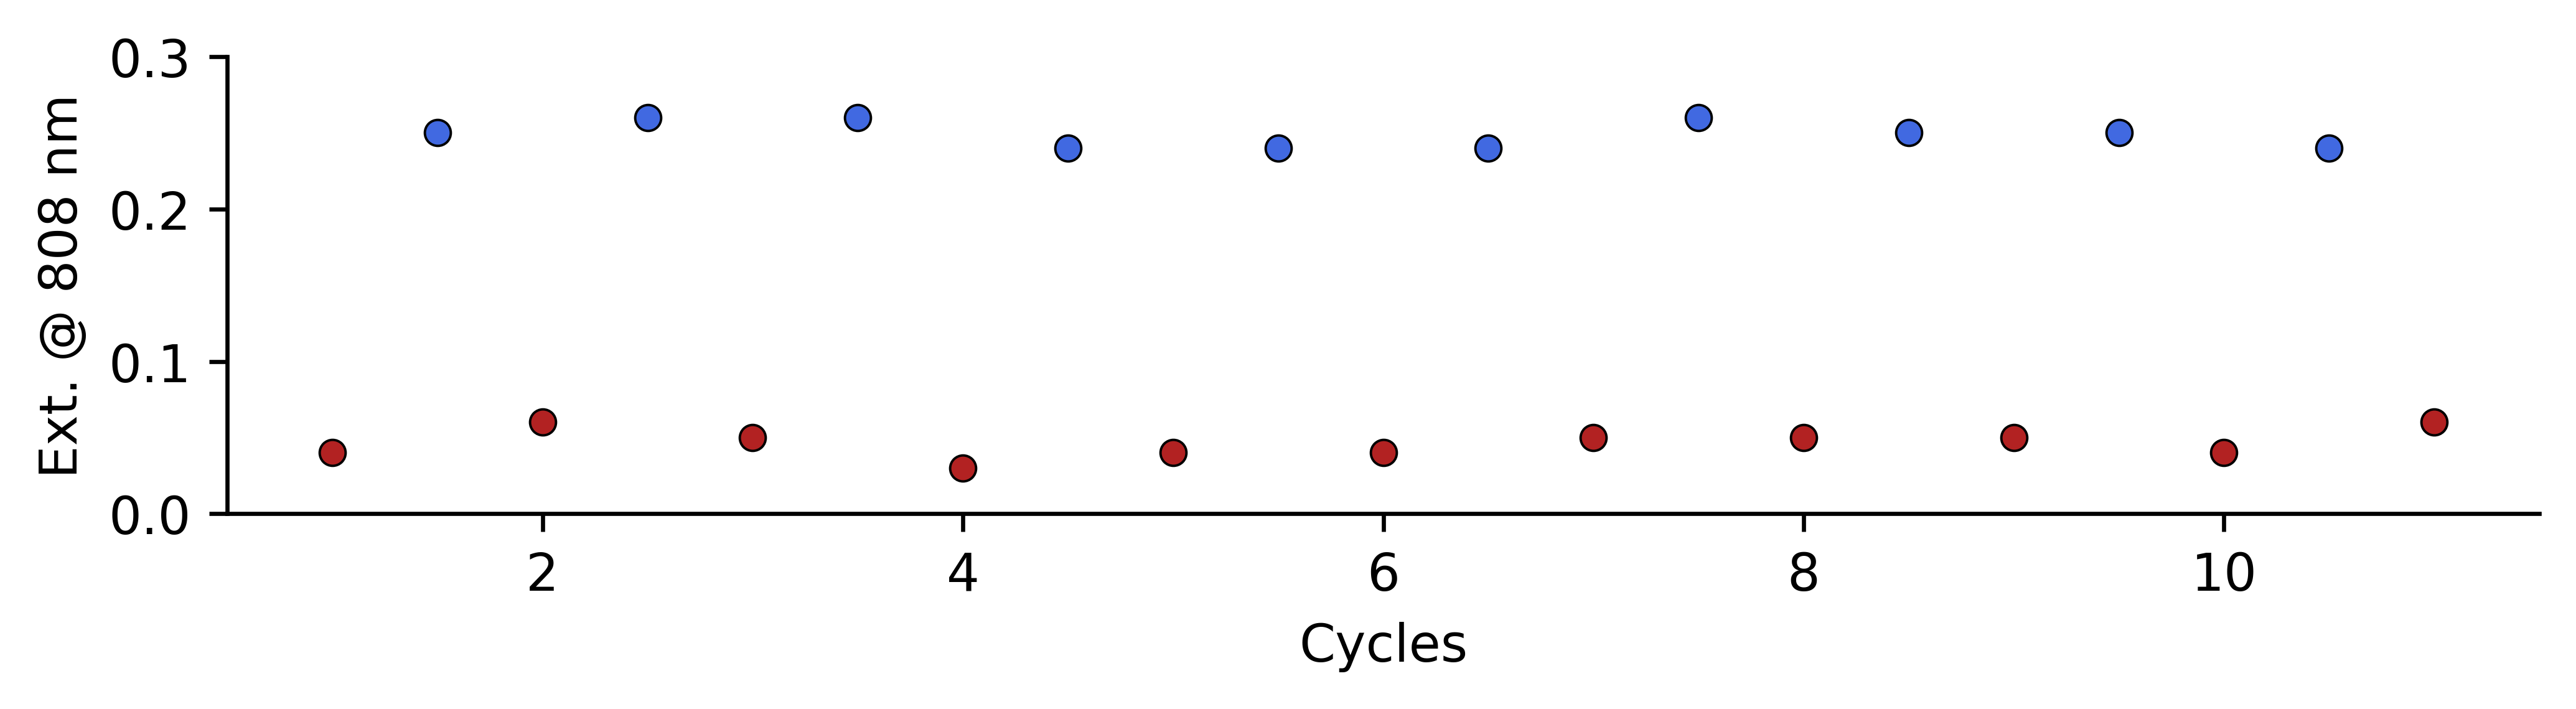

In [47]:
fig = plt.figure(figsize=(7,2), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.scatter(times_cool_agg, max_abs_agg, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_agg, max_abs_agg, color='royalblue', marker='.', s=50) 

ax_reversible.scatter(times_cool_disp, max_abs_disp, color='black', marker='.', s=80)  
ax_reversible.scatter(times_cool_disp, max_abs_disp, color='firebrick', marker='.', s=50)                           

ax_reversible.set_xlim([0.5,11.5])                    # set wavelength limit
ax_reversible.set_ylim([0,0.3])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycles')          # set axis label
ax_reversible.set_ylabel(r'Ext. @ 808 nm')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)
plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'2024-02-22-100n-20nr-25nacl-100h2o-7bp2-reveribility_808nm.png', transparent=True)

abs. at lambda_max. [0.49, 0.48, 0.49, 0.5, 0.49, 0.48, 0.49, 0.49, 0.5, 0.51]


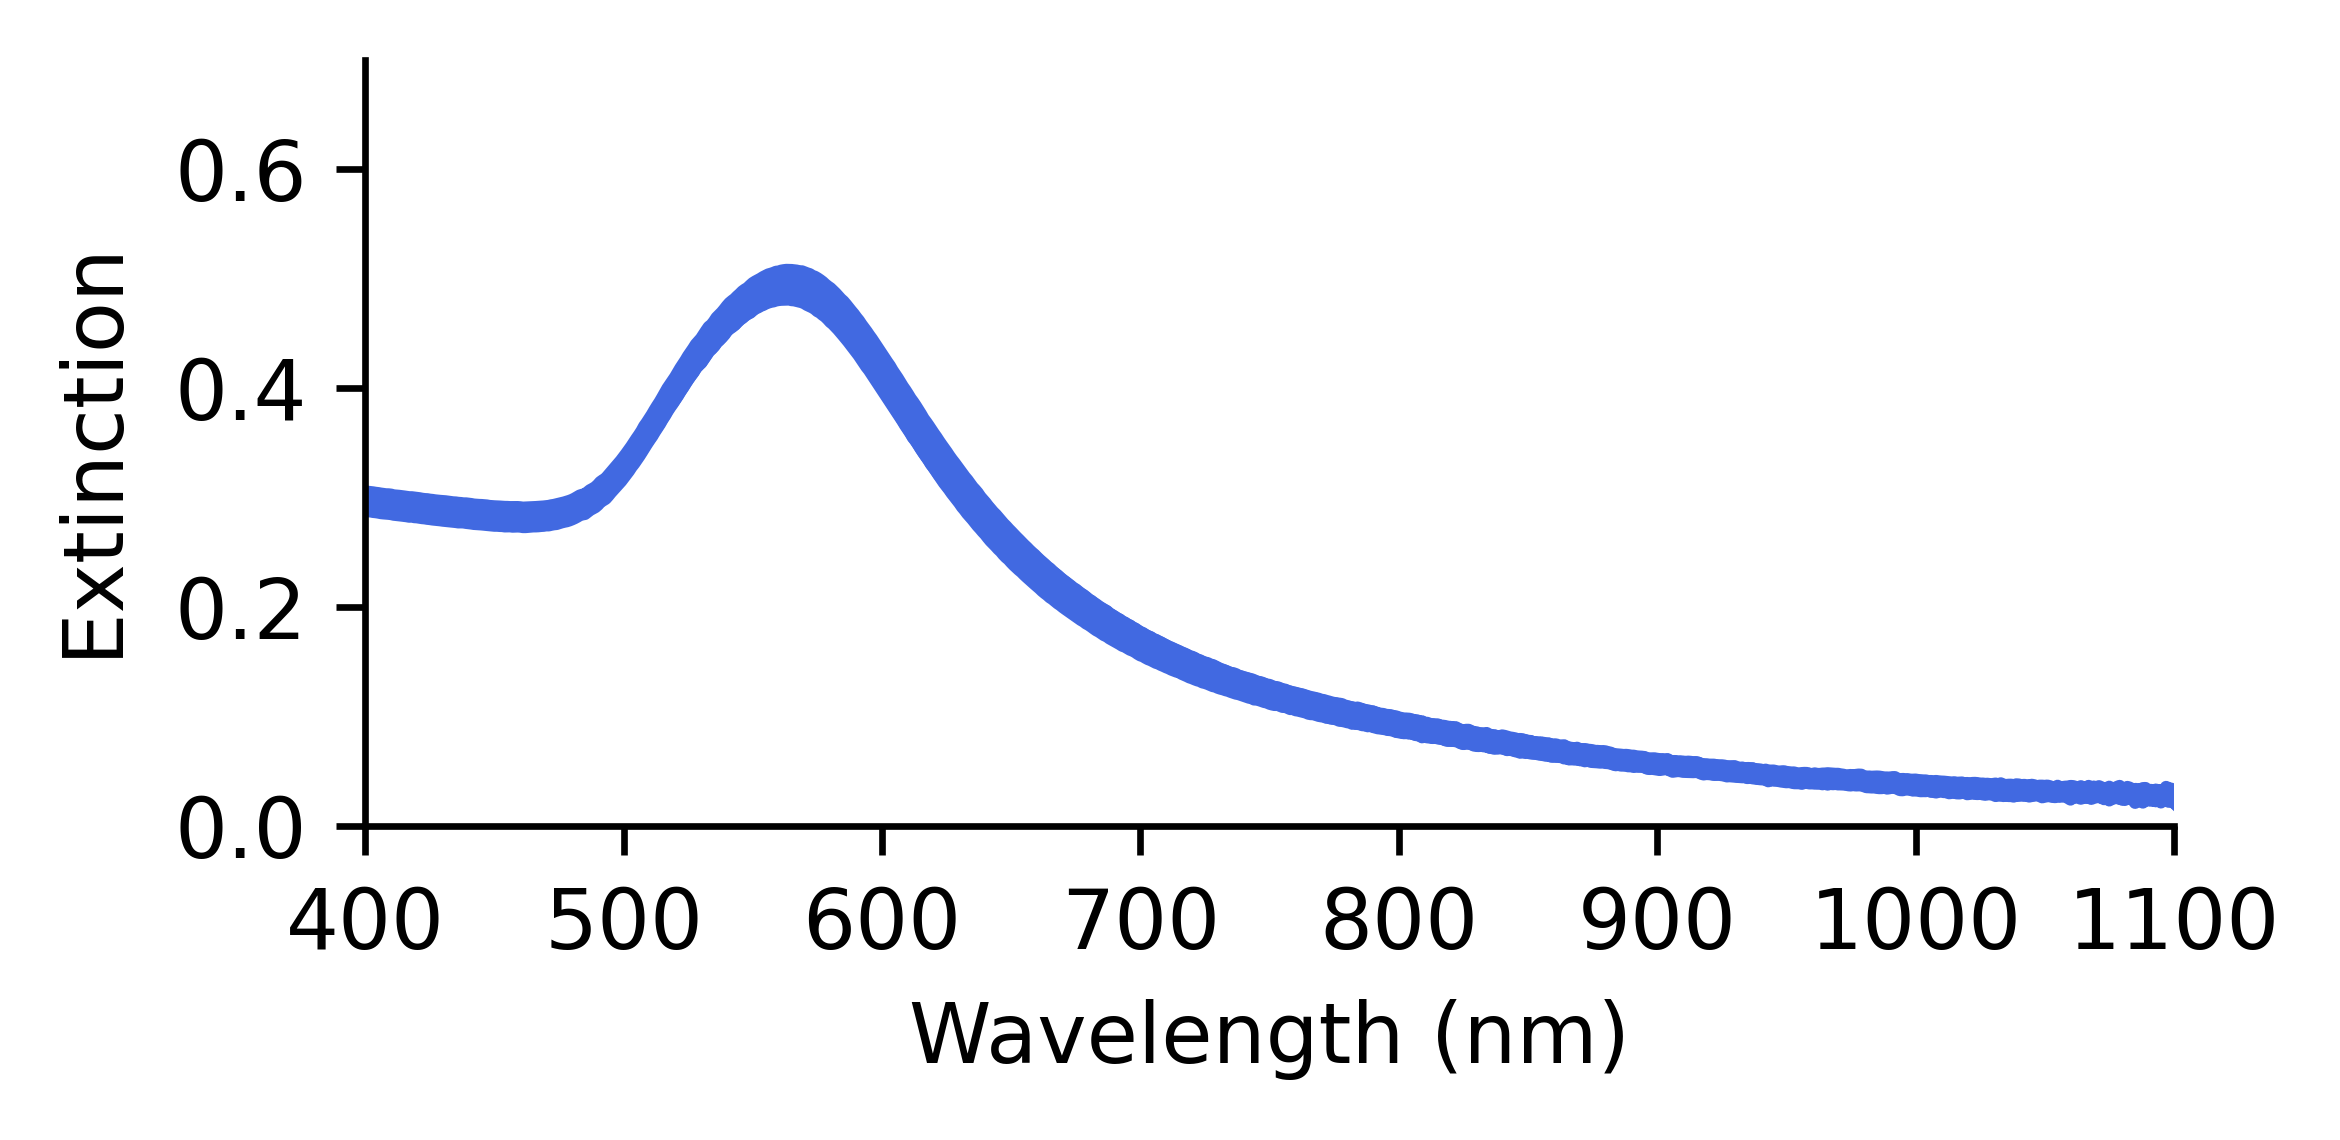

In [20]:
#================ plot data showing cooling ===========================#

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for col in odd_cool:
    ax.plot(df_cool.iloc[:, 0], odd_cool[col], color='royalblue')                           # plot data    
ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
#fig.savefig(RESULT_DIR_PATH+'auss-10ulbp-500mmnacl.pdf')

# Obtian the abs. max and the corresponding wavelength

max_abs_cool = []
max_wavelength_cool = []
times_cool = [1,2,3,4,5,6,7,8,9,10]

for col in odd_cool:
    absorbance_cool = round(odd_cool[col].max(),2)
    max_abs_cool.append(absorbance_cool)
    
print('abs. at lambda_max.', max_abs_cool)


abs. at lambda_max. [0.58, 0.59, 0.6, 0.61, 0.61, 0.61, 0.59, 0.61, 0.62, 0.62, 0.63]


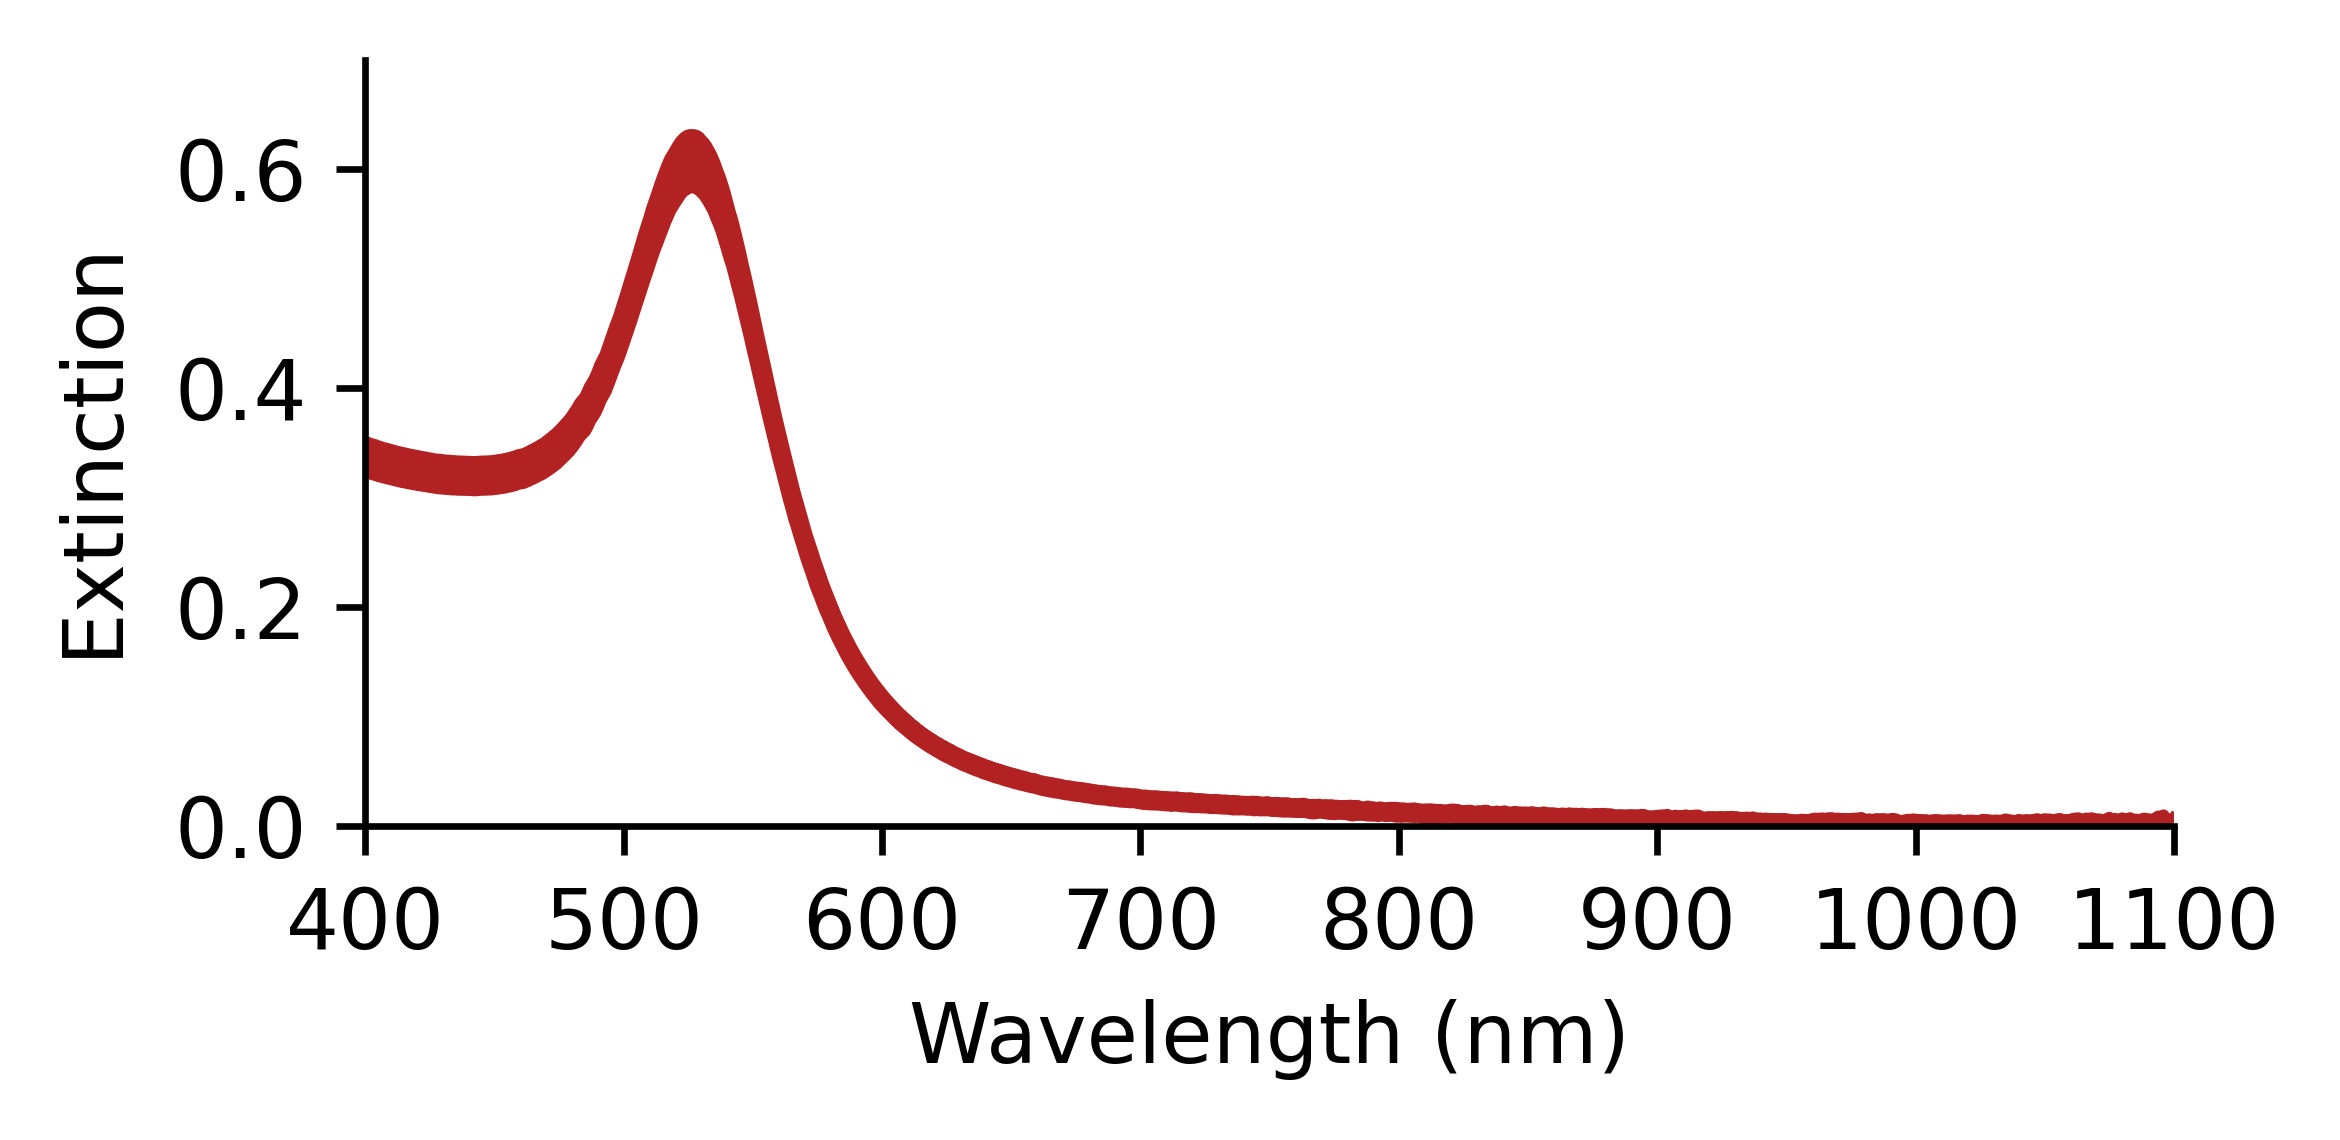

In [21]:
#================ plot data showing heating ===========================#

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for col in odd_heat:
    ax.plot(df_heat.iloc[:, 0], odd_heat[col], color='firebrick')                           # plot data    
ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.7])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
#fig.savefig(RESULT_DIR_PATH+'auss-10ulbp-500mmnacl.pdf')

# Obtian the abs. max and the corresponding wavelength

max_abs_heat = []
max_wavelength_heat = []
times_heat = [1,2,3,4,5,6,7,8,9,10]

for col in odd_heat:
    absorbance_heat = round(odd_heat[col].max(),2)
    max_abs_heat.append(absorbance_heat)
    
print('abs. at lambda_max.',max_abs_heat)


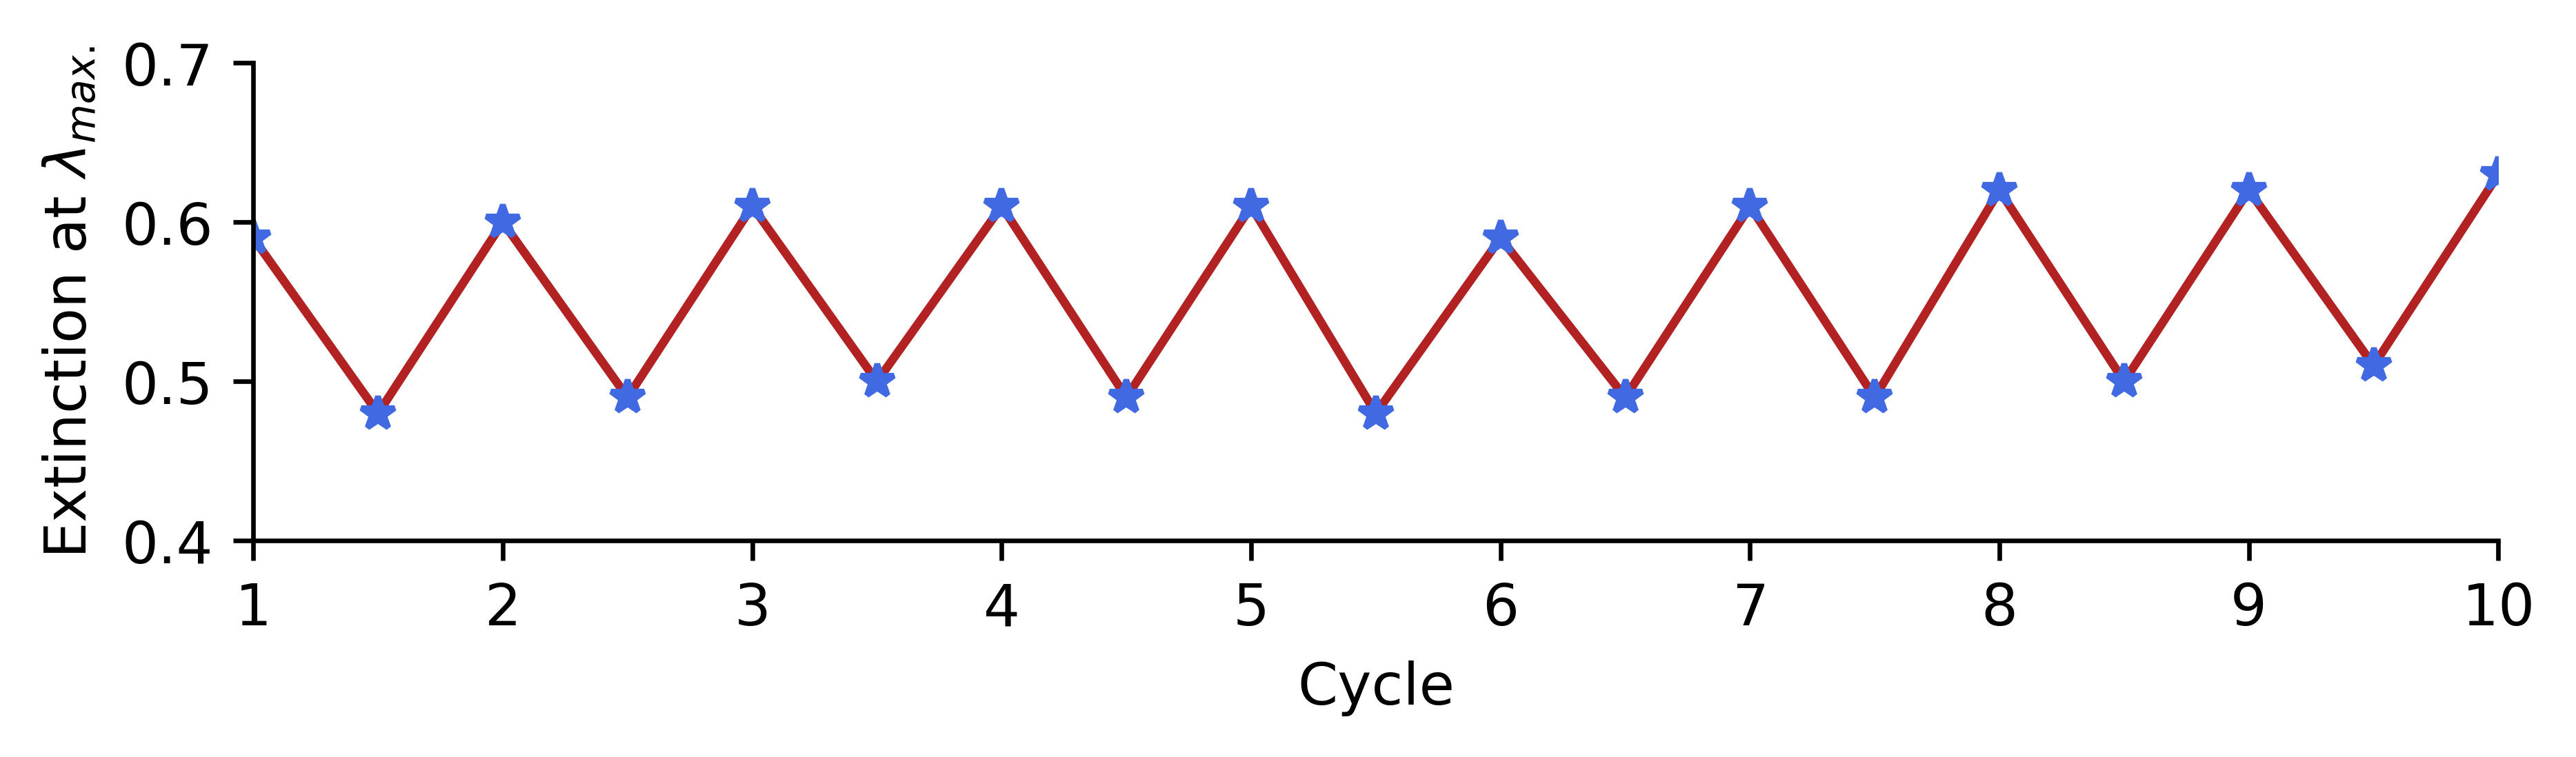

In [45]:
df_cycles = pd.read_csv(DATA_UV_DIR_PATH+'10-cycles.csv', header=None)

fig = plt.figure(figsize=(7,1.5), dpi=600) # generate a figure
ax_reversible = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_reversible.plot(df_cycles[0], df_cycles[1], color='firebrick', marker='*', mfc='royalblue', mec='royalblue')                           # plot data
ax_reversible.set_xlim([1,10])                    # set wavelength limit
ax_reversible.set_ylim([0.4,0.7])                       # set absorbance limit
ax_reversible.set_xlabel(r'Cycle')          # set axis label
ax_reversible.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax_reversible.spines['top'].set_visible(False)
ax_reversible.spines['right'].set_visible(False)


fig.savefig(RESULT_DIR_PATH+'23-03-2023-reversibility.jpeg', transparent=True)

## Plotting assembly kinetics in a single graph

Experimental conditions -

-22uL of AuNPs with DNA duplex 2

-25uL of 2M NaCl

-10uL of blocking proble (BP) 2

a = 0.21502167785464493
Rate constant (b) = 0.11296356451752375
c = 0.40960253509753897


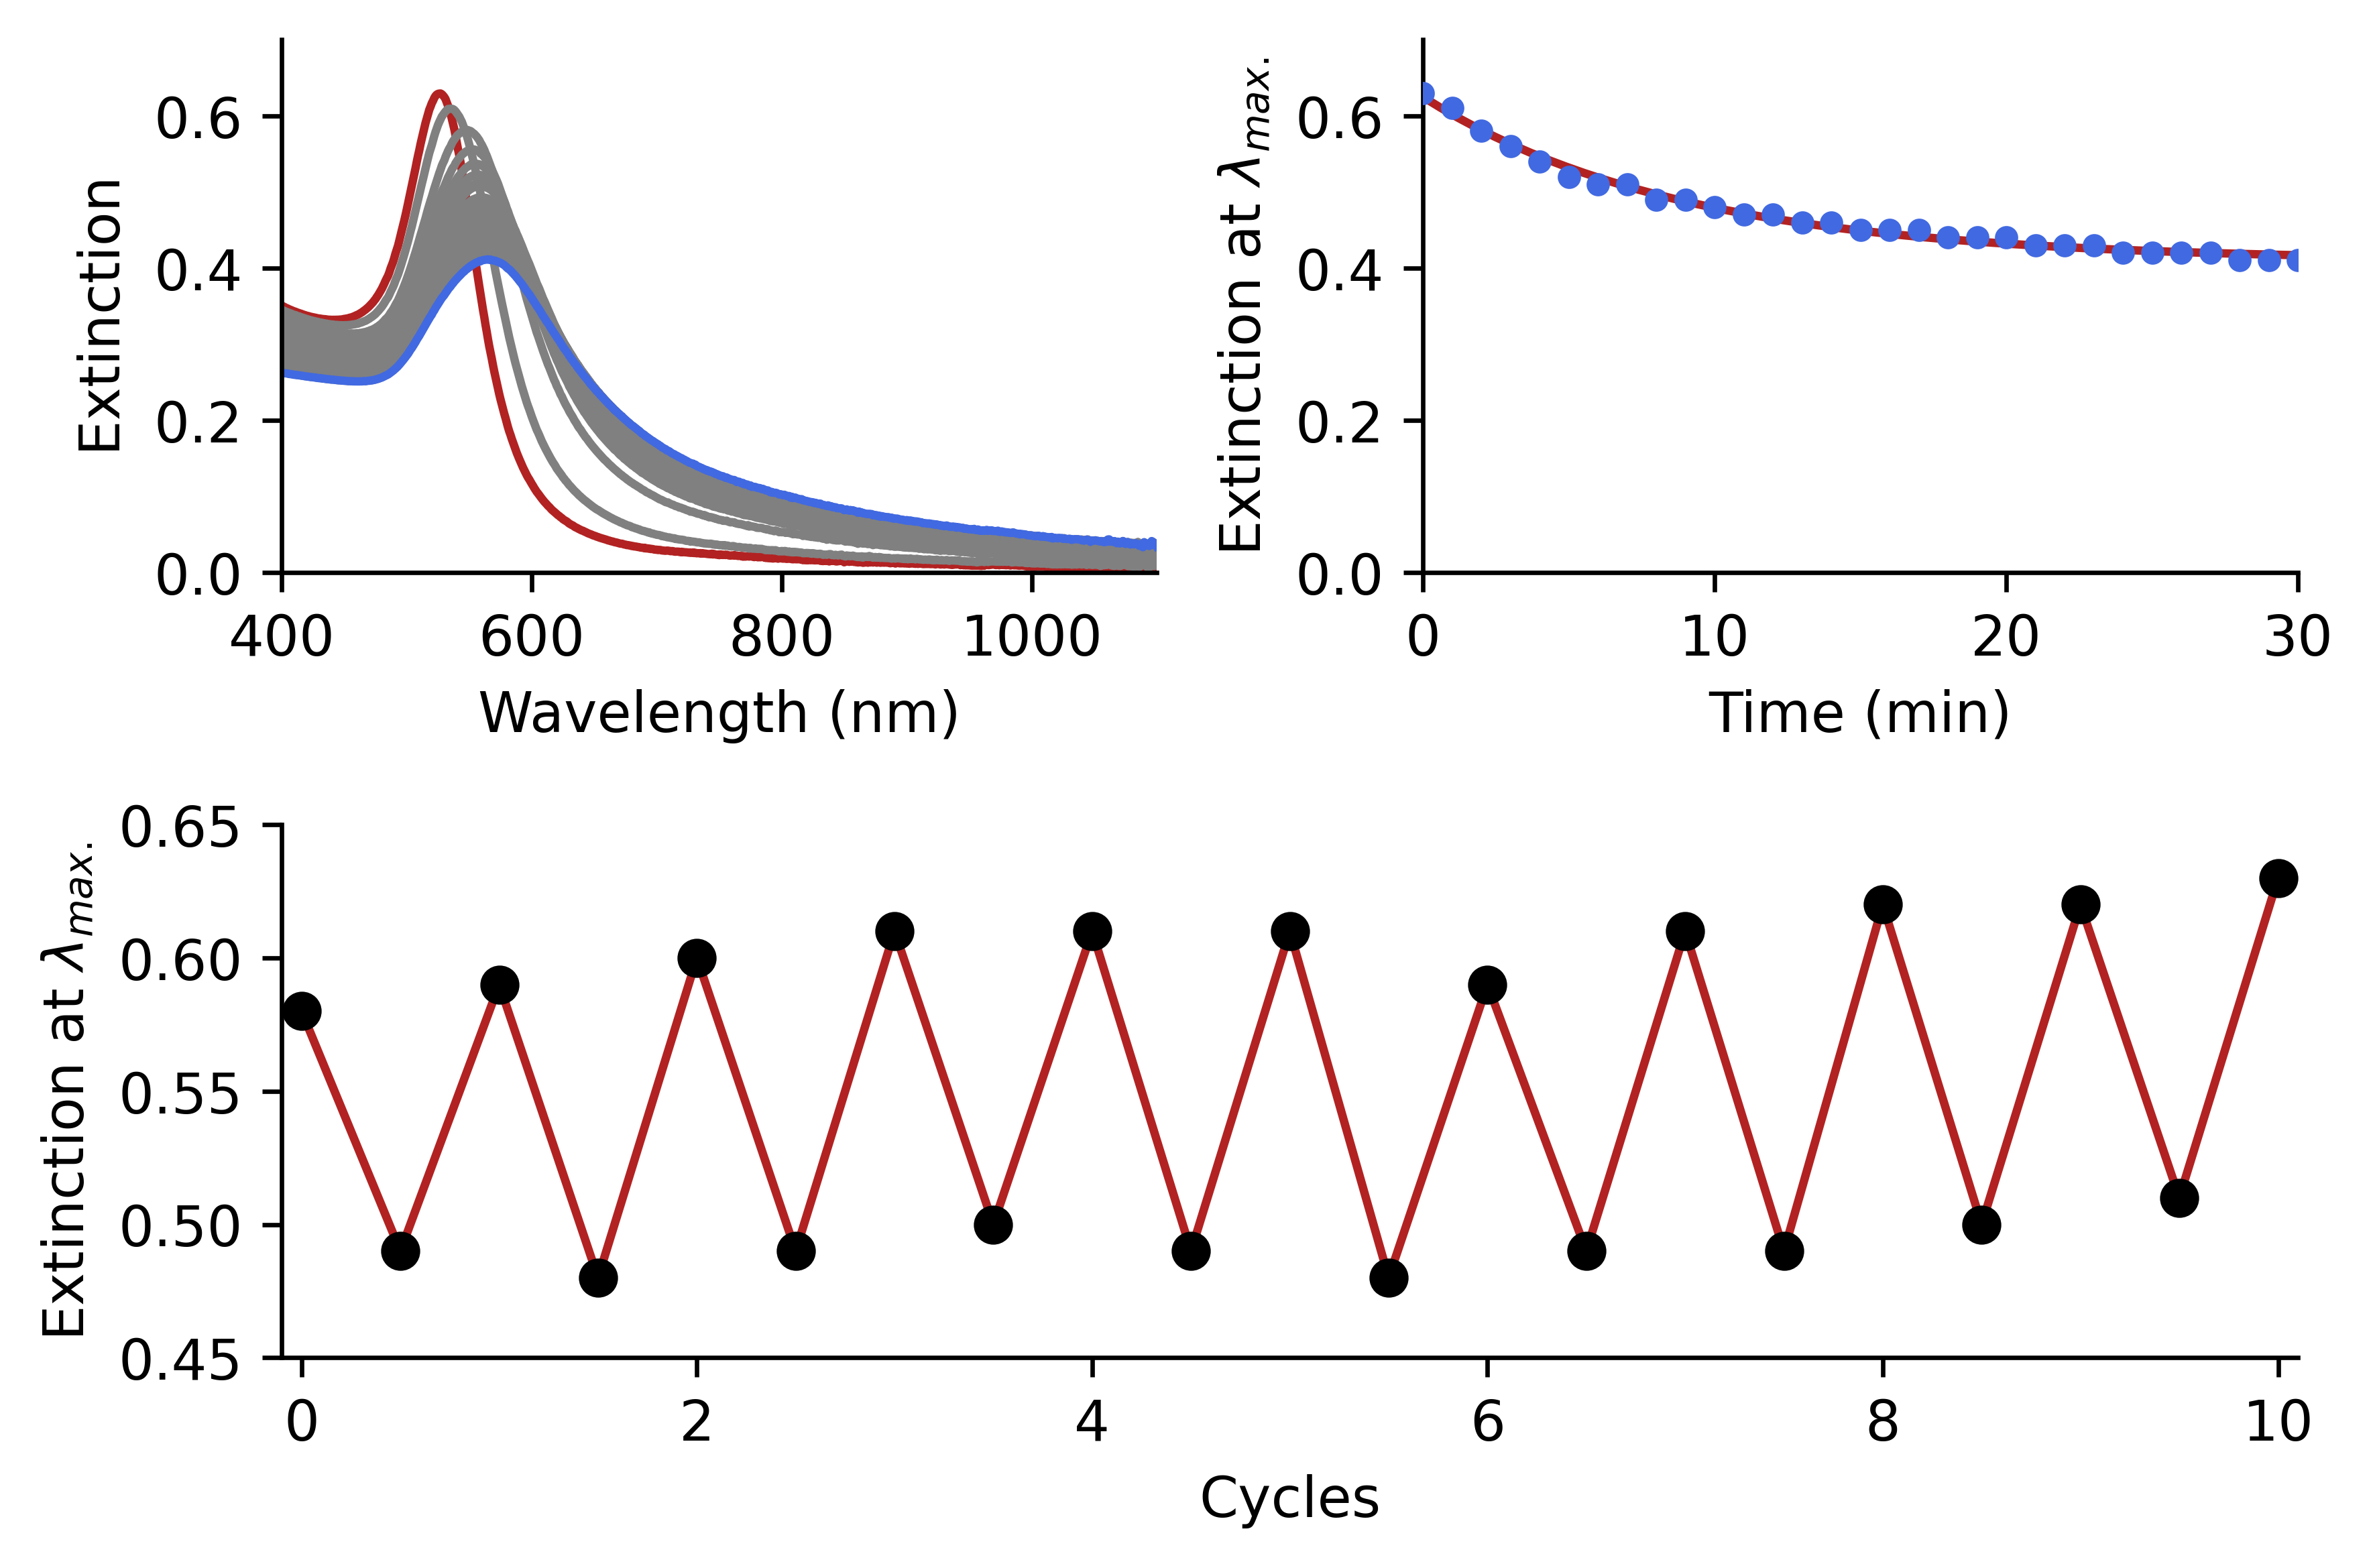

In [16]:
#================ plot data ===========================#

fig = plt.figure(figsize=(6,4), dpi=600)
gs = fig.add_gridspec(2, 2) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[0, 1]) # upper rigth subplot
ax3 = fig.add_subplot(gs[1, :]) # upper rigth subplot

axes = [ax1, ax2, ax3] # list of all axes in plot

for col in odd_cols:
    if col == 'Abs':
        color = 'firebrick'
    elif col == 'Abs.30':
        color = 'royalblue'
    else:
        color = 'grey'
    
    ax1.plot(df.iloc[:, 0], odd_cols[col], color = color)                           # plot data    
    
ax1.set_xlim([400,1100])                    # set wavelength limit
ax1.set_ylim([0,0.7])                       # set absorbance limit
ax1.set_xlabel(r'Wavelength (nm)')          # set axis label
ax1.set_ylabel(r'Extinction ')              # set axis label
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)        # remove spines


#=======second plot======================#

ax2.scatter(times, max_abs, color='royalblue', s=10, zorder=5)                           # plot data
ax2.set_xlim([0,30])                    # set wavelength limit

ax2.set_ylim([0,0.7])                       # set absorbance limit
ax2.set_xlabel(r'Time (min)')          # set axis label
ax2.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax2.spines['right'].set_visible(False)      # remove spines
ax2.spines['top'].set_visible(False)        # remove spines

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times, max_abs)

# Print the fitted parameters
print('a =', popt[0])
print('Rate constant (b) =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,30)

ax2.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')

#================third plot=================#

ax3.plot(df_cycles[0], df_cycles[1], color='firebrick', marker='o', mfc='black', mec='black')                           # plot data
ax3.set_xlim([-0.1,10.1])                    # set wavelength limit
ax3.set_ylim([0.45,0.65])                       # set absorbance limit
ax3.set_xlabel(r'Cycles')          # set axis label
ax3.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax3.spines['right'].set_visible(False)      # remove spines
ax3.spines['top'].set_visible(False)        # remove spines

plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'23-03-2023-assembly_kinetics.jpeg')

## Plotting the 10 heating and cooling cycles in a single graph

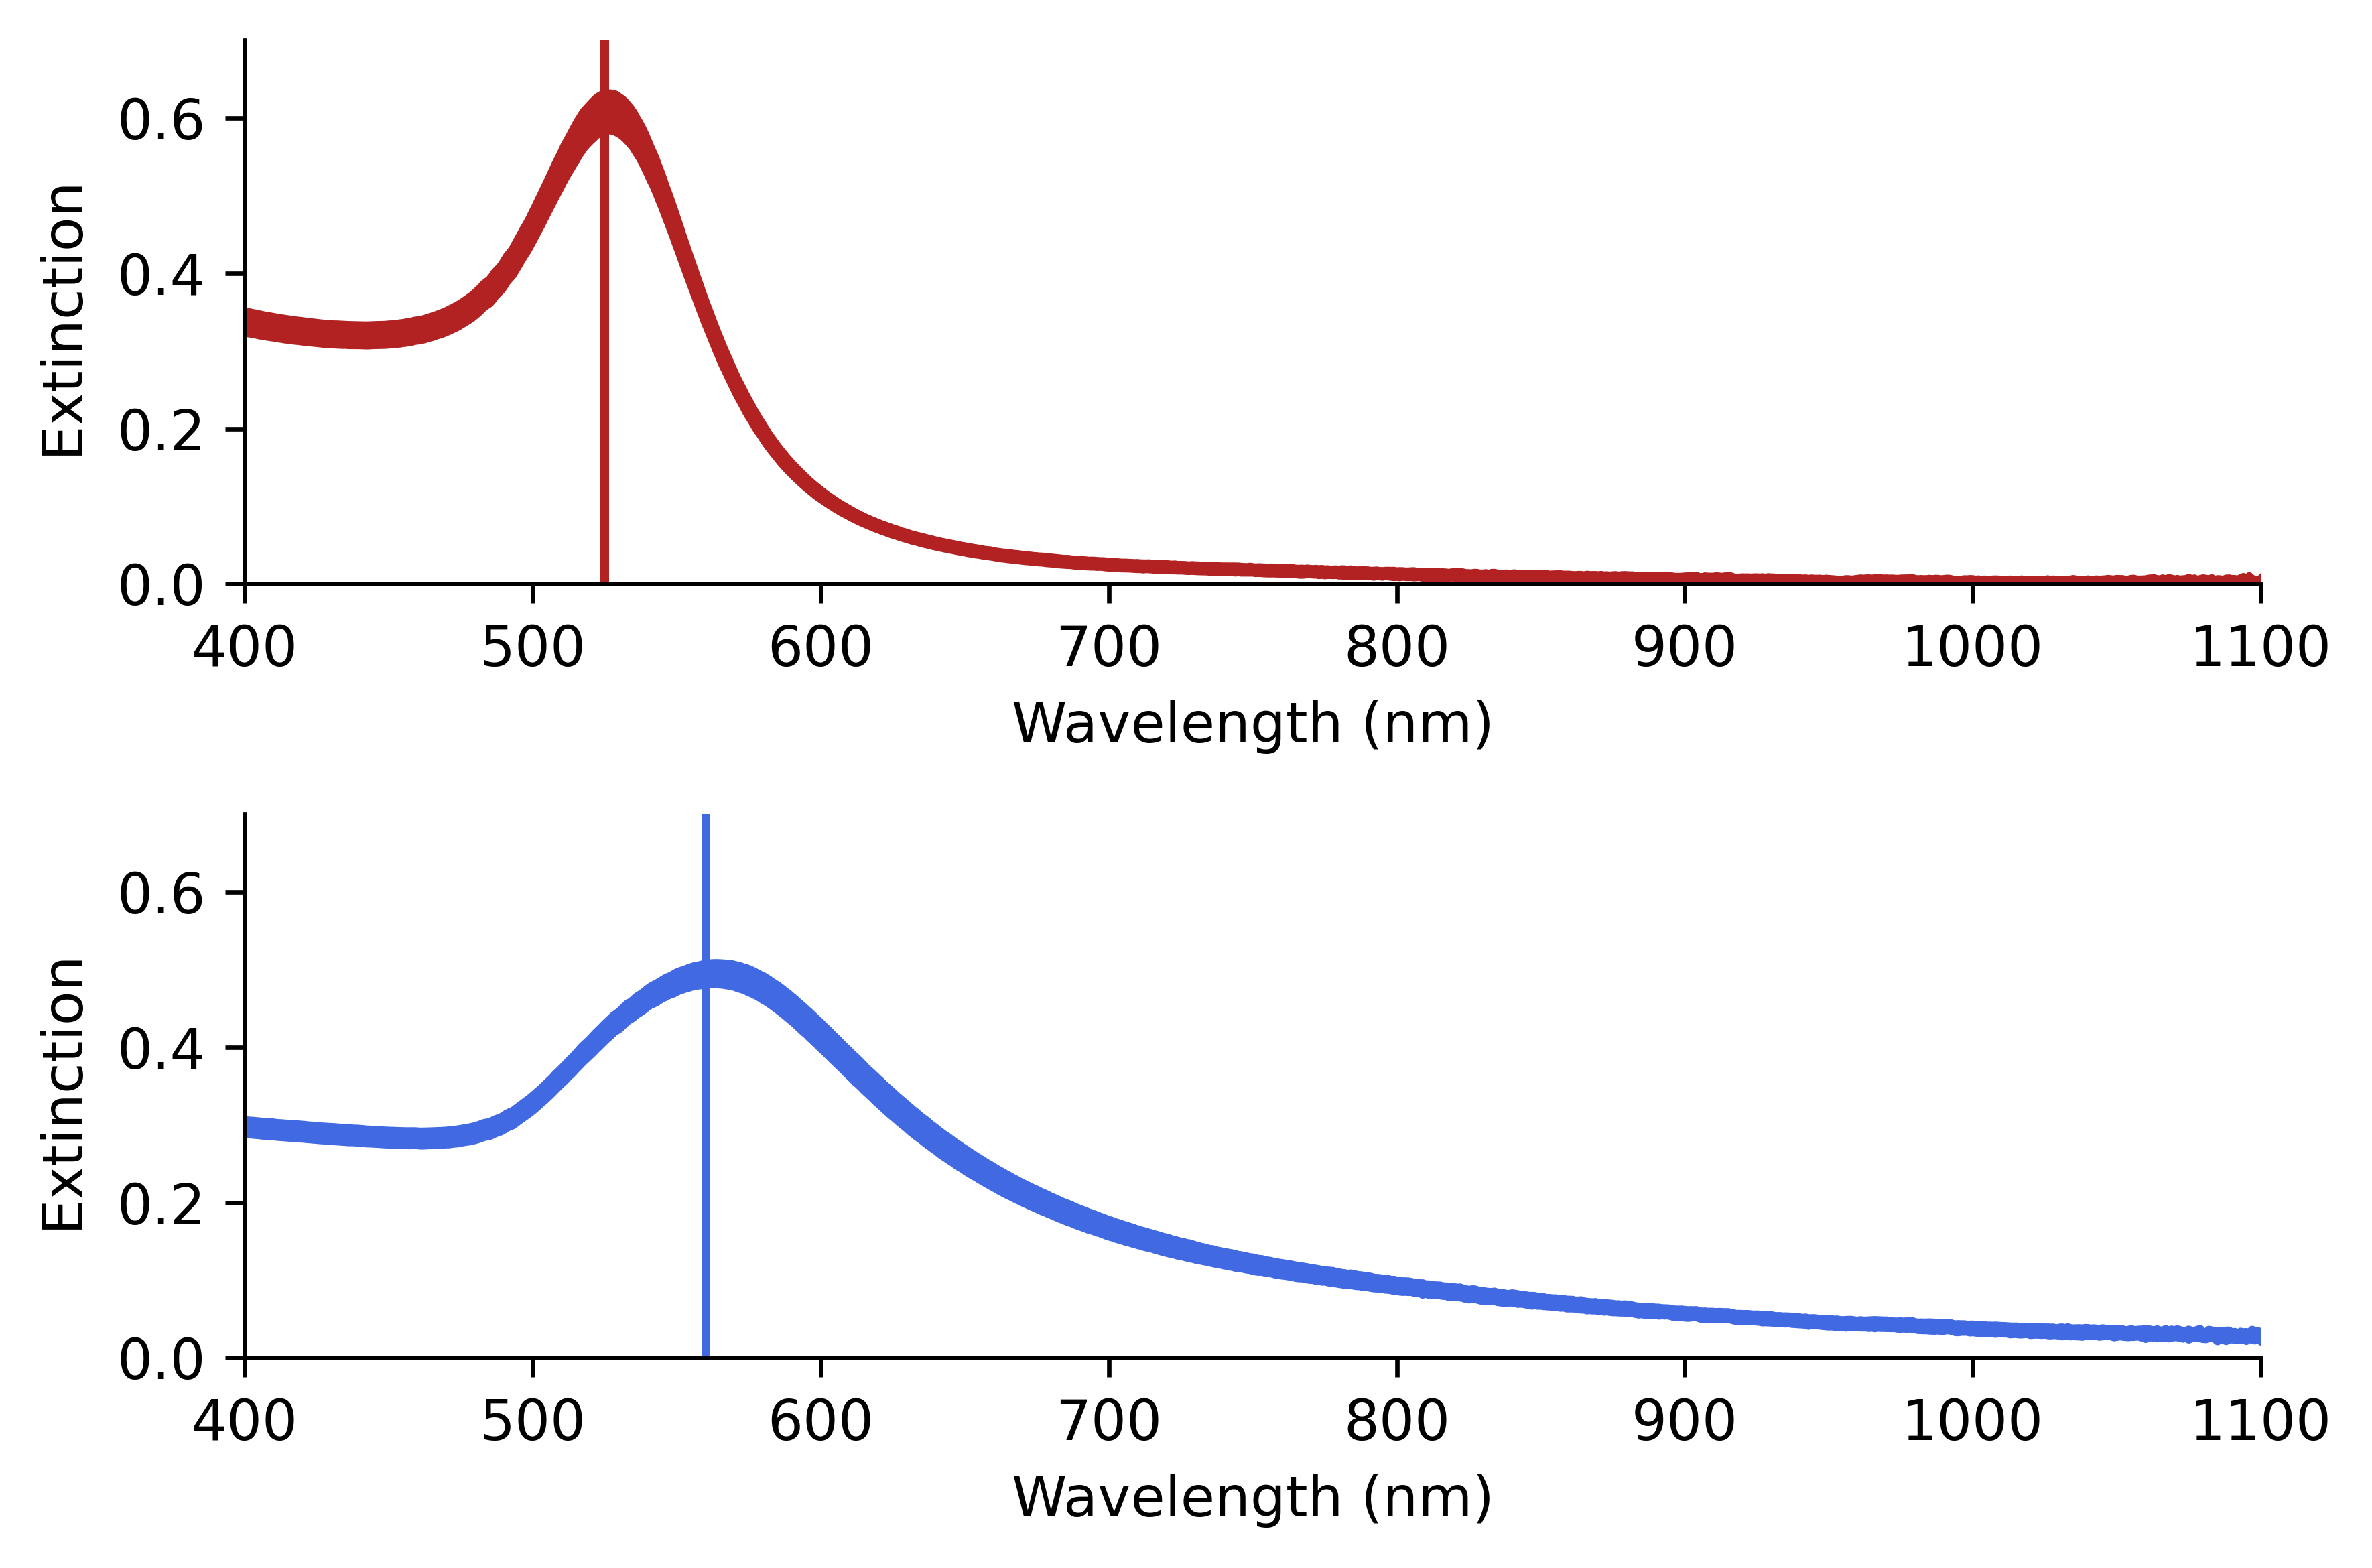

In [17]:

#================ plot data ===========================#

fig = plt.figure(figsize=(6,4), dpi=600)
gs = fig.add_gridspec(2, 1) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[1, 0]) # upper rigth subplot

axes = [ax1, ax2] # list of all axes in plot

for col in odd_heat:
    ax1.plot(df_heat.iloc[:, 0], odd_heat[col], color='firebrick')
    ax1.set_xlim([400,1100])
    ax1.set_ylim([0,0.7])
    ax1.set_xlabel(r'Wavelength (nm)')
    ax1.set_ylabel(r'Extinction ')
    ax1.axvline(525, color='firebrick')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
for col in odd_cool:
    ax2.plot(df_cool.iloc[:, 0], odd_cool[col], color='royalblue')
    ax2.set_xlim([400,1100])
    ax2.set_ylim([0,0.7])
    ax2.set_xlabel(r'Wavelength (nm)')
    ax2.set_ylabel(r'Extinction ')
    ax2.axvline(560, color='royalblue')    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'23-03-2023-10-heat-cool-cycles.jpeg')